### Mostly just a lot of weird data plots, most not used in final thesis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from iminuit import cost,Minuit
from jacobi import propagate

sys.path.append('C:/Users/conor/Documents/Github/Project/plugins')

import importlib

#TODO: Describe differences between these
import model as mo

importlib.reload(mo)
pS2s_original = np.load("C:/Users/conor/Downloads/Project (offline)/downloaded_data/031680_pS2s.npy", allow_pickle = True)
DEs_original = np.load("C:/Users/conor/Downloads/Project (offline)/downloaded_data/031680_DEs.npy", allow_pickle = True)

pS2s_new = np.load("C:/Users/conor/Downloads/Project (offline)/downloaded_data/031680_pS2s_new.npy", allow_pickle = True)
DEs_new = np.load("C:/Users/conor/Downloads/Project (offline)/downloaded_data/031680_DEs_new.npy", allow_pickle = True)
S1s_new = np.load("C:/Users/conor/Downloads/Project (offline)/downloaded_data/031680_S1s_new.npy", allow_pickle = True)

peaks = np.load("C:/Users/conor/Downloads/Project (offline)/downloaded_data/031680_peaks.npy",allow_pickle = True)
DAQ_vetos = np.load("C:/Users/conor/Downloads/Project (offline)/downloaded_data/031680_vetos.npy", allow_pickle = True)
runs = np.load("C:/Users/conor/Downloads/Project (offline)/downloaded_data/runs.npy", allow_pickle = True)

runs_df = pd.DataFrame(runs, columns = ["name", "number", "mode", "end", "start", "tags", "source", 
                                     "livetime", "peak_basics_available", "peaks_available", "event_basics_available"])

run_id = runs_df.iloc[-2]


KeyboardInterrupt: 

In [2]:
runs_df = runs_df.tolist()

run_id = runs_df.iloc[-2]

start = run_id['start'].astype('datetime64[s]').astype(np.int64)

print(f"Run start time (unix timestamp): {start}")

NameError: name 'runs_df' is not defined

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from multihist import Hist1d, Histdd
import matplotlib.ticker as mticker


run_duration = (int(run_id['end'].value) - int(run_id['start'].value))/1e9

def plot_area_width_histogram(
    peaks,
    livetime_sec,
    pe_bins=np.logspace(0, 7, 120),
    width_bins=np.geomspace(2, 4e5, 120),
    extra_labels=tuple(),
    rate_range=(1e-4, 1),
    figsize=(7, 5),
    ax=None,
):
    mh = Histdd(
        peaks,
        dimensions=(
            ("area", pe_bins),
            ("range_50p_area", width_bins),
        ),
    )

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.figure

    (mh / livetime_sec).plot(
        ax,  # <-- pass axis as first positional arg, not keyword
        norm=LogNorm(vmin=rate_range[0], vmax=rate_range[1]*1.5),
        colorbar_kwargs=dict(extend="both"),
        cblabel="Peaks / (bin * s)",
    )


    # styling
    ax.set_facecolor("k")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Area [PE]")
    ax.set_ylabel("Range 50% area [ns]")


    fig.tight_layout()
    return fig, ax

# import matplotlib.pyplot as plt
# import numpy as np
# from multihist import Histdd
# from matplotlib.colors import LogNorm
# import matplotlib.patheffects as patheffects


# def plot_area_width_histogram(
#     peaks,
#     livetime_sec,
#     pe_bins=None,
#     width_bins=None,
#     extra_labels=(),
#     rate_range=(1e-4, 1),
#     figsize=(7, 5),
#     ax=None,
# ):
#     """Minimal 2D (area, width) rate histogram with labels.

#     - peaks: structured array / table with fields 'area' and 'range_50p_area'
#     - livetime_sec: scalar livetime in seconds (used to convert counts -> rate)
#     - extra_labels: iterable of (x, y, text) or (x, y, text, color)
#     """
#     # sensible defaults if caller doesn't provide bins
#     if pe_bins is None:
#         pe_bins = np.logspace(0, 7, 120)
#     if width_bins is None:
#         width_bins = np.geomspace(2, 4e5, 120)

#     # 2D histogram object
#     mh = Histdd(
#         peaks,
#         dimensions=(
#             ("area", pe_bins),
#             ("range_50p_area", width_bins),
#         ),
#     )

#     # create axis if needed
#     if ax is None:
#         fig, ax = plt.subplots(figsize=figsize)
#     else:
#         fig = ax.figure

#     # Plot the rate (counts / livetime) as a 2D image. Pass ax as first arg.
#     (mh / livetime_sec).plot(
#         ax,
#         norm=LogNorm(vmin=rate_range[0], vmax=rate_range[1]),
#         colorbar_kwargs=dict(extend="both"),
#         cblabel="Peaks / (bin * s)",
#     )

#     # axes styling
#     ax.set_facecolor("k")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_xlabel("Area [PE]")
#     ax.set_ylabel("Range 50% area [ns]")

#     # default labels (same as in your original)
#     default_labels = [
#         (3, 150, "1PE\npileup", "w"),
#         (30, 200, "1e", "w"),
#         (100, 1000, "n-e", "w"),
#         # (2000, 2e4, "Train", "w"),
#         (1200, 50, "S1", "w"),
#         (2e5, 800, "pS2", "w"),
#     ]

#     # combine defaults and extras
#     labels = list(default_labels) + list(extra_labels)

#     # draw labels; support (x,y,text) or (x,y,text,color)
#     for lab in labels:
#         if len(lab) == 3:
#             x, y, text = lab
#             color = "white"
#         elif len(lab) == 4:
#             x, y, text, color = lab
#         else:
#             raise ValueError("Each label must be (x, y, text) or (x, y, text, color)")

#         ax.text(
#             x,
#             y,
#             text,
#             color=color,
#             fontsize=12,
#             ha="center",
#             va="center",
#             path_effects=[patheffects.withStroke(linewidth=1.5, foreground="black")],
#         )

#     fig.tight_layout()
#     return fig, ax

subtype_names = {
    0: 'Junk',
    10: 'isolated S1',
    11: 'regular S1',
    12: 'unmatched S1',
    13: 'small loneS1',
    21: 'DE',
    22: 'primary S2 (pS2)',
    23: 'isolated S2',
    24: 'isolated primary S2',
    25: 'unmatched primary S2',
    261: 'other large S2 between S1 and S2',
    262: 'other S2 after pS2',
    271: 'PI between S1 and S2',
    272: 'PI after pS2',
    273: 'PI after small lone S1',
    28: 'fake S2',
    29: 'other large S2 after fake S2',
    20: 'PI after fake S2'
}

subtype_colours = {
    0: "gray",
    10: "orangered",
    11: "red",
    12: "crimson",
    13: "darkred",
    21: "green", 
    22: "blue", 
    23: "darkolivegreen", 
    24: "dodgerblue", 
    25: "darkblue",
    261: "darkorchid", 
    262: "purple",
    271: "violet", 
    272: "magenta", 
    273: "deeppink",
    28: "orange",
    29: "gold",
    20: "goldenrod",
}

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

def plot_peaks(run_id, peaks, t_reference=None, vetos=None, seconds_range=None, time_range=None,
               window_ms=5, figsize=(12,5), ax=None, log=True):
    """
    Plot peak waveforms from a structured NumPy array, coloring by subtype.

    Parameters:
    - run_id: dict or object with 'start' attribute, giving run start in ns
    - peaks: structured NumPy array with at least ['time', 'length', 'dt', 'data'], optionally 'subtype'
    - t_reference: reference time in ns since epoch
    - seconds_range: (start, stop) in seconds since run start
    - time_range: (start, stop) in ns since epoch
    - window_ms: window around t_reference to plot (ms)
    - ax: Matplotlib axis, or None to create a new figure
    - log: whether to use log scale on y-axis
    """
    run_start = int(run_id['start'].value)  # ns since epoch

    # Determine which peaks to plot
    if seconds_range is not None:
        t_min_ns = int(seconds_range[0] * 1e9) + run_start
        t_max_ns = int(seconds_range[1] * 1e9) + run_start
    elif time_range is not None:
        t_min_ns, t_max_ns = time_range
    elif t_reference is not None:
        window_ns = int(window_ms * 1e6)  # convert ms to ns
        t_min_ns = t_reference - window_ns
        t_max_ns = t_reference + window_ns
    else:
        raise ValueError("Must provide t_reference, seconds_range, or time_range")

    peak_selection = peaks[(peaks['time'] >= t_min_ns) & (peaks['time'] <= t_max_ns)]
    if len(peak_selection) == 0:
        print("No peaks in selected range.")
        return None, None

    # Convert times to ms relative to run start for plotting
    t_min_plot = (t_min_ns - run_start) / 1e6
    t_max_plot = (t_max_ns - run_start) / 1e6

    # Create figure if needed
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.figure

    has_subtype = 'subtype' in peaks.dtype.names

    # Plot each peak
    for p in peak_selection:
        subtype = p['subtype'] if has_subtype else 'unknown'
        colour = subtype_colours.get(subtype, "gray")
        plot_peak(p, ax=ax, t0=run_start, colour=colour)

    ax.set_xlabel("Time [ms]")
    ax.set_ylabel("Intensity [PE/ns]")

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1e-4, 1e4)

    ax.set_xlim(t_min_plot, t_max_plot)

    # Plot vetos
    if vetos is not None:
        for veto in vetos:
            start_ms = veto['start(ms)']
            end_ms = veto['end(ms)']
            if (end_ms > t_min_plot) and (start_ms < t_max_plot):
                ax.axvspan(start_ms, end_ms, color='red', alpha=0.2)

    # Optional vertical line at reference
    if t_reference is not None:
        ax.axvline((t_reference - run_start)/1e6, color='orange', linestyle='--')
        ax.axvline(())

    # Legend
    legend_elements = []
    for subtype, colour in subtype_colours.items():
        label = f"{subtype} ({subtype_names.get(subtype, 'Unknown')})"
        legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                      label=label, markerfacecolor=colour,
                                      markersize=8, linestyle='None'))
    ax.legend(handles=legend_elements, loc='lower center', fontsize=10,
              bbox_to_anchor=(0.5, -0.45), ncol=4, frameon=True)

    ax.ticklabel_format(style='plain', useOffset=False, axis='x')
    
    return fig, ax


def plot_peak(p, ax, t0=None, colour='gray'):
    """
    Plot a single peak waveform from a structured NumPy array.

    Parameters:
    - p: a single peak structured array element
    - ax: Matplotlib axis
    - t0: reference time in ns
    - colour: color for plotting
    """
    n = p['length']
    dt = p['dt']
    times_ns = p['time']  # start time in ns

    # x-axis in ms relative to t0
    x = ((times_ns - t0) + np.arange(n) * dt) / 1e6
    y = p['data'][:n] / dt

    ax.plot(x, y, drawstyle='steps-pre', color=colour, linewidth=1, alpha=0.8)

(<Figure size 700x500 with 2 Axes>,
 <Axes: xlabel='Area [PE]', ylabel='Range 50% area [ns]'>)

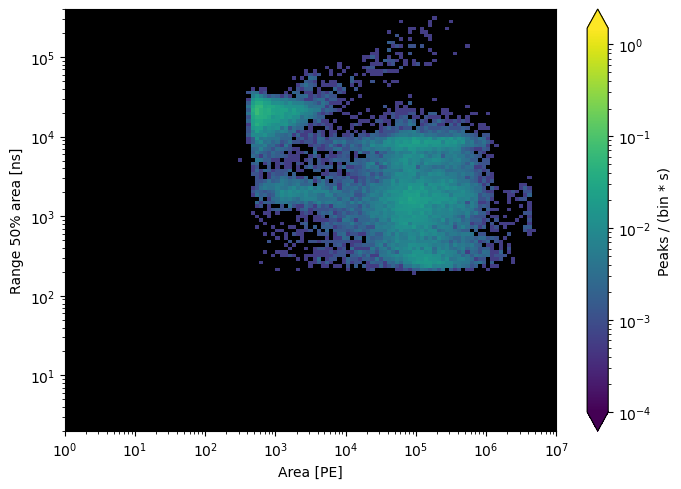

In [304]:
plot_area_width_histogram(pS2s_original, run_duration)

13


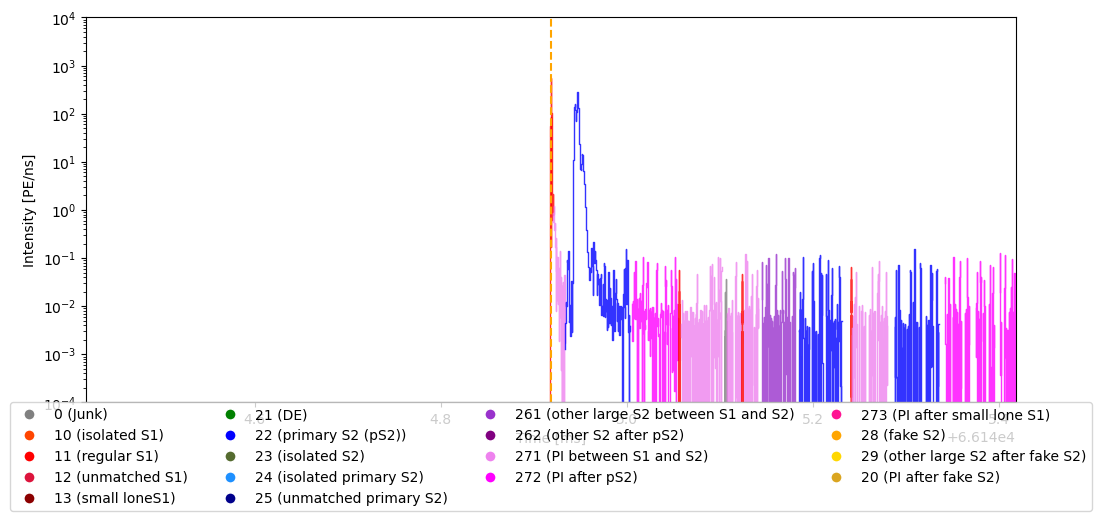

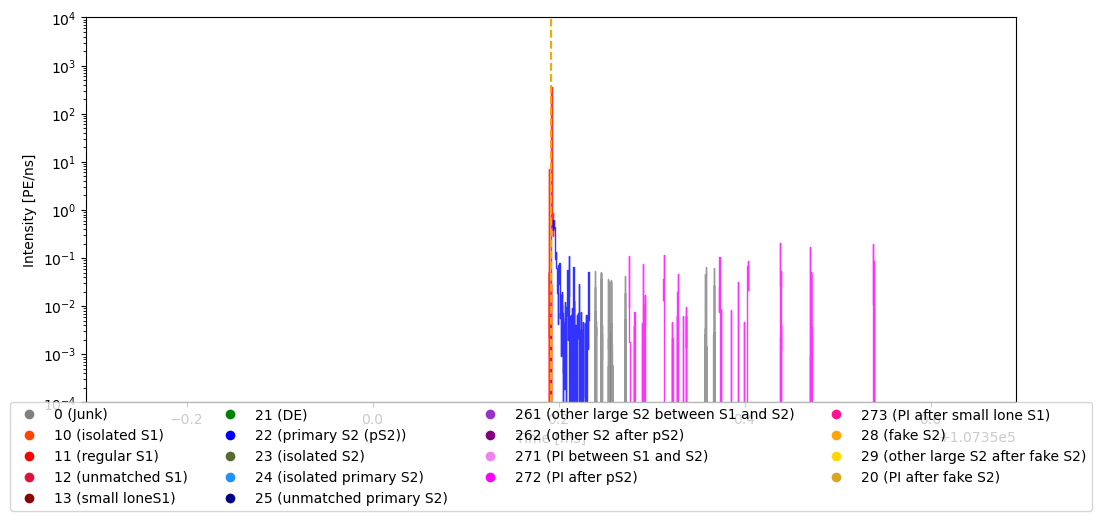

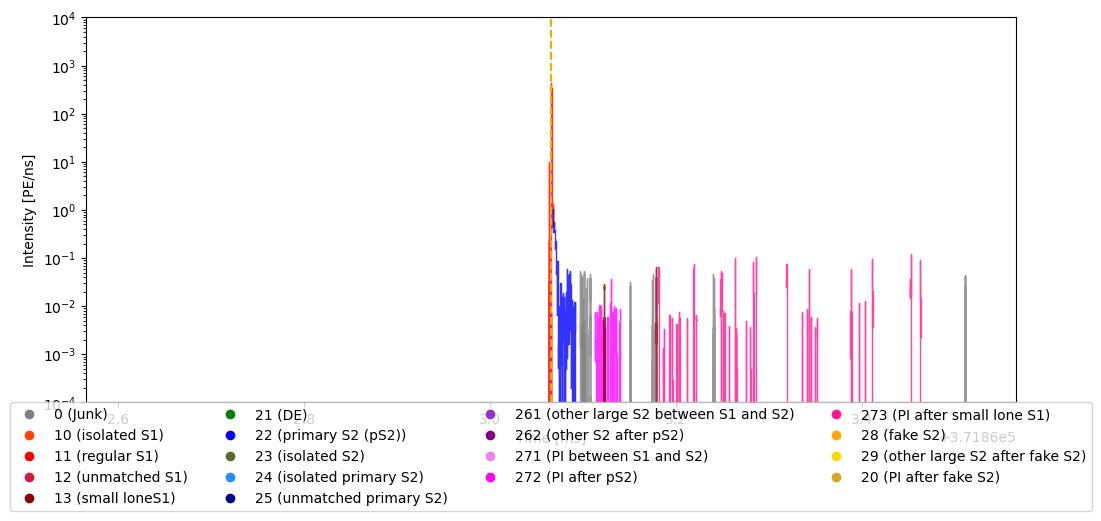

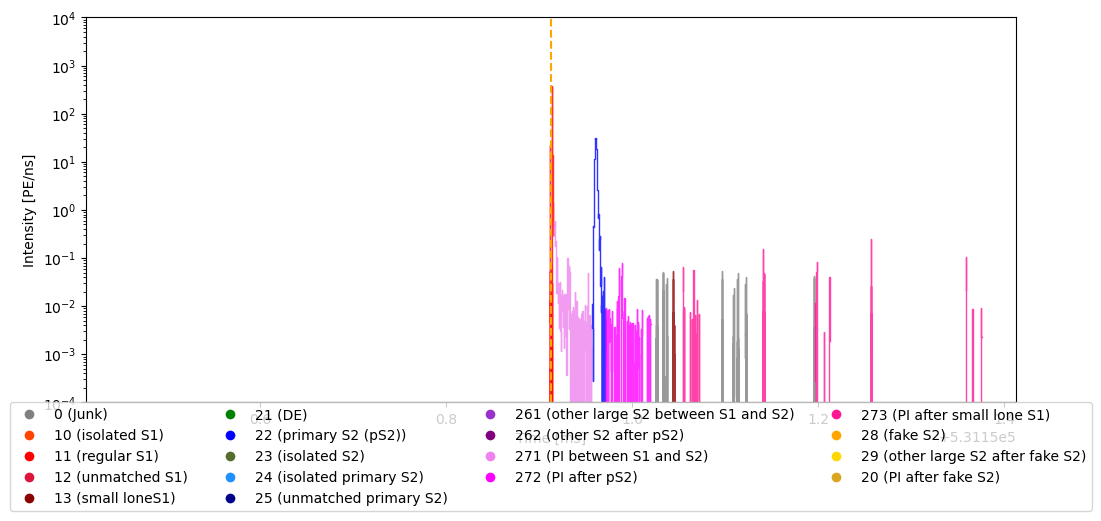

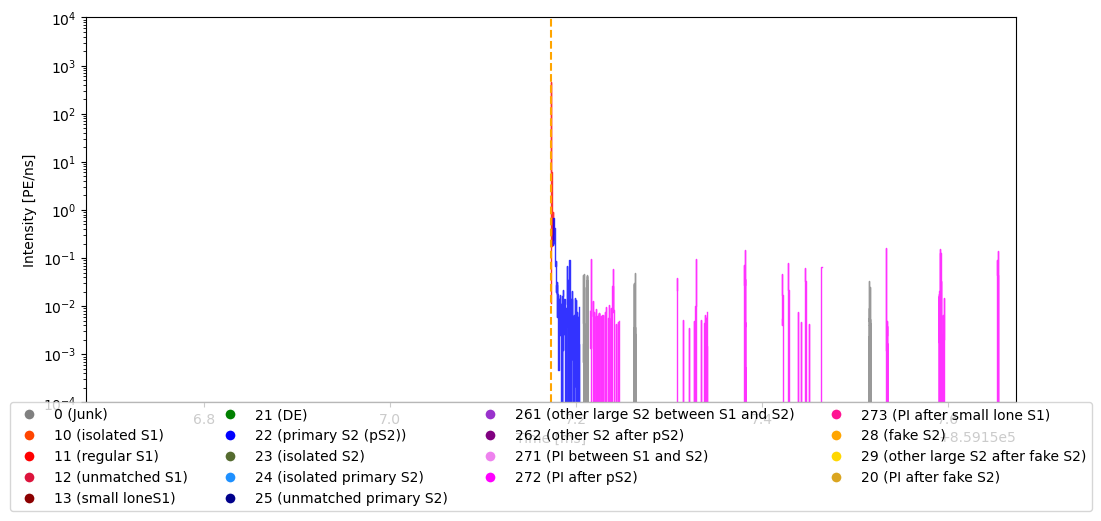

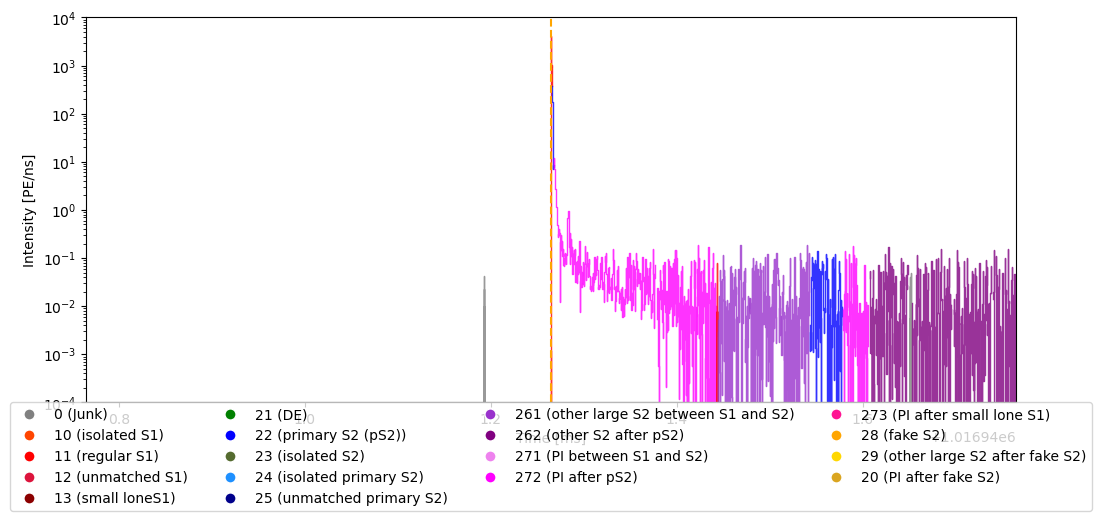

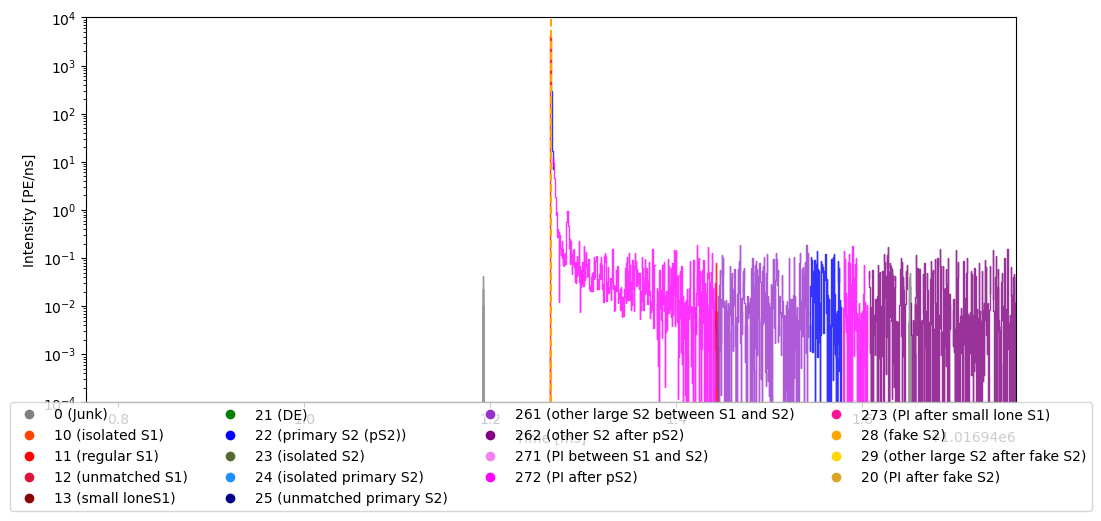

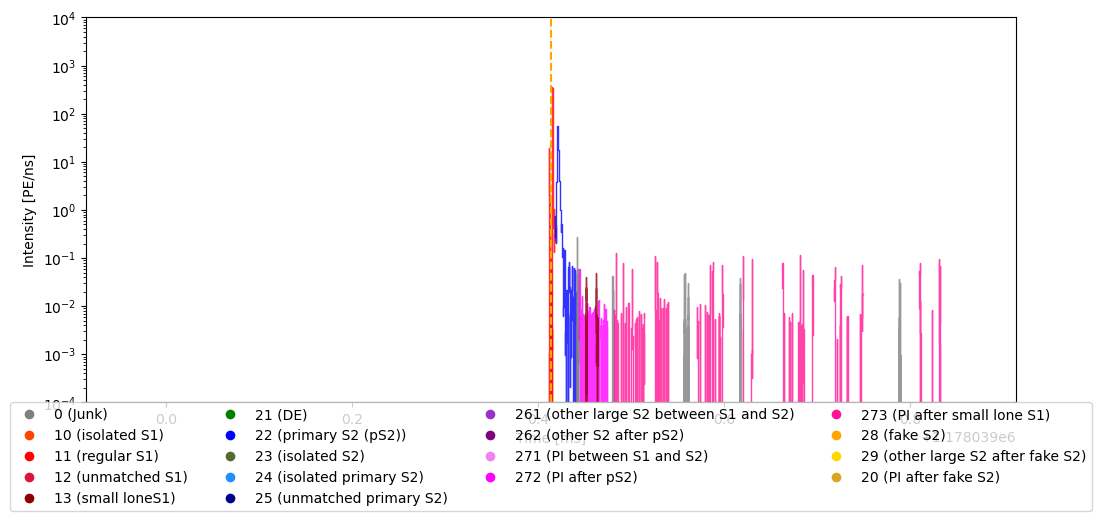

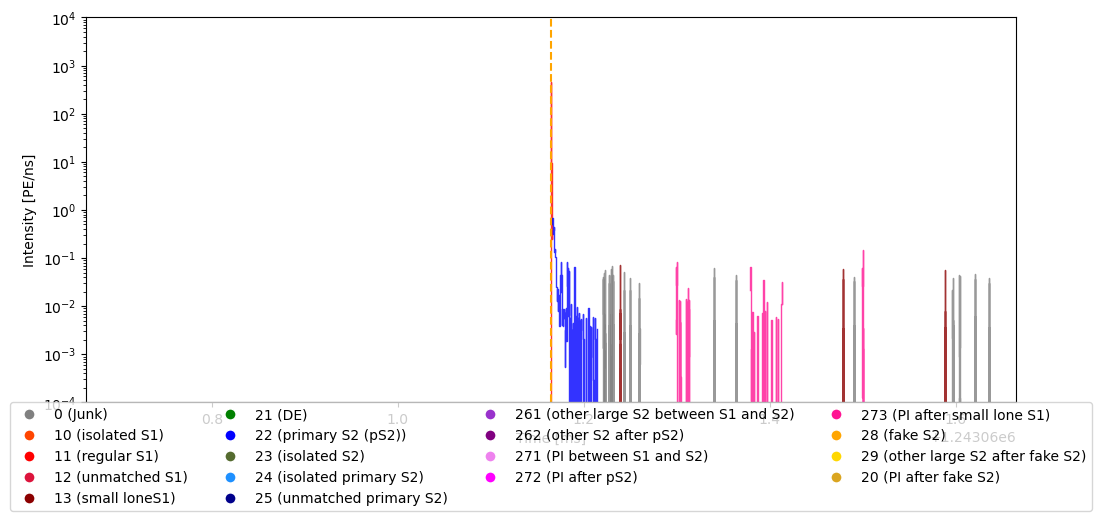

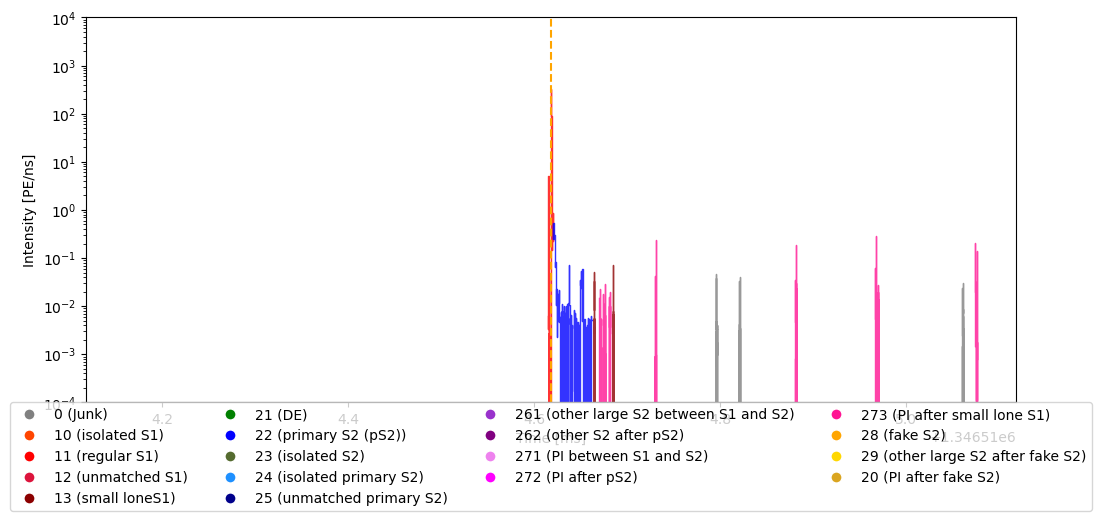

In [303]:
large_s1s = S1s_new[S1s_new['area'] > 100000]

print(len(large_s1s))

for i in range(10 if len(large_s1s) > 10 else len(large_s1s)):
    fig, ax = hf.plot_peaks(run_id, peaks, t_reference=large_s1s[i]['time'], window_ms=0.5)

In [362]:
import data_selection as ds
importlib.reload(ds)

pS2s_new, DEs_new, S1s_new, _, _ = ds.data_selection_new(run_id, peaks)

You specified _auto_append_rucio_local=True and you are not on dali compute nodes, so we will add the following rucio local path: /project/lgrandi/rucio/


Unknown config option xedocs_version; will do nothing.
Invalid context option xedocs_version; will do nothing.


('subtype_mask',) 0.3.0
('pS2_relabel',) 0.0.0
('wf_piecewise_info',) 0.0.1
('n_electron_rec',) 0.0.2
You specified _auto_append_rucio_local=True and you are not on dali compute nodes, so we will add the following rucio local path: /project/lgrandi/rucio/


Unknown config option xedocs_version; will do nothing.
Invalid context option xedocs_version; will do nothing.
Option bayes_config_file not taken by any registered plugin
Option tf_event_model_cnn not taken by any registered plugin
Option tf_event_model_gcn not taken by any registered plugin
Option tf_event_model_mlp not taken by any registered plugin
Option tf_event_model_s1_cnn not taken by any registered plugin
Option tf_model_cnn not taken by any registered plugin
Option tf_model_gcn not taken by any registered plugin


('subtype_mask',) 0.3.0
('pS2_relabel',) 0.0.0
('wf_piecewise_info',) 0.0.1
('n_electron_rec',) 0.0.2
DAQ veto intervals not found, oop

2224 values reassigned from pS2s into all_DEs (or cut entirely)
278281 single- or few-electron signals cut, 
representing 85.09% of all single- or few-electron signals

Length of run: 1802.83s
Loaded 1856.8 MB of peaks-data (188.3 MB of which are pS2s and DEs)
3663 electrons cut, representing 7.56% of all electrons


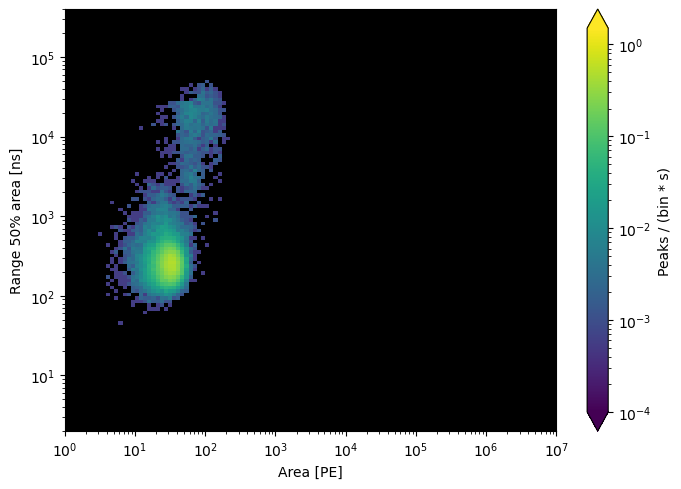

In [290]:
fig, ax = plot_area_width_histogram(DEs_new, run_duration)

9


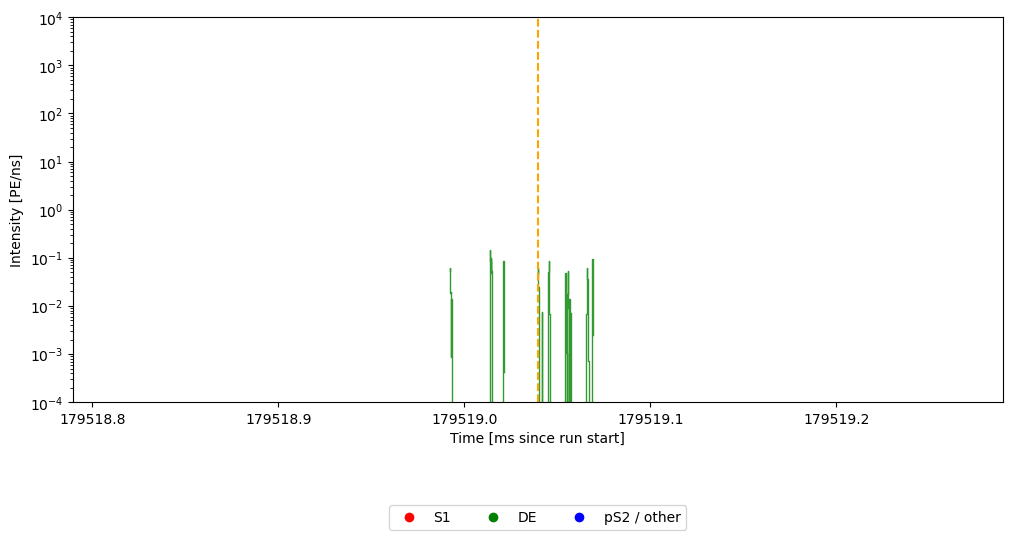

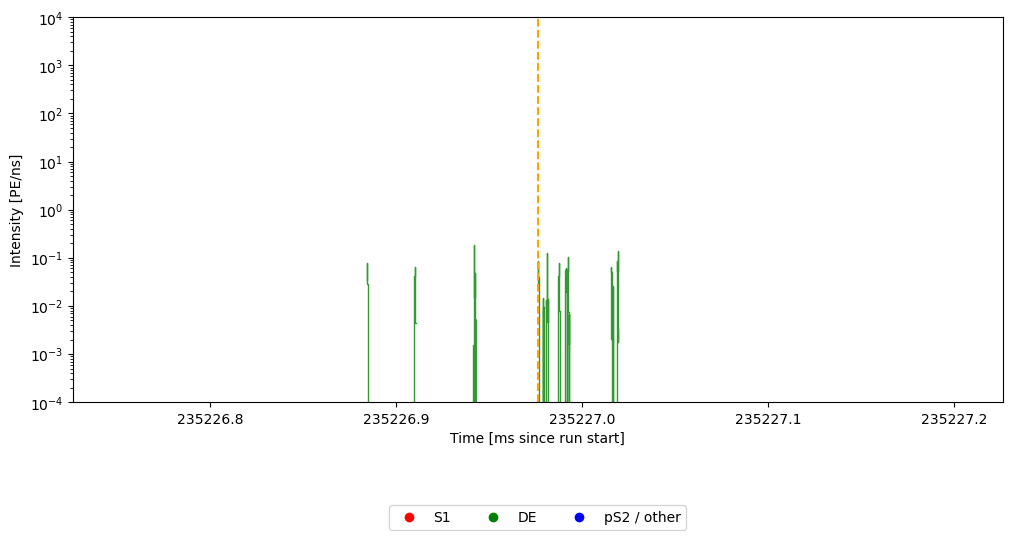

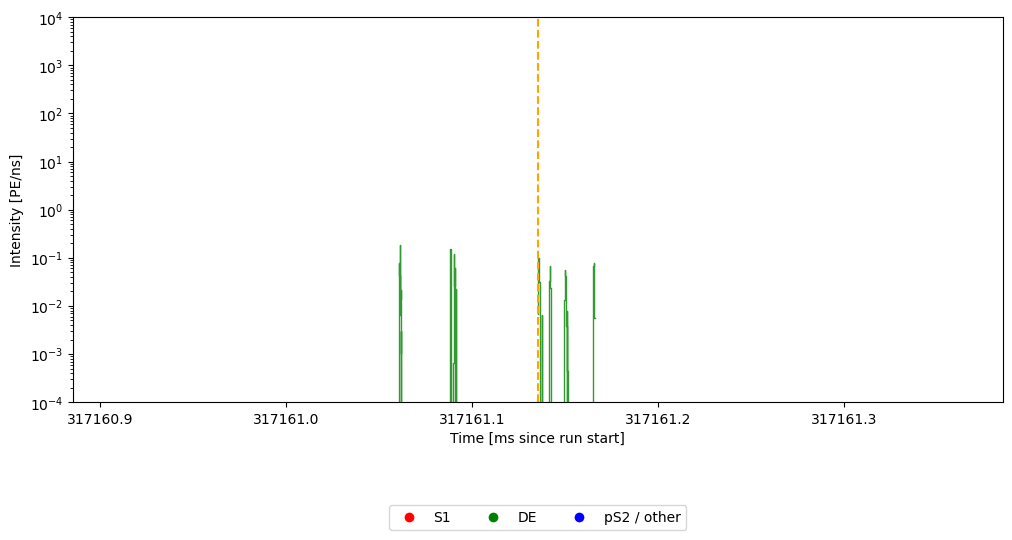

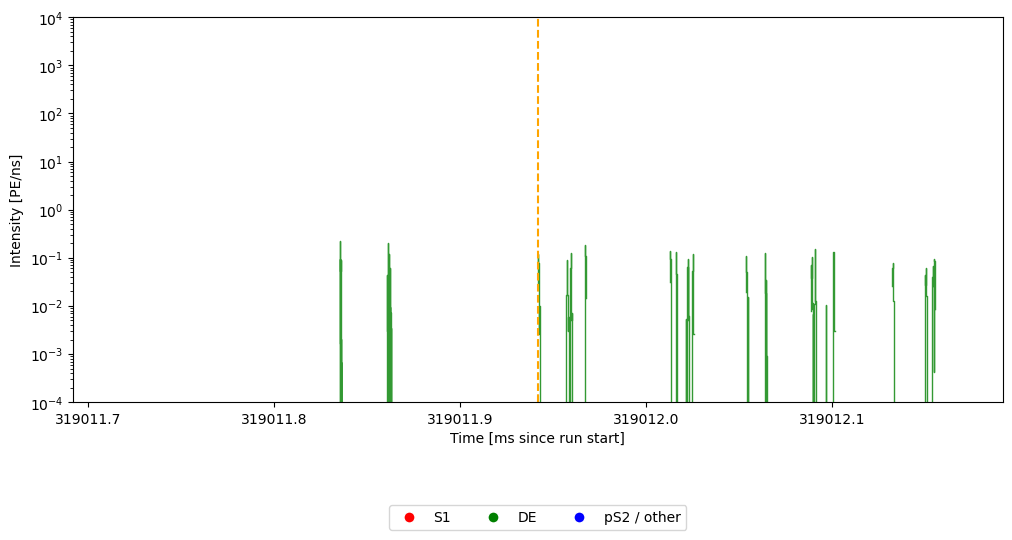

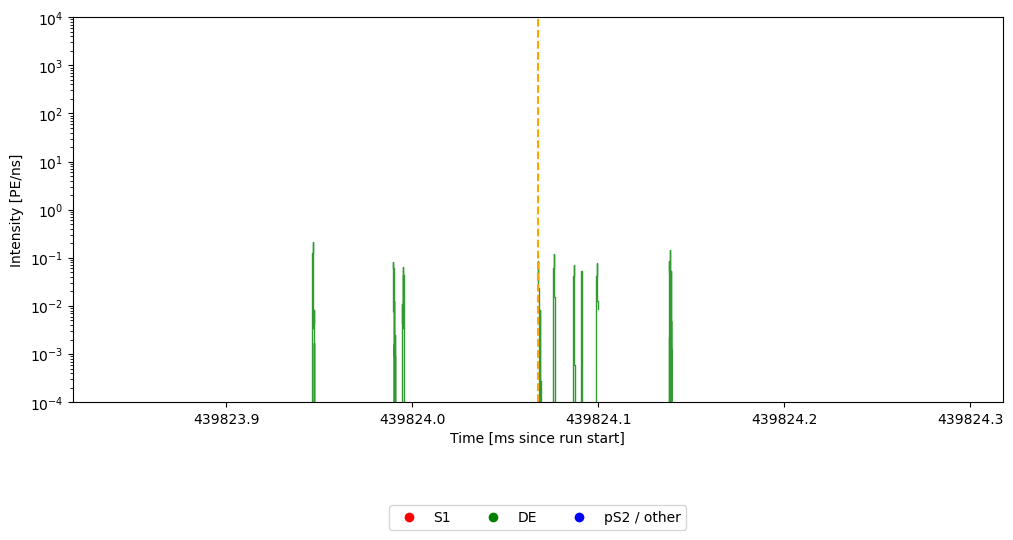

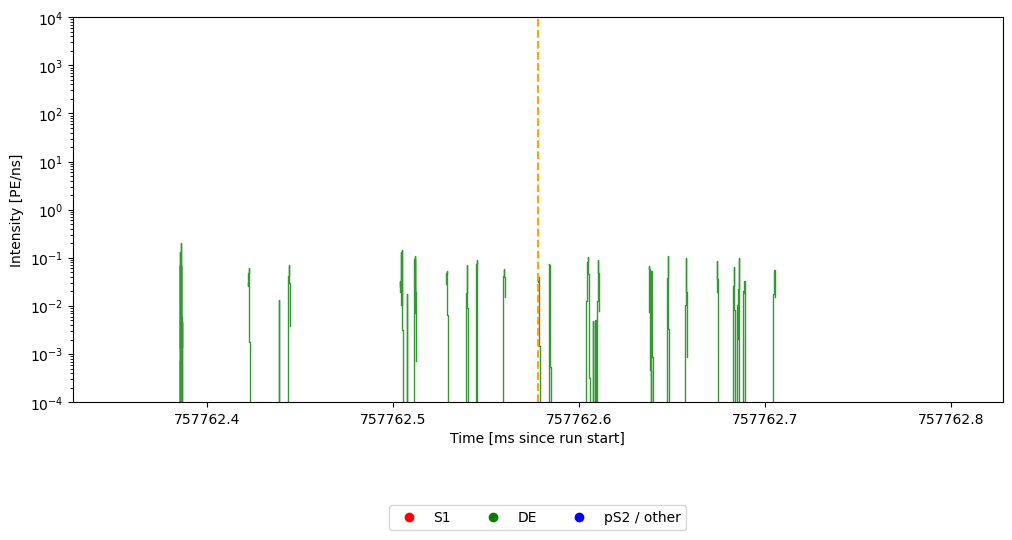

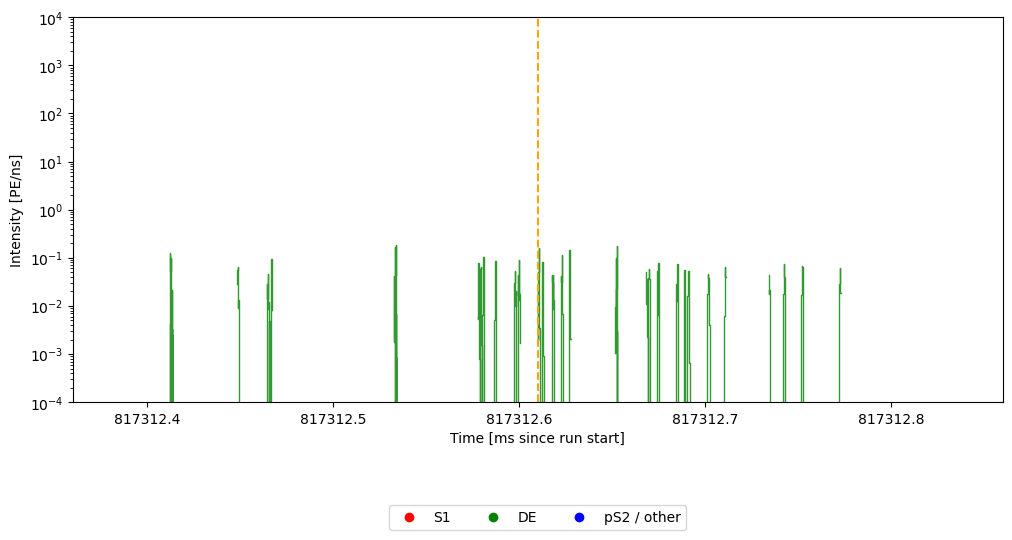

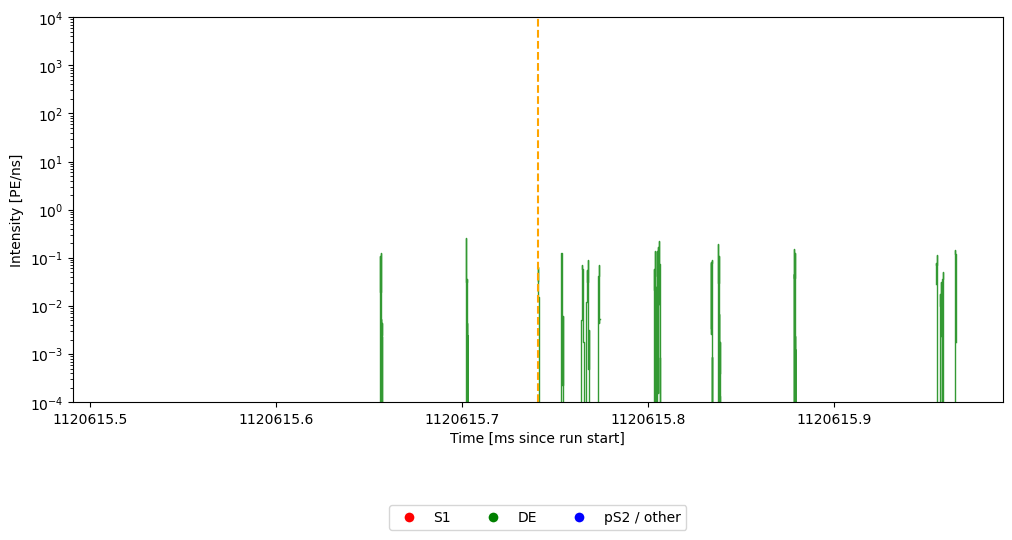

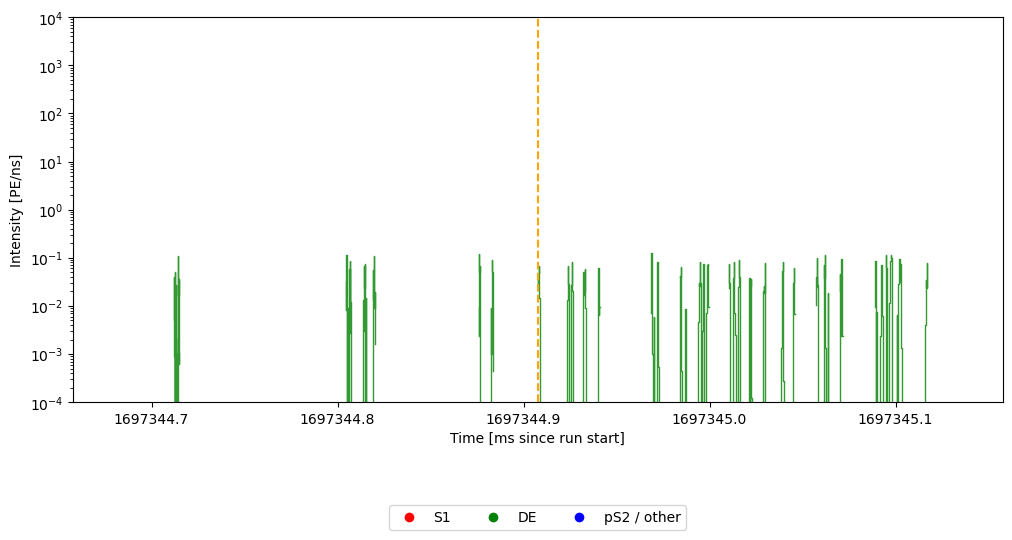

In [293]:
up = DEs_new[DEs_new['area'] > 175]

print(len(up))

for i in range(len(up)):
    fig, ax = plot_peaks(run_id, peaks, t_reference=up[i]['time'], window_ms=0.5)

In [277]:
len(DEs_new[DEs_new['n_electron_rec'] > 5])

print(len(DEs_new))

38490


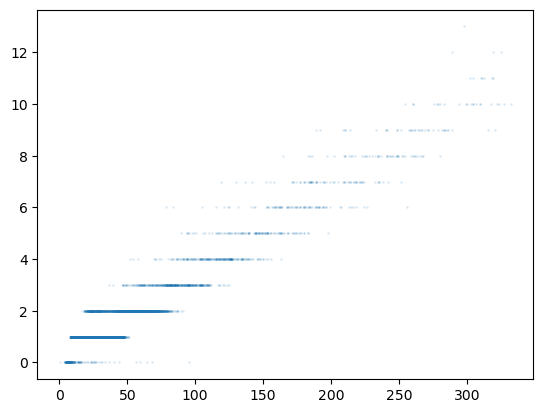

In [272]:
plt.scatter(DEs_new['area'], DEs_new['n_electron_rec'], s=1, alpha=0.1)


28 high-width S1s found


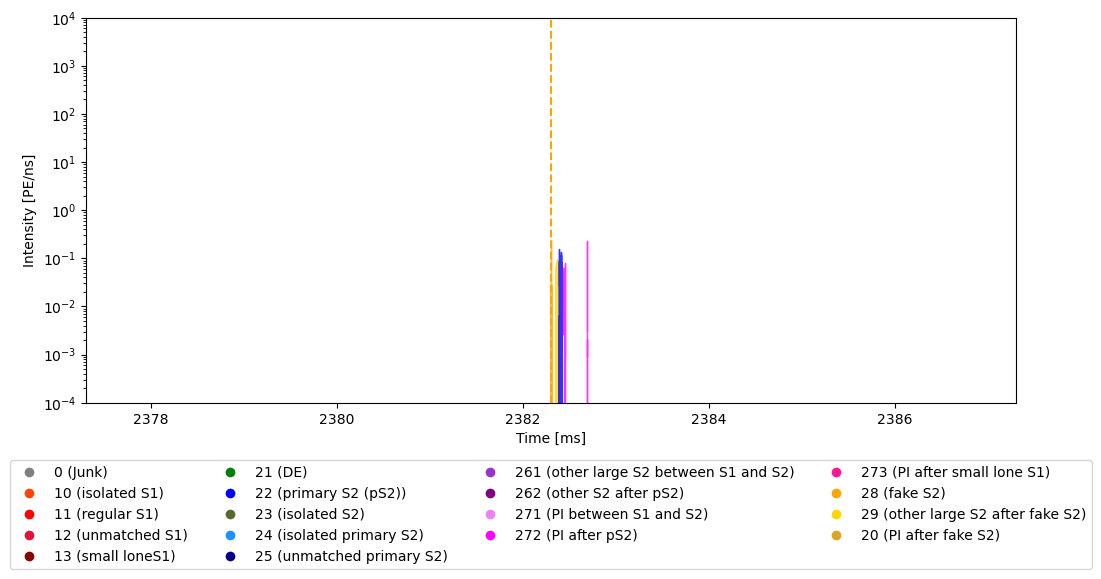

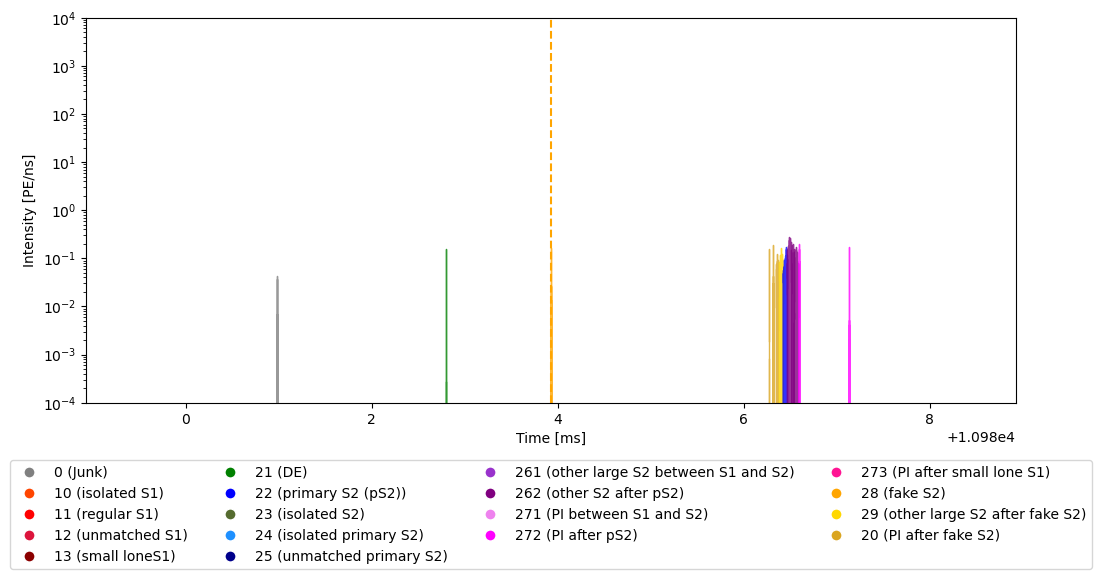

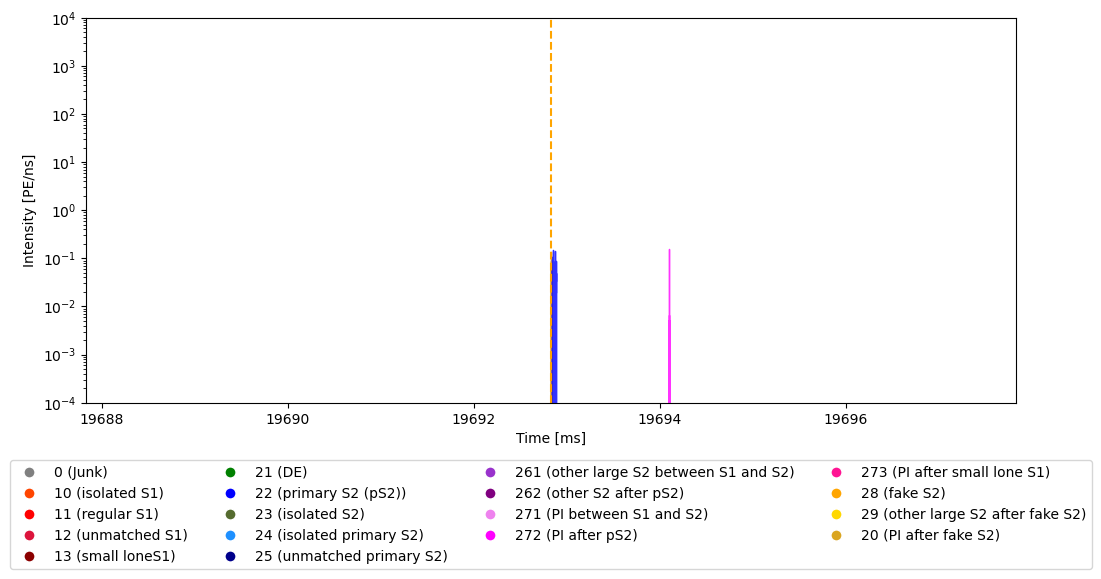

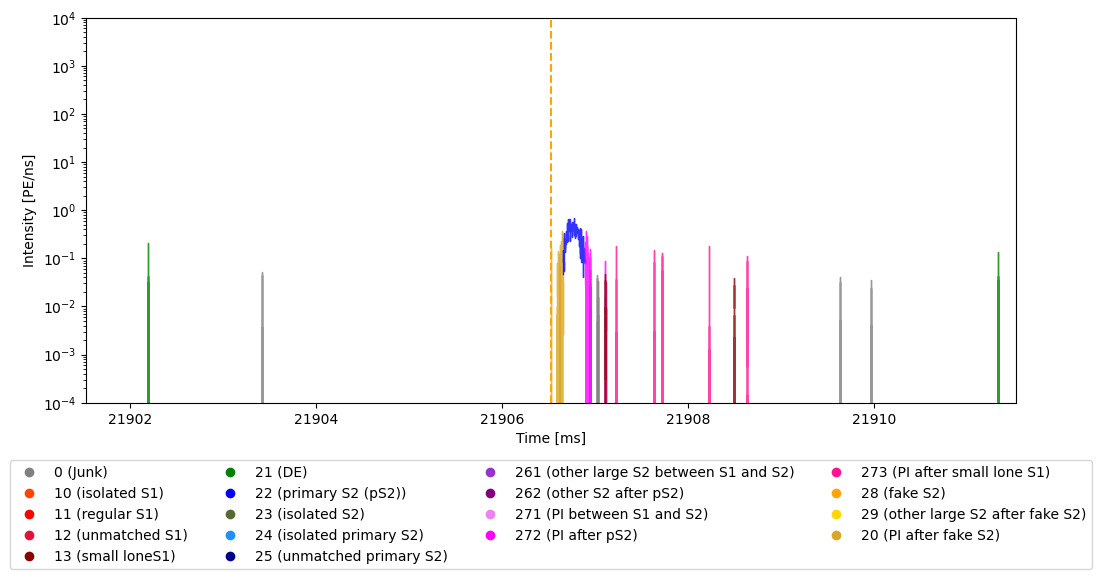

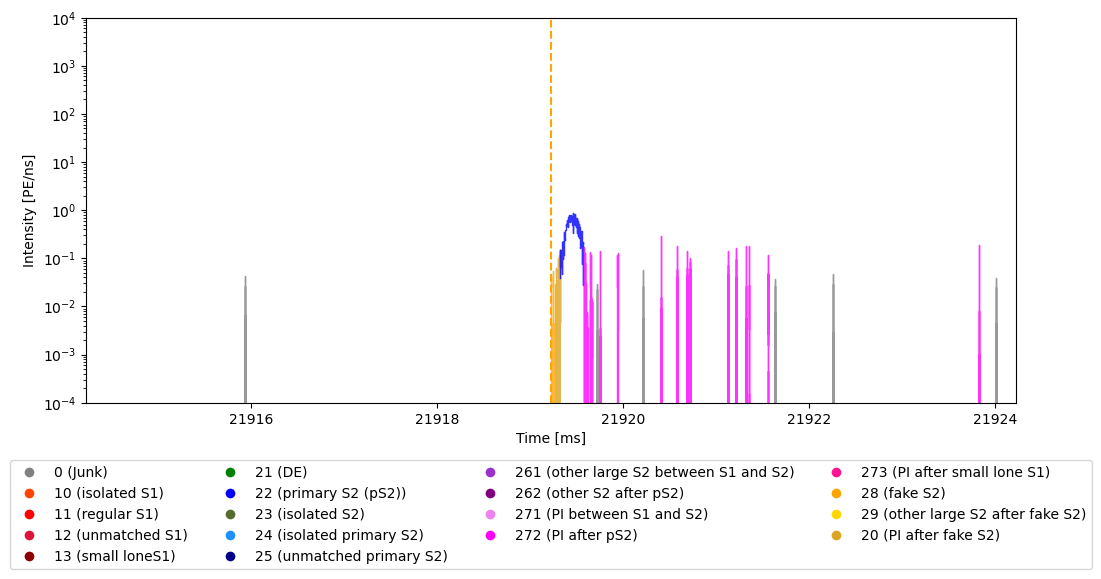

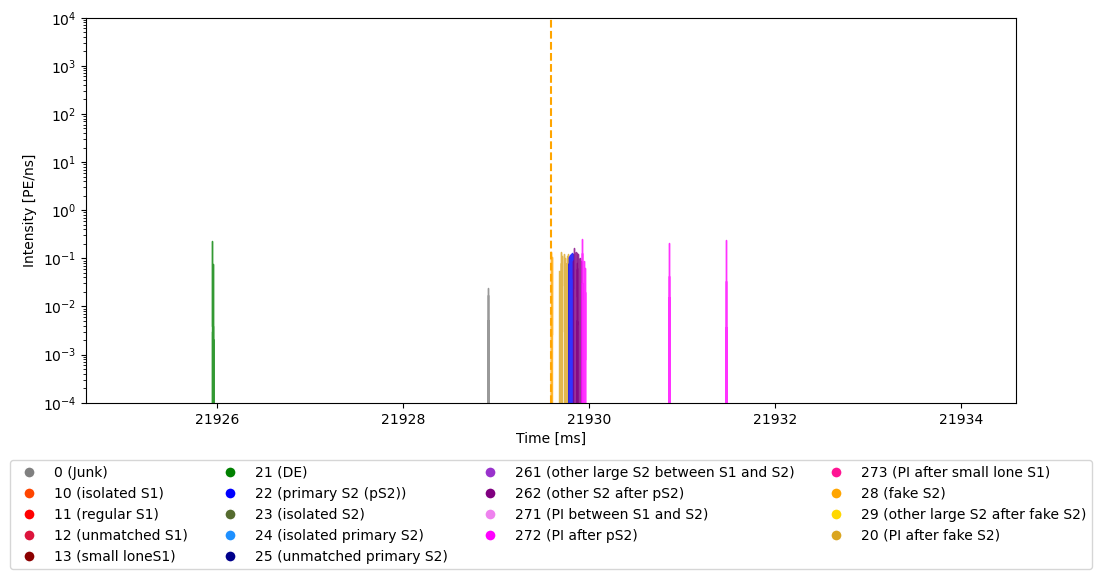

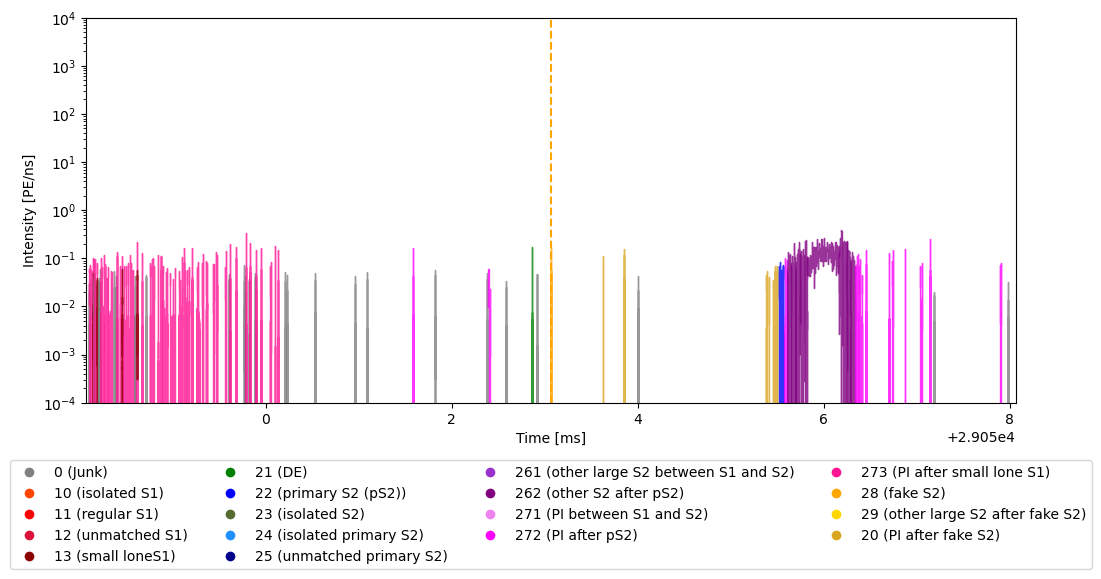

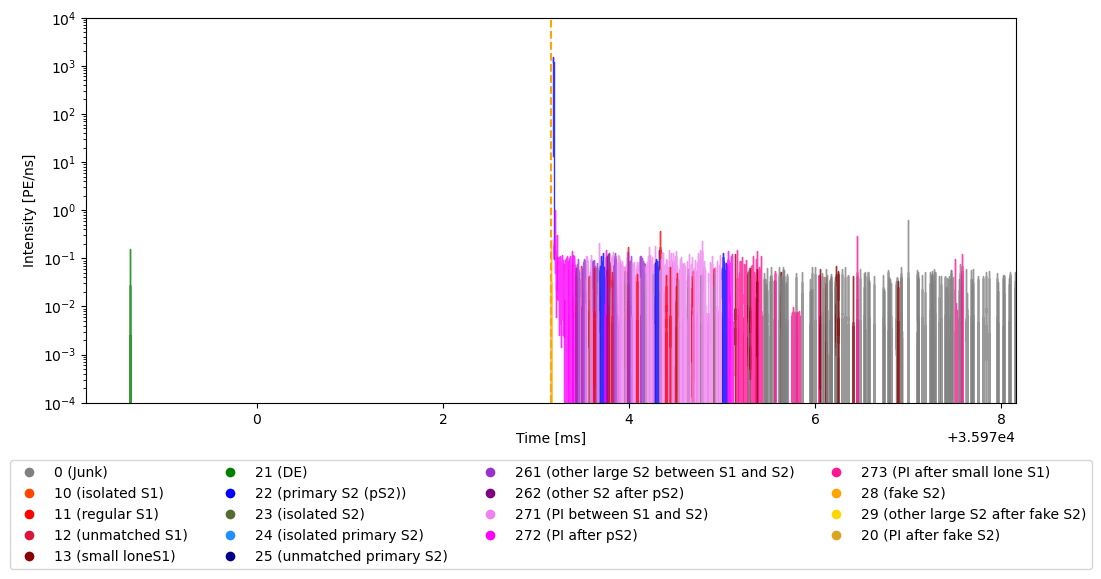

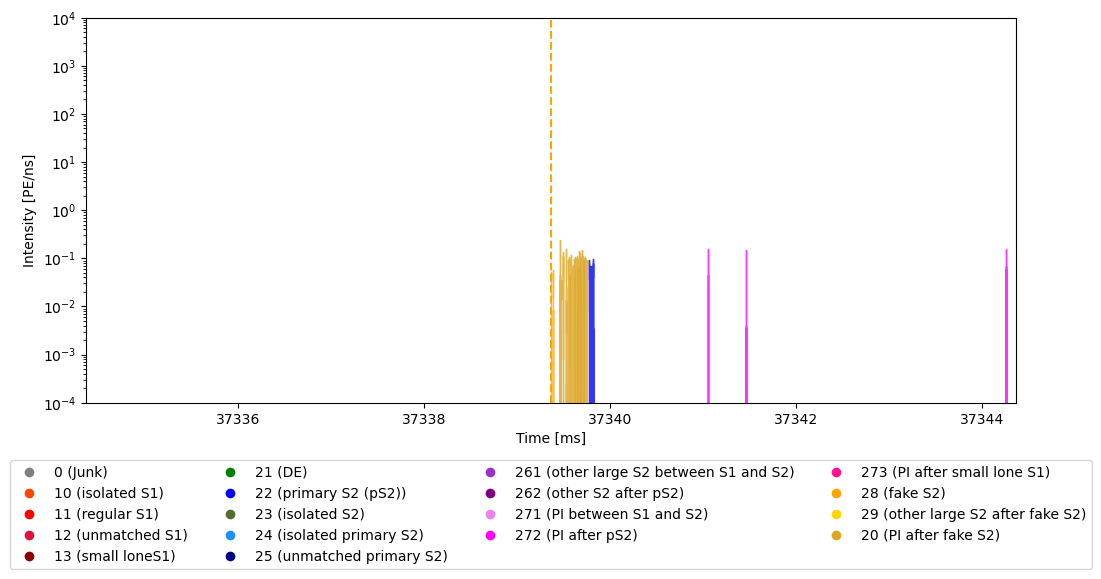

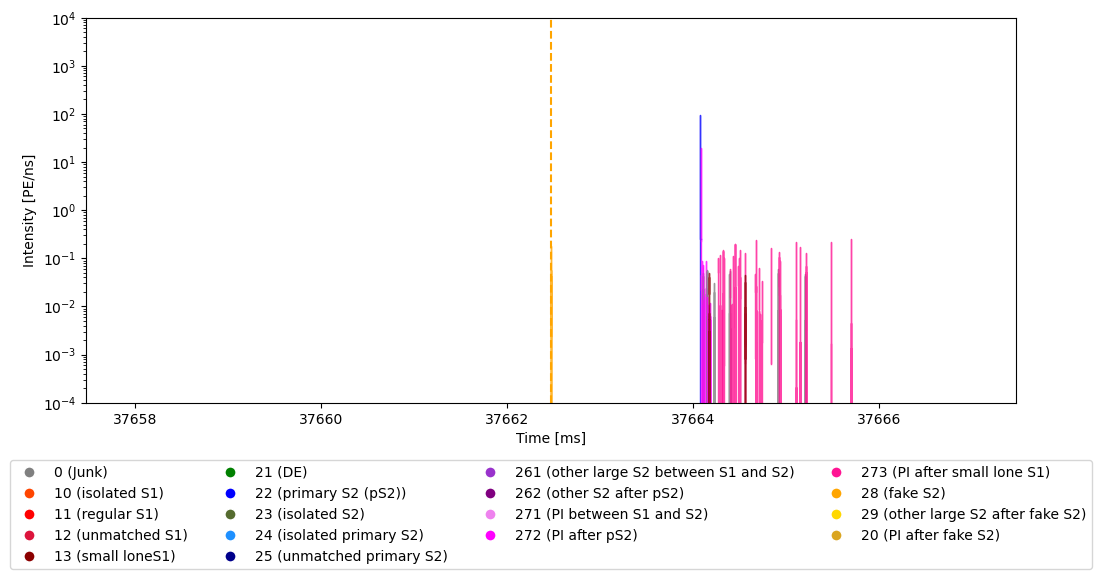

In [ ]:
high_width_S1s = S1s_new[(S1s_new['range_50p_area'] > 1e3)]
print(f"\n{len(high_width_S1s)} high-width S1s found")

two8 = peaks[peaks['subtype'] == 28]

for i in range(10):
    fig, ax = plot_peaks(run_id, peaks, t_reference = two8['time'][i], vetos=DAQ_vetos, window_ms = 5, log=True)

261896
63777
0


(<Figure size 700x500 with 2 Axes>,
 <Axes: xlabel='Area [PE]', ylabel='Range 50% area [ns]'>)

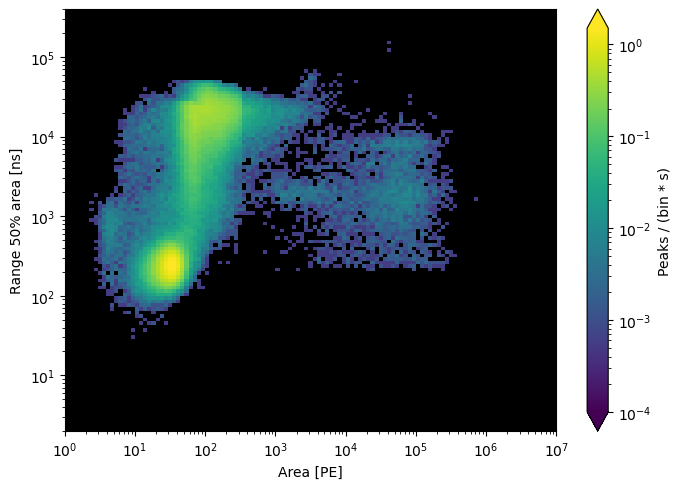

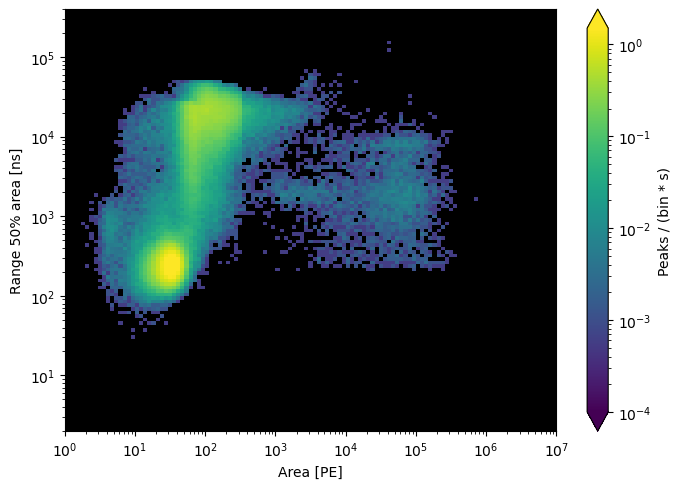

In [107]:
prompt_electrons = peaks[np.isin(peaks['subtype'], [20, 271, 272, 273])]
des = peaks[peaks['subtype'] == 23]
des21 = peaks[peaks['subtype'] == 21]

all_ees = peaks[np.isin(peaks['subtype'], [20, 21, 23, 271, 272, 273])]

print(len(prompt_electrons))
print(len(des21))
print(len(des))
plot_area_width_histogram(prompt_electrons, run_duration)
# plot_area_width_histogram(des21, run_duration)
plot_area_width_histogram(all_ees, run_duration)

(<Figure size 700x500 with 2 Axes>,
 <Axes: xlabel='Area [PE]', ylabel='Range 50% area [ns]'>)

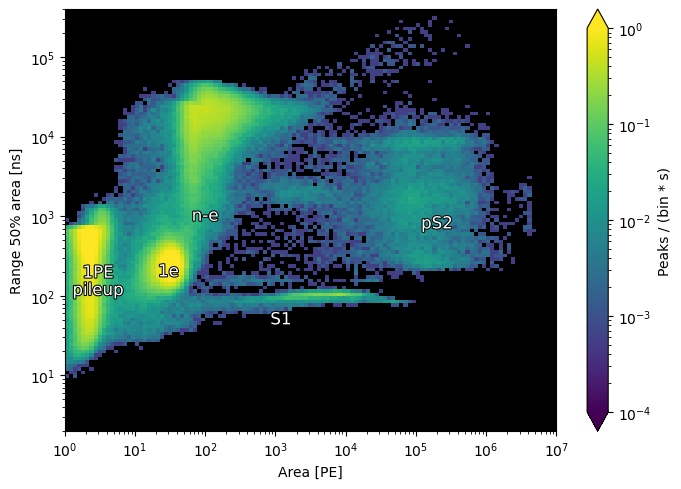

In [92]:
plot_area_width_histogram(peaks, run_duration)

In [7]:
import numpy as np

# remains = np.concatenate((S1s_new, peaks[peaks['subtype'] == 0]))
# plot_area_width_histogram(remains, run_duration)

# check = np.concatenate((peaks[peaks['type'] == 1], peaks[peaks['type'] == 0]))
pS2s_new = (pS2s_new[~((pS2s_new['range_50p_area'] > 4e4) & (pS2s_new['area'] < 2e6))])
plot_area_width_histogram(pS2s_new, run_duration)

NameError: name 'pS2s_new' is not defined

(<Figure size 700x500 with 2 Axes>,
 <Axes: xlabel='Area [PE]', ylabel='Range 50% area [ns]'>)

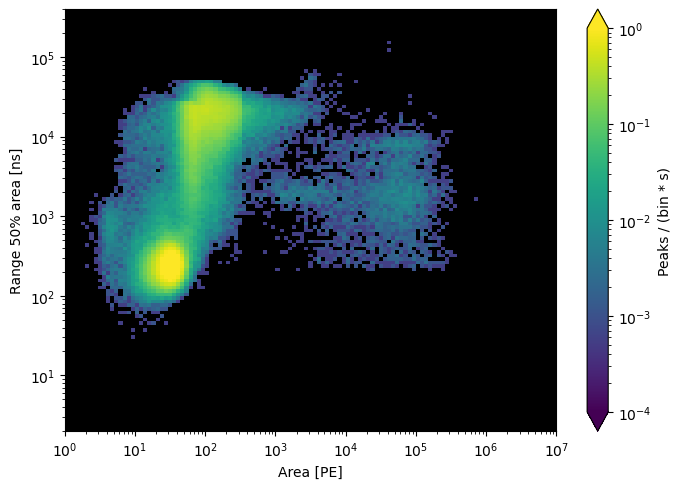

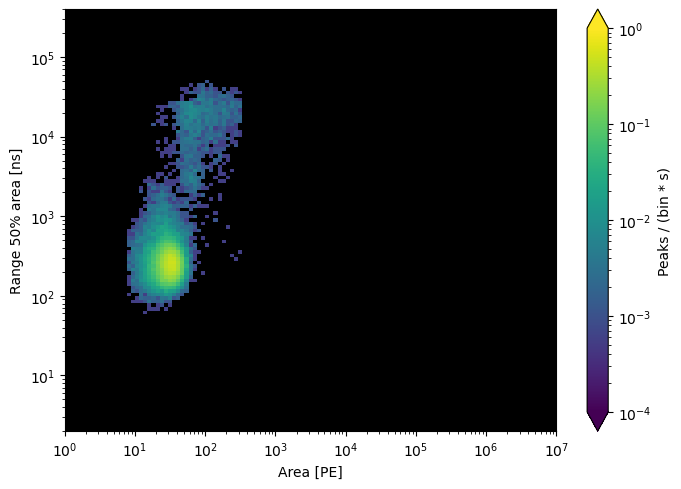

In [11]:
all_DEs = peaks[np.isin(peaks['subtype'], [20, 21, 23, 271, 272, 273])]

plot_area_width_histogram(all_DEs, run_duration)
plot_area_width_histogram(DEs_new, run_duration)

In [314]:
import numpy as np
import pandas as pd

# assuming s2_peaks is a structured array or dataframe with "time" (ns) and "area"
s2_times = pS2s_new["time"]
s2_areas = pS2s_new["area"]

# Compute time difference to next S2 (ns → ms)
dt_to_next_s2 = np.diff(s2_times) * 1e-6
dt_to_next_s2 = np.append(dt_to_next_s2, np.inf)  # pad so arrays are same length

# Mark double-scatter S2s: those with a next S2 within 2.3 ms
is_double = dt_to_next_s2 < 2.3

# Apply your area cut
area_cut = s2_areas > 150

# Fraction of large S2s that are doubles
double_rate = np.sum(is_double & area_cut) / np.sum(area_cut)
print(f"Double scatter rate for S2s with area > 150: {double_rate*100:.2f}%")

# Optional: get list of times or indices of double-scatter events
double_scatter_indices = np.where(is_double & area_cut)[0]




Double scatter rate for S2s with area > 150: 39.73%


In [320]:
import numpy as np

s2_peaks = pS2s_new.copy()  # working copy
fdt_ms = 2.3           # full drift time in ms
area_cut_value = 300    # example area cut

#-------------------------------------------------
# Sort by time (important)
#-------------------------------------------------
s2_peaks = np.sort(s2_peaks, order='time')

# Convert times to ms for convenience
s2_times_ms = s2_peaks['time'] * 1e-6

#-------------------------------------------------
# Compute time to next S2
#-------------------------------------------------
dt_to_next_ms = np.diff(s2_times_ms)
dt_to_next_ms = np.append(dt_to_next_ms, np.inf)  # pad last entry
# Append new column to structured array
s2_peaks = np.lib.recfunctions.append_fields(
    s2_peaks, 'dt_to_next_s2_ms', dt_to_next_ms, usemask=False
)

#-------------------------------------------------
# Double scatter: next S2 within 2.3 ms
#-------------------------------------------------
is_double = dt_to_next_ms < fdt_ms
s2_peaks = np.lib.recfunctions.append_fields(
    s2_peaks, 'is_double_scatter', is_double, usemask=False
)

#-------------------------------------------------
# Multiple scatter: at least one other S2 within ±2.3 ms
#-------------------------------------------------
multi_counts = np.zeros(len(s2_times_ms), dtype=int)
for i, t in enumerate(s2_times_ms):
    nearby = np.sum(np.abs(s2_times_ms - t) < fdt_ms)
    multi_counts[i] = nearby
is_multiple = multi_counts > 1

s2_peaks = np.lib.recfunctions.append_fields(
    s2_peaks, 'multi_count_within_2p3ms', multi_counts, usemask=False
)
s2_peaks = np.lib.recfunctions.append_fields(
    s2_peaks, 'is_multiple_scatter', is_multiple, usemask=False
)

#-------------------------------------------------
# Apply area cut
#-------------------------------------------------
large_mask = s2_peaks['area'] > area_cut_value

#-------------------------------------------------
# Summary stats
#-------------------------------------------------
n_total = len(s2_peaks)
n_large = np.sum(large_mask)
n_double = np.sum(s2_peaks['is_double_scatter'])
n_multiple = np.sum(s2_peaks['is_multiple_scatter'])
n_double_large = np.sum(s2_peaks['is_double_scatter'] & large_mask)
n_multiple_large = np.sum(s2_peaks['is_multiple_scatter'] & large_mask)

print("=== S2 Scatter Statistics ===")
print(f"Total S2s: {n_total}")
print(f"S2s with area > {area_cut_value}: {n_large}\n")
print(f"Double scatters (< {fdt_ms} ms apart): {n_double} ({n_double/n_total*100:.2f}% of all S2s)")
print(f"Multiple scatters (>2 within {fdt_ms} ms): {n_multiple} ({n_multiple/n_total*100:.2f}% of all S2s)\n")
print(f"Double scatters among large S2s: {n_double_large} ({n_double_large/n_large*100:.2f}%)")
print(f"Multiple scatters among large S2s: {n_multiple_large} ({n_multiple_large/n_large*100:.2f}%)")



=== S2 Scatter Statistics ===
Total S2s: 16020
S2s with area > 300: 16020

Double scatters (< 2.3 ms apart): 6364 (39.73% of all S2s)
Multiple scatters (>2 within 2.3 ms): 9333 (58.26% of all S2s)

Double scatters among large S2s: 6364 (39.73%)
Multiple scatters among large S2s: 9333 (58.26%)


In [336]:
import numpy as np

# Example inputs
s2_peaks = np.sort(s2_peaks, order="time")
drift_time_ns = 2.3e6  # 2.3 ms in ns

# Find all adjacent S2 pairs closer than one drift time
dt = np.diff(s2_peaks["time"])
close_pairs = np.where(dt < drift_time_ns)[0]

# Mark both members of each close pair as "multiple scatter"
multiple_mask = np.zeros(len(s2_peaks), dtype=bool)
multiple_mask[close_pairs] = True          # mark the later one
multiple_mask[close_pairs + 1] = True      # mark the earlier one

# Count
n_multiple = np.count_nonzero(multiple_mask)
frac_multiple = n_multiple / len(s2_peaks) * 100

print(f"Double or multiple scatters (≤2.3 ms apart): {n_multiple} "
      f"({frac_multiple:.2f}% of all pS2s)")


Double or multiple scatters (≤2.3 ms apart): 9333 (58.26% of all pS2s)


In [352]:
DEs_test = DEs_new['area'].copy()

#Want to divide DEs_new['area'] by 31 to get new array with number of electrons
DEs_test_n = np.round(DEs_test / 31)

print(len(DEs_test_n[DEs_test_n == 0]))
print(len(DEs_test_n[DEs_test_n == 1]))
print(len(DEs_test_n[DEs_test_n == 2]))
print(len(DEs_test_n[DEs_test_n == 3]))
print(len(DEs_test_n[DEs_test_n == 4]))
print(len(DEs_test_n[DEs_test_n == 5]))
print(len(DEs_test_n[DEs_test_n > 5]))

print("\nNew method:\n")
print(len(DEs_new[DEs_new['n_electron_rec'] == 0]))
print(len(DEs_new[DEs_new['n_electron_rec'] == 1]))
print(len(DEs_new[DEs_new['n_electron_rec'] == 2]))
print(len(DEs_new[DEs_new['n_electron_rec'] == 3]))
print(len(DEs_new[DEs_new['n_electron_rec'] == 4]))
print(len(DEs_new[DEs_new['n_electron_rec'] == 5]))
print(len(DEs_new[DEs_new['n_electron_rec'] > 5]))

1278
34209
2162
326
168
68
14

New method:

168
35008
2403
336
197
113
0


In [337]:
livetime_windows = np.diff(pS2s_new['time']) * 1e-6  # in ms
livetime_windows = np.append(livetime_windows, np.nan)  # pad last entry

livetime_windows_exc_ds = livetime_windows[livetime_windows > 2.3]

print(f"Number of single scatters is {len(livetime_windows_exc_ds)*100 / len(livetime_windows):.2f}%")

Number of single scatters is 60.27%


You specified _auto_append_rucio_local=True and you are not on dali compute nodes, so we will add the following rucio local path: /project/lgrandi/rucio/


Unknown config option xedocs_version; will do nothing.
Invalid context option xedocs_version; will do nothing.


('subtype_mask',) 0.3.0
('pS2_relabel',) 0.0.0
('wf_piecewise_info',) 0.0.1
('n_electron_rec',) 0.0.2
You specified _auto_append_rucio_local=True and you are not on dali compute nodes, so we will add the following rucio local path: /project/lgrandi/rucio/


Unknown config option xedocs_version; will do nothing.
Invalid context option xedocs_version; will do nothing.


('subtype_mask',) 0.3.0
('pS2_relabel',) 0.0.0
('wf_piecewise_info',) 0.0.1
('n_electron_rec',) 0.0.2


c:\Users\conor\miniforge3\envs\project_env\lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


141454 single- or few-electron signals cut, 
representing 75.14% of all single- or few-electron signals


(<Figure size 700x500 with 2 Axes>,
 <Axes: xlabel='Area [PE]', ylabel='Range 50% area [ns]'>)

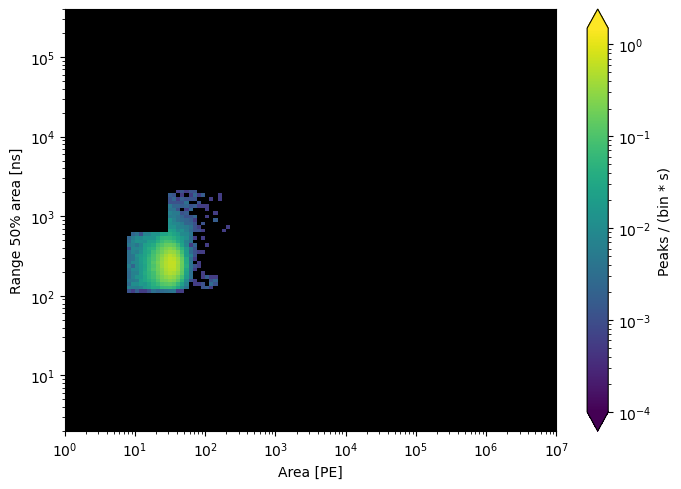

In [333]:
import data_selection as ds
importlib.reload(ds)

ku_ps2s, ku_des, ku_des_cut = ds.data_selection_ku(run_id, peaks, show_plot = False)
# plot_area_width_histogram(ku_des, run_duration)
plot_area_width_histogram(ku_des_cut, run_duration)
# plot_area_width_histogram(ku_ps2s, run_duration)

In [335]:
_, _, _, _, _ = ds.data_selection_new(run_id, peaks)

DAQ veto intervals not found, oop

2224 values reassigned from pS2s into all_DEs (or cut entirely)


c:\Users\conor\miniforge3\envs\project_env\lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


278281 single- or few-electron signals cut, 
representing 85.09% of all single- or few-electron signals

Length of run: 1802.83s
Loaded 1856.8 MB of peaks-data (188.3 MB of which are pS2s and DEs)
3663 electrons cut, representing 7.56% of all electrons


In [332]:
len(ku_ps2s)
len(pS2s_new)

16020

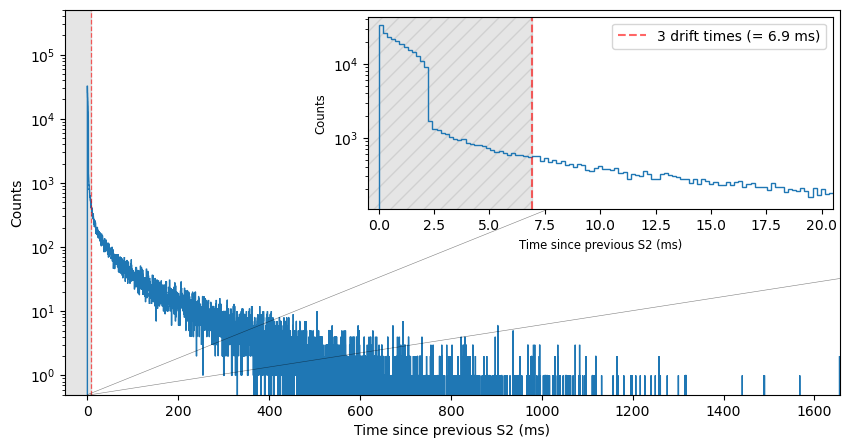

In [34]:
import numpy as np

def compute_time_diffs(DE_times, pS2_times):
    """
    Compute time difference between each DE and the most recent pS2 before it.
    
    Parameters
    ----------
    DE_times : array-like
        Times of delayed electrons (e.g. in microseconds).
    pS2_times : array-like
        Times of post-S2s (e.g. in microseconds).
    
    Returns
    -------
    diffs : np.ndarray
        Time differences (DE_time - closest preceding pS2_time).
        If a DE has no preceding pS2, it is skipped.
    """
    DE_times = np.asarray(DE_times)
    pS2_times = np.asarray(pS2_times)

    # Make sure they are sorted
    DE_times.sort()
    pS2_times.sort()

    # Find index of the most recent pS2 for each DE
    indices = np.searchsorted(pS2_times, DE_times) - 1
    
    # Filter out DEs that occur before the first pS2
    valid = indices >= 0
    diffs = DE_times[valid] - pS2_times[indices[valid]]

    return diffs


# Example usage:
# time_diffs_se_1 in microseconds
DE_times = all_DEs['time']
pS2_times = pS2s_new['time']
time_diffs_se_1 = compute_time_diffs(DE_times, pS2_times)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.hist(time_diffs_se_1*1e-6,bins="auto",histtype="step")
ax.set_xlabel("Time since previous S2 (ms)")
ax.set_ylabel("Counts")
ax.set_yscale("log")
ax.set_xlim(-50,np.max(time_diffs_se_1*1e-6))


inset_axes = inset_axes(ax, width="60%", height="50%",loc="upper right") 

inset_axes.hist(time_diffs_se_1*1e-6,bins=np.linspace(0,25,135),histtype="step")
inset_axes.set_xlabel("Time since previous S2 (ms)",fontsize="small")
inset_axes.set_ylabel("Counts",fontsize="small")
inset_axes.axvline(x=6.9,color="red",label="3 drift times (= 6.9 ms)",linestyle="--",alpha=0.6)
inset_axes.set_yscale("log")
xmin, xmax = -0.5,20.5
inset_axes.set_xlim(xmin,xmax)

blocked_region = (-1, 6.9)  # Specify the start and end x-values to block out

# Add a shaded region to block out on the x-axis
inset_axes.axvspan(blocked_region[0], blocked_region[1],hatch='//', color='gray', alpha=0.2)
ax.axvline(x=6.9,color="red",label="3 drift times (= 6.9 ms)",linestyle="--",alpha=0.6,linewidth=0.9)
ax.axvspan(-100, blocked_region[1], color='gray', alpha=0.2)
inset_axes.legend()
ax.set_ylim(0.5,5e5)
ax.plot([0,1010],[0.5,3.8e2],linestyle="-",color="black",alpha=0.5,linewidth=0.4)
ax.plot([6.9,2630],[0.5,3.8e2],linestyle="-",color="black",alpha=0.5,linewidth=0.4)


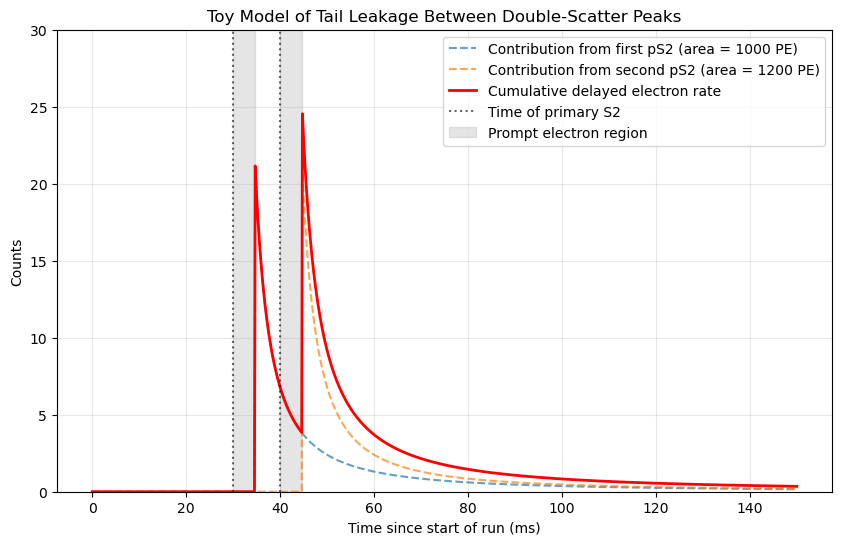

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Parameters for toy model
t = np.linspace(0, 150, 1000)  # ms
tmin = 4.6
n = 1.5
scale = 200  # scale factor to simulate counts instead of pdf

# Define Pareto-like distribution (power law tail)
dist = pareto(b=n-1, scale=tmin)

# Two S2 peaks: one early, one later (double scatter-like)
s2_times = [30, 40]

# Compute contributions from each S2
pdfs = []
for s2 in s2_times:
    shifted_t = t - s2
    pdf_vals = np.zeros_like(shifted_t)
    mask = shifted_t >= tmin
    pdf_vals[mask] = dist.pdf(shifted_t[mask]) * scale
    pdfs.append(pdf_vals)

# Total PDF (without fix)
total_pdf = sum(pdfs)

# Plot
plt.figure(figsize=(10, 6))

# Individual contributions
plt.plot(t, pdfs[0], "--", label="Contribution from first pS2 (area = 1000 PE)", alpha=0.7)
plt.plot(t, pdfs[1], "--", label="Contribution from second pS2 (area = 1200 PE)", alpha=0.7)

# Total
plt.plot(t, total_pdf, "r", label="Cumulative delayed electron rate", linewidth=2)

# Primary S2 markers (legend only once)
for i, s2 in enumerate(s2_times):
    if i == 0:
        plt.axvline(s2, color="k", linestyle=":", alpha=0.6, label="Time of primary S2")
    else:
        plt.axvline(s2, color="k", linestyle=":", alpha=0.6)

    # Shaded forbidden prompt region
    plt.axvspan(s2, s2+tmin, color="gray", alpha=0.2, label ="Prompt electron region" if i == 0 else None)

plt.xlabel("Time since start of run (ms)")
plt.ylabel("Counts")
plt.title("Toy Model of Tail Leakage Between Double-Scatter Peaks")
plt.ylim(0, 30)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


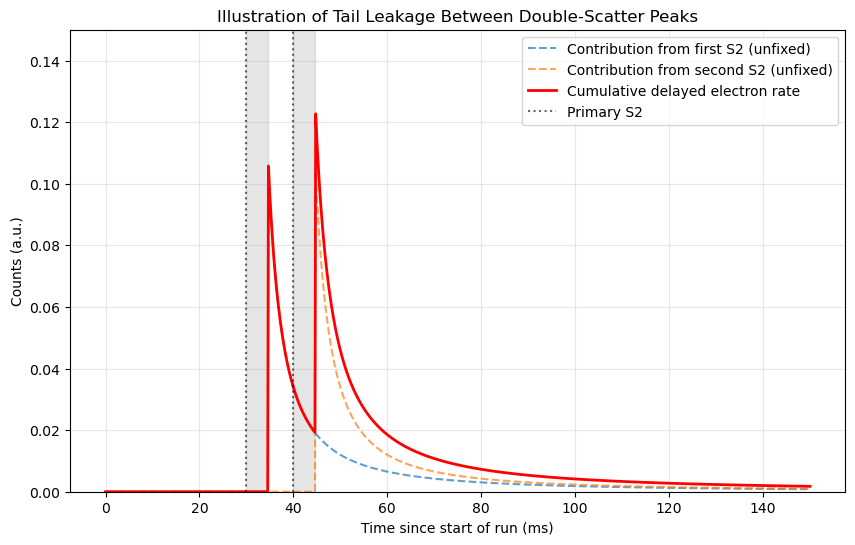

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Parameters for toy model
t = np.linspace(0, 150, 1000)  # ms
tmin = 4.6
n = 1.5

# Define Pareto-like distribution (power law tail)
dist = pareto(b=n-1, scale=tmin)

# Two S2 peaks: one early, one later (double scatter-like)
s2_times = [30, 40]

# Compute contributions from each S2
pdfs = []
for s2 in s2_times:
    shifted_t = t - s2
    pdf_vals = np.zeros_like(shifted_t)
    mask = shifted_t >= tmin
    pdf_vals[mask] = dist.pdf(shifted_t[mask])
    pdfs.append(pdf_vals)

# Total PDF (without fix)
total_pdf = sum(pdfs)

# Plot
plt.figure(figsize=(10, 6))

# Individual contributions
plt.plot(t, pdfs[0], "--", label="Contribution from first S2 (unfixed)", alpha=0.7)
plt.plot(t, pdfs[1], "--", label="Contribution from second S2 (unfixed)", alpha=0.7)

# Total
plt.plot(t, total_pdf, "r", label="Cumulative delayed electron rate", linewidth=2)

# Primary S2 markers (legend only once)
for i, s2 in enumerate(s2_times):
    if i == 0:
        plt.axvline(s2, color="k", linestyle=":", alpha=0.6, label="Primary S2")
    else:
        plt.axvline(s2, color="k", linestyle=":", alpha=0.6)

    # Shaded forbidden prompt region
    plt.axvspan(s2, s2+tmin, color="gray", alpha=0.2)

plt.xlabel("Time since start of run (ms)")
plt.ylabel("Counts (a.u.)")
plt.title("Illustration of Tail Leakage Between Double-Scatter Peaks")
plt.ylim(0, 0.15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


116


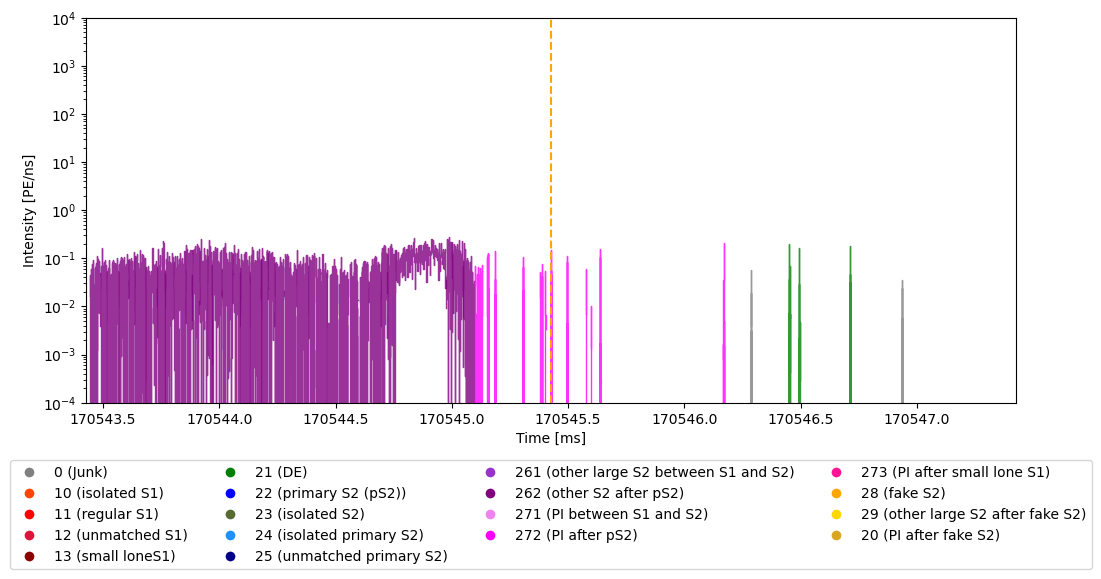

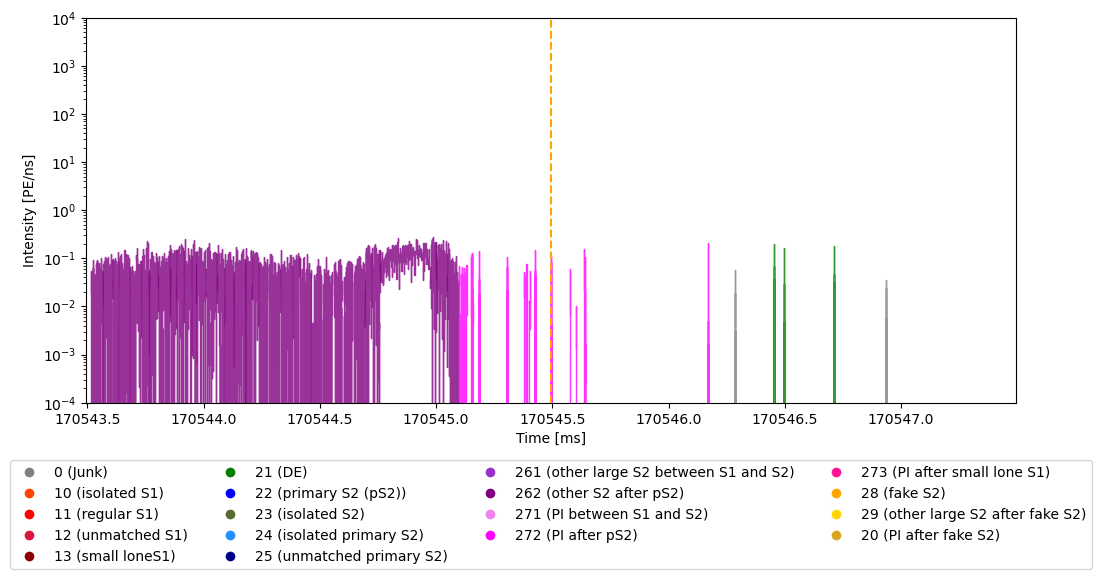

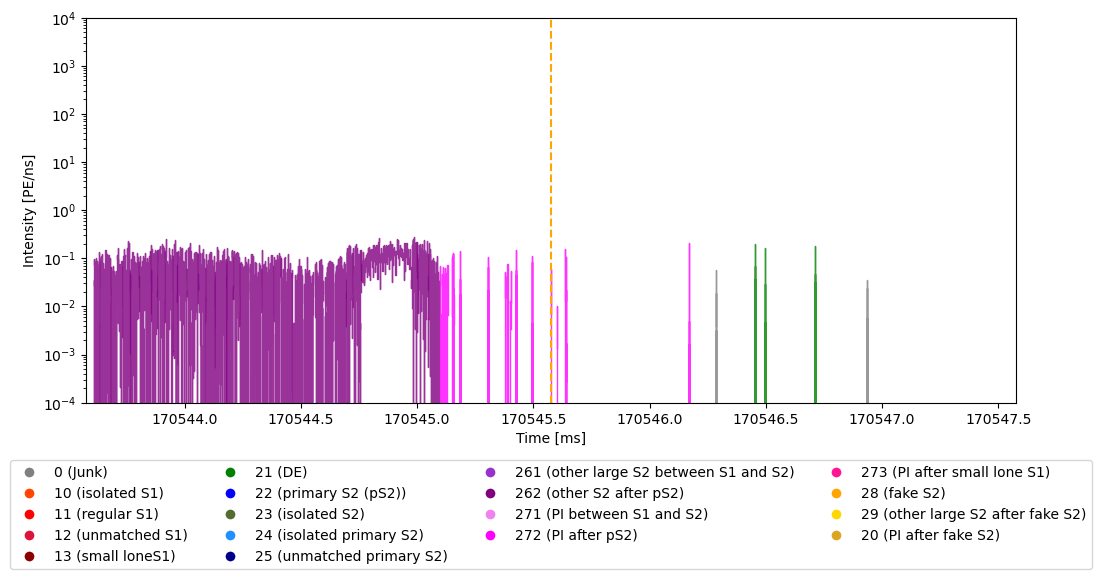

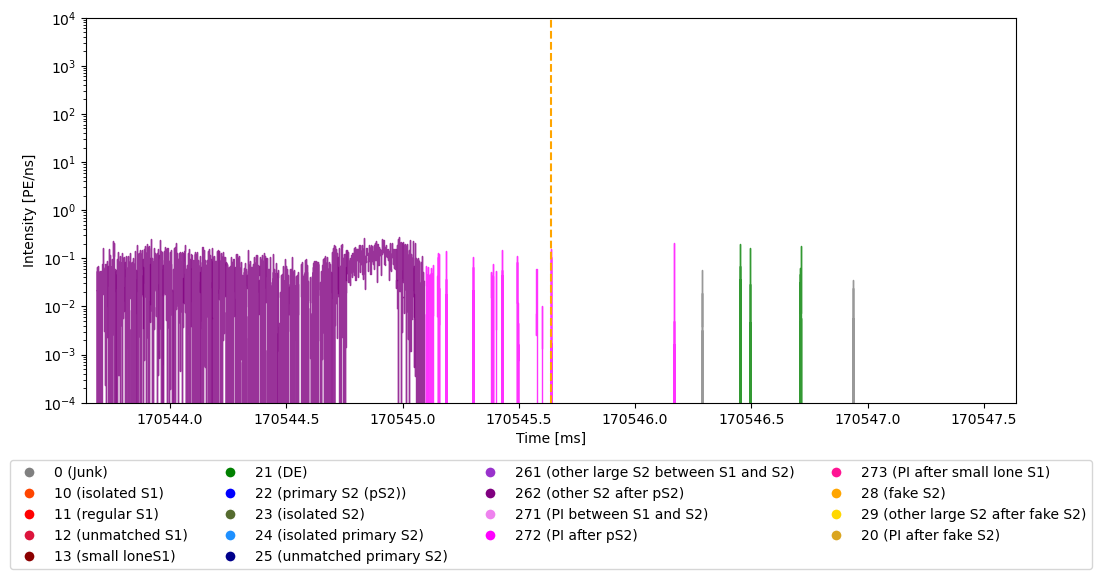

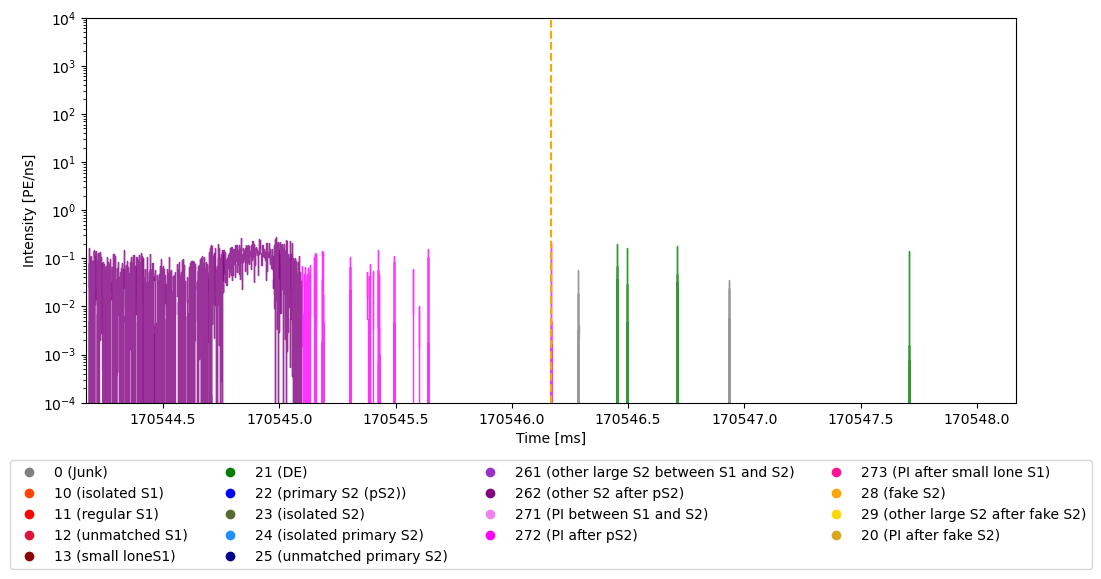

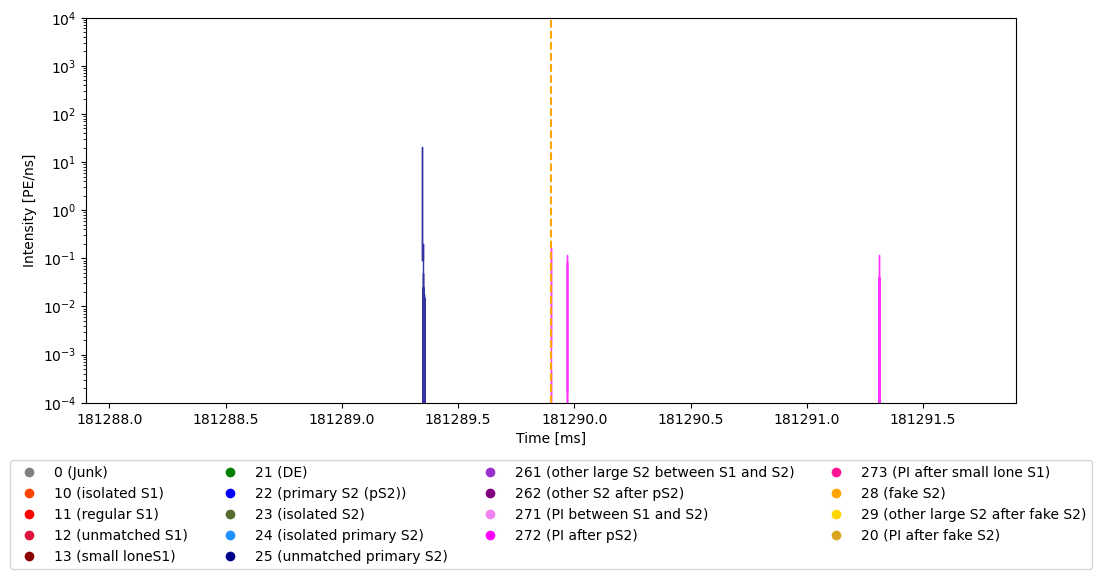

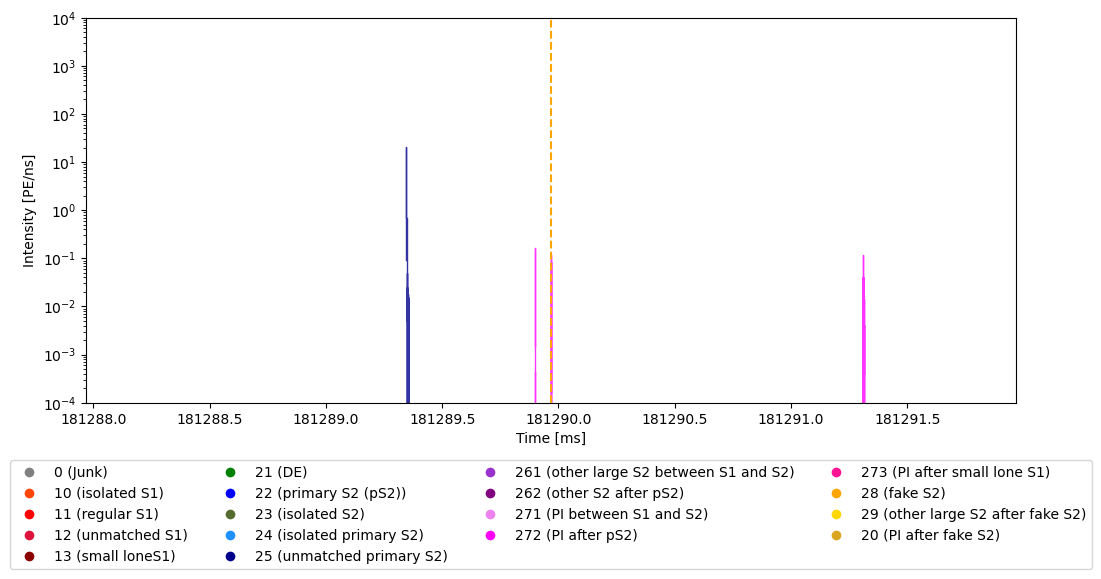

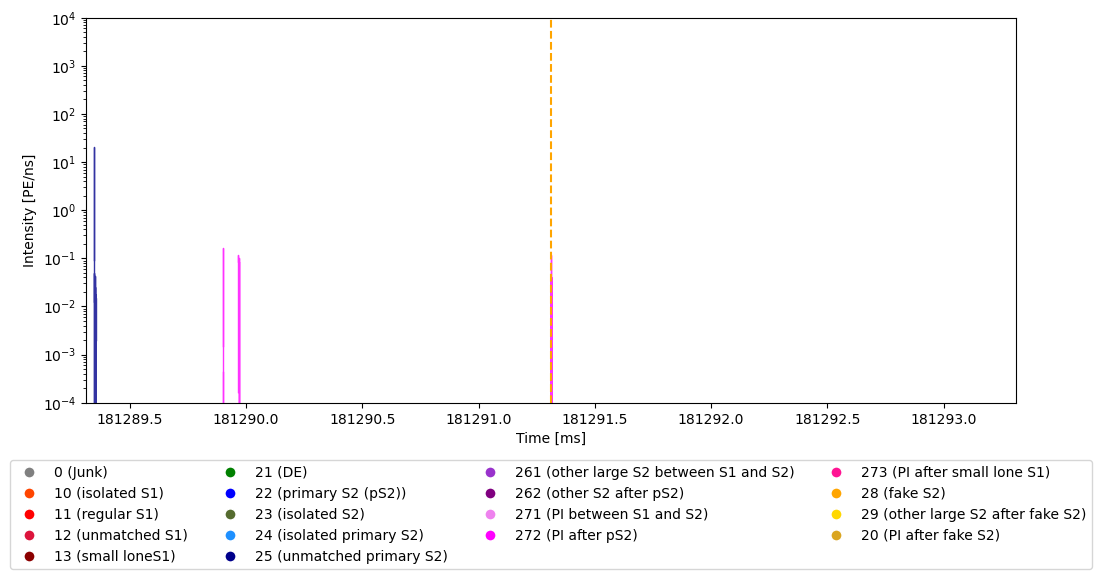

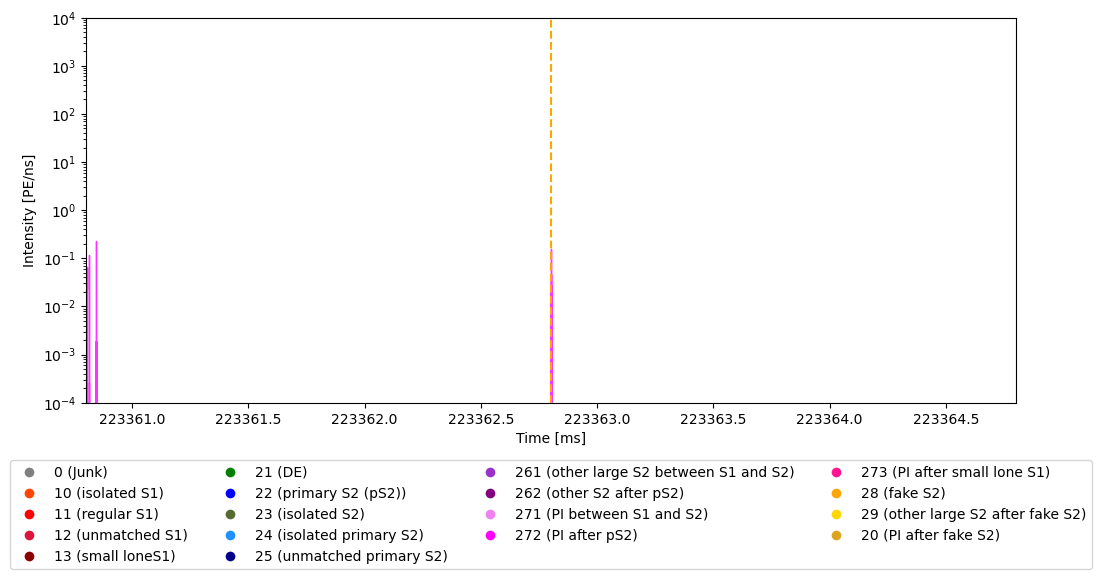

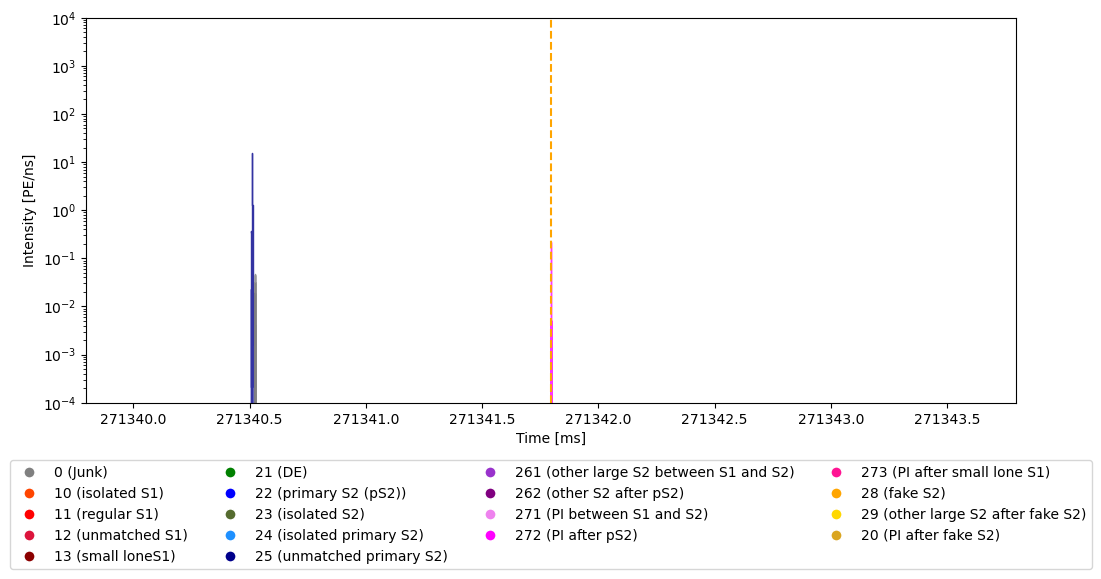

In [69]:
sfasd = ku_des_cut[np.isin(ku_des_cut['subtype'], [20, 23, 271, 272, 273])]

print(len(sfasd))

for i in range(10):
    fig, ax = plot_peaks(run_id, peaks, t_reference = sfasd['time'][i+10], vetos=DAQ_vetos, window_ms = 2, log=True)

120


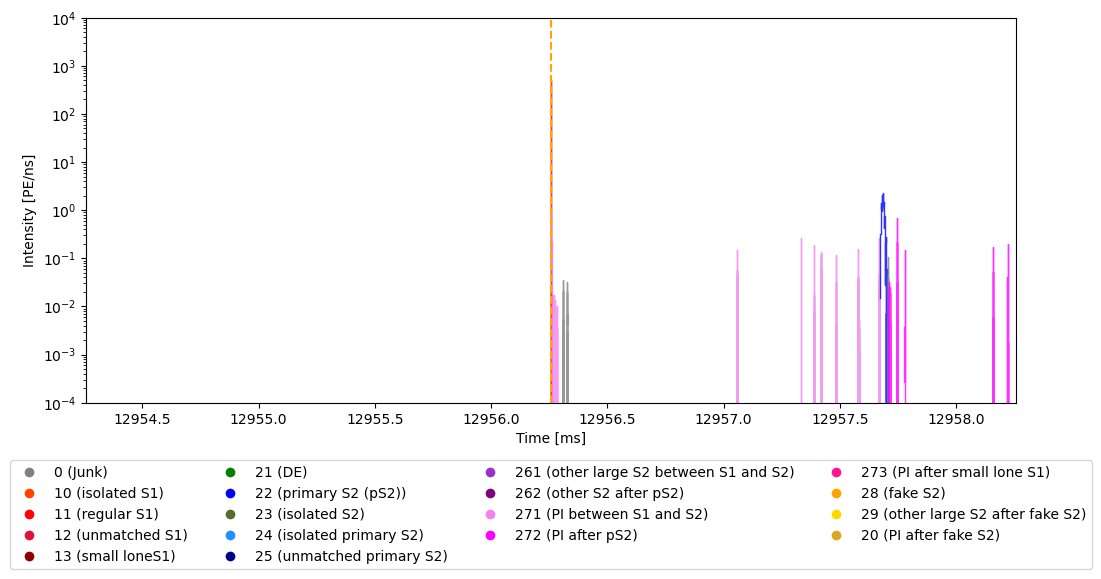

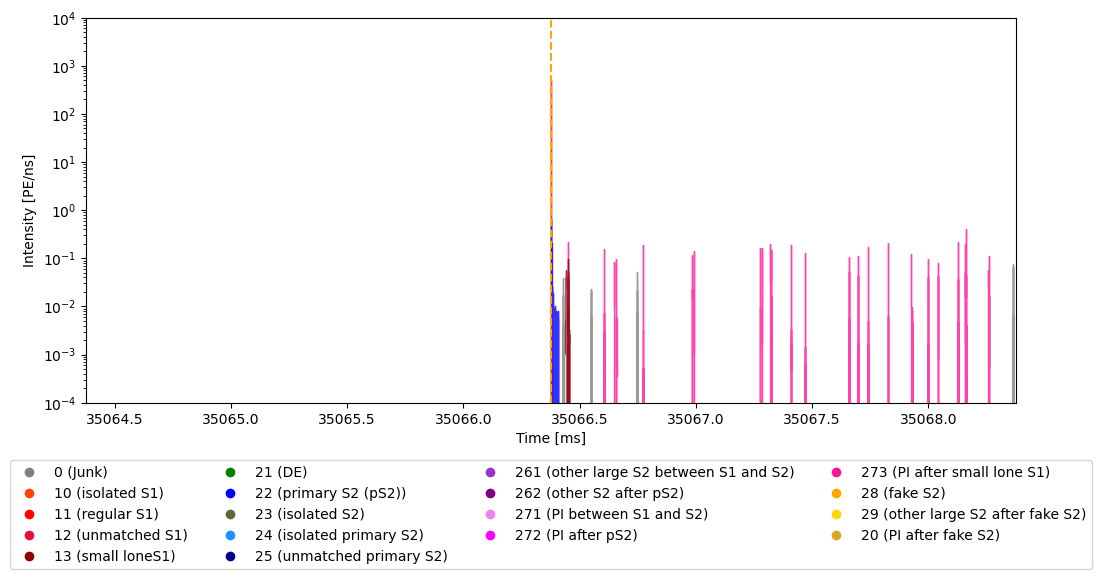

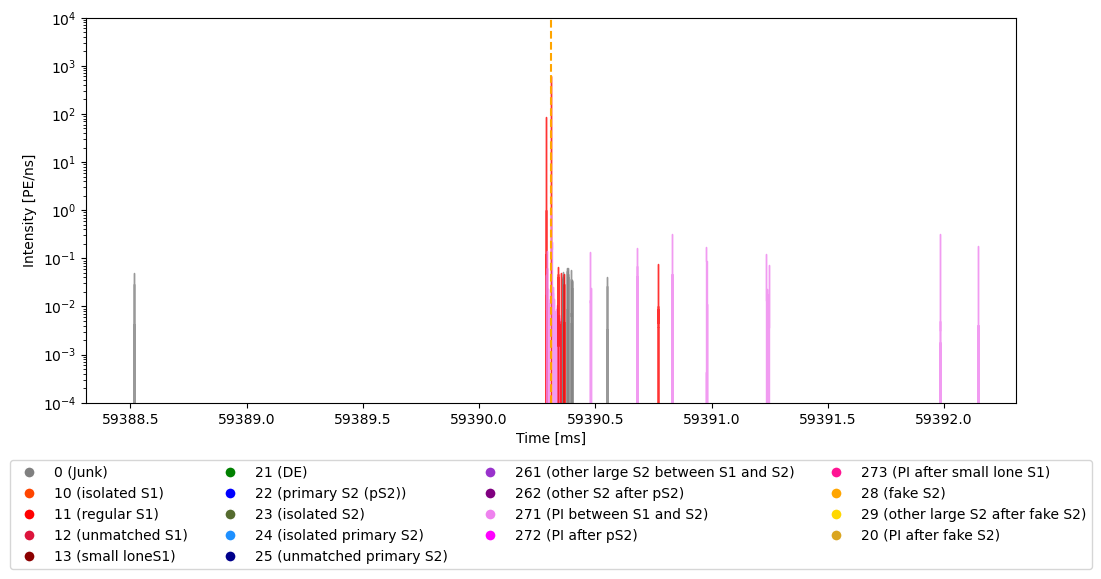

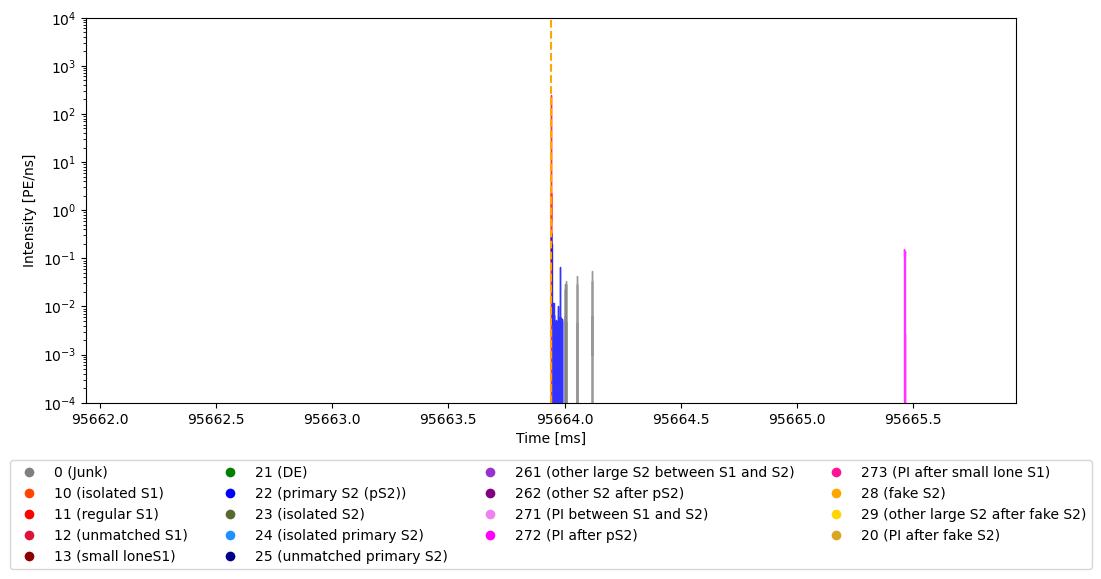

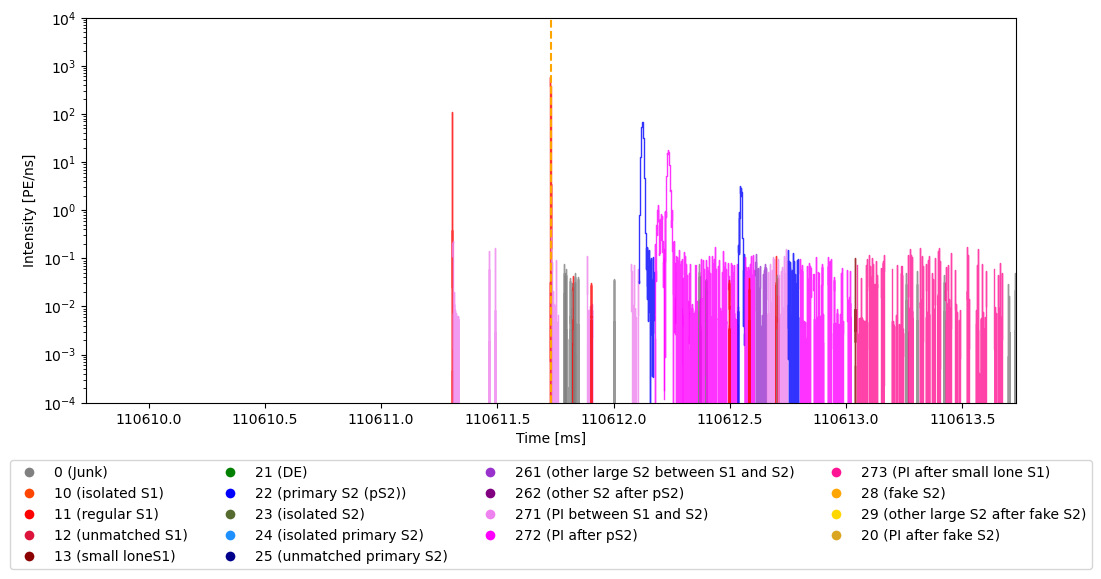

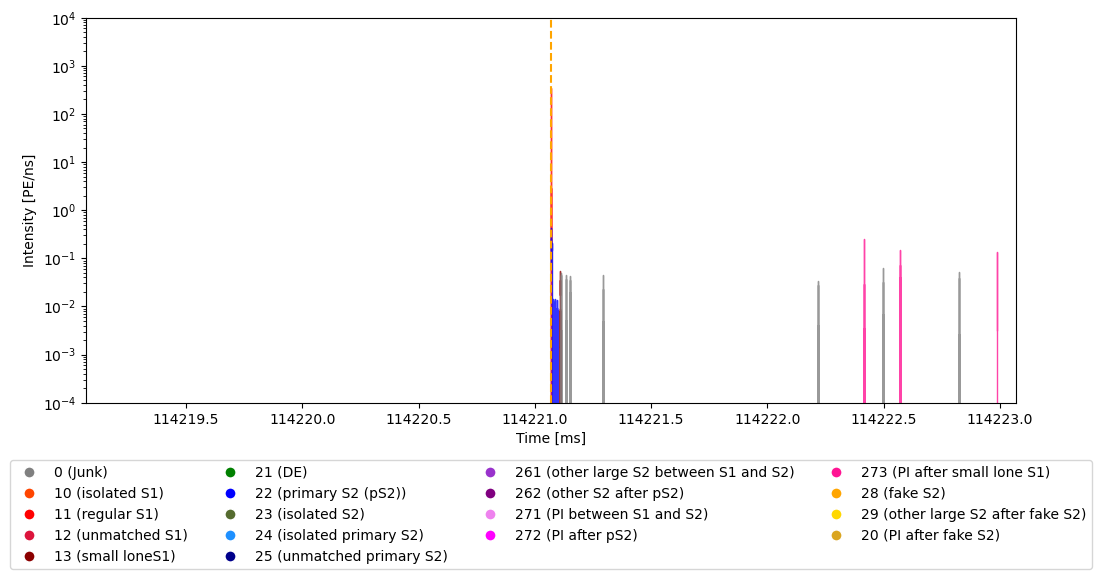

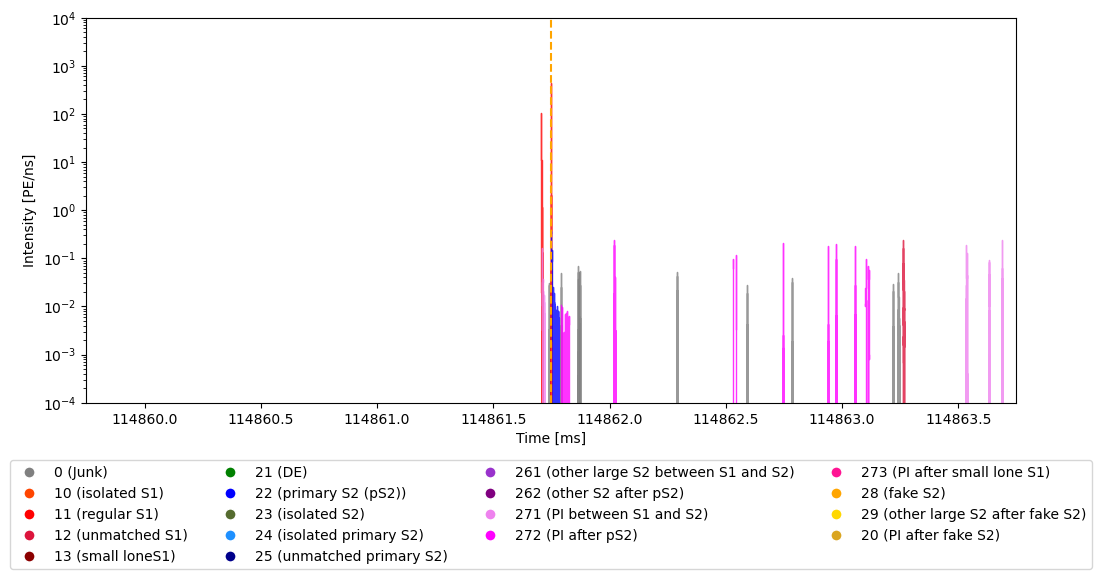

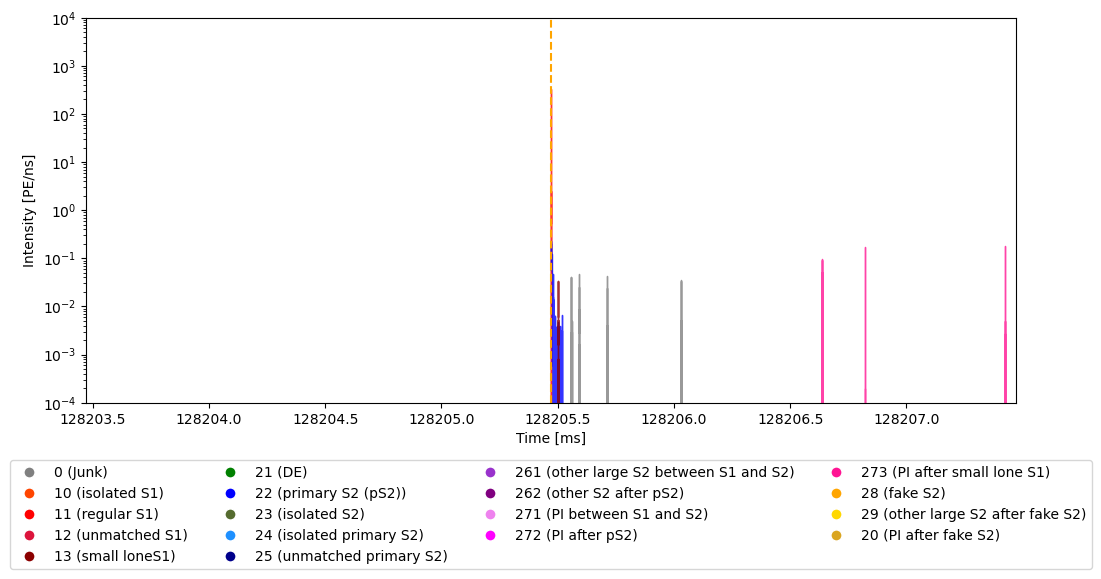

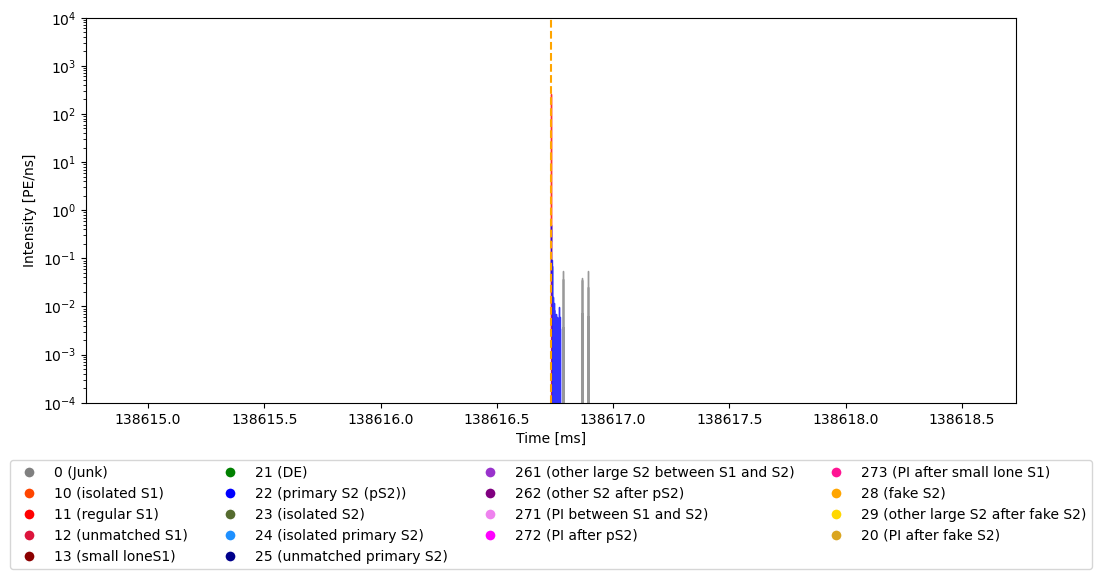

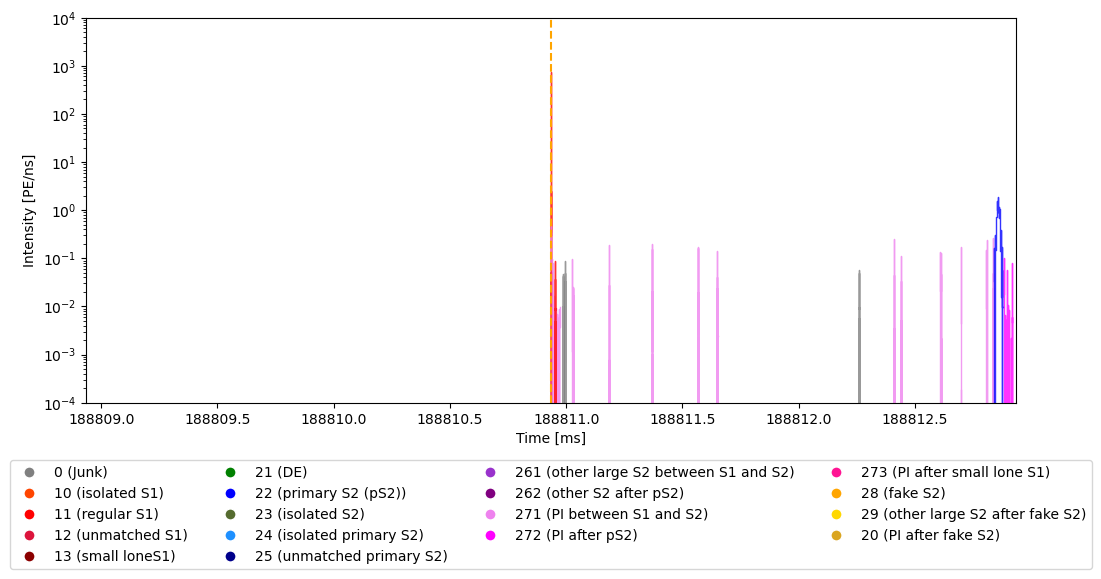

In [70]:
low = pS2s_original[pS2s_original['area_fraction_top'] < 0.5]
print(len(low))
# low_DEs = DEs_original_cut[DEs_original_cut['area_fraction_top'] < 0.5]

for i in range(10):
    fig, ax = plot_peaks(run_id, peaks, t_reference = low['time'][i], vetos=DAQ_vetos, window_ms = 2, log=True)

In [230]:
# Candidate arrays
low = pS2s[pS2s['area_fraction_top'] < 0.5]
low_times = low['time']

s1_times = S1s['time']
s1_areas = S1s['area']

# Find index of previous S1 for each low-AFT pS2
prev_s1_idx = np.searchsorted(s1_times, low_times) - 1

# Mask out those that have no previous S1 (idx < 0)
has_prev_s1 = prev_s1_idx >= 0
low_with_prev_s1 = low[has_prev_s1]
prev_s1_idx = prev_s1_idx[has_prev_s1]

# Get the areas of those previous S1s
prev_s1_areas = s1_areas[prev_s1_idx]

# Print results
for i, (p, a) in enumerate(zip(low_with_prev_s1, prev_s1_areas)):
    print(f"low-pS2 at {p['time']} ns (area={p['area']:.1f}) "
          f"was preceded by S1 with area {a:.1f}")


low-pS2 at 1636249669538376750 ns (area=750.9) was preceded by S1 with area 51527.1
low-pS2 at 1636249730135940870 ns (area=963.8) was preceded by S1 with area 25913.9
low-pS2 at 1636249748693069050 ns (area=708.4) was preceded by S1 with area 37458.1
low-pS2 at 1636249749333747610 ns (area=883.9) was preceded by S1 with area 48367.5
low-pS2 at 1636249762677470500 ns (area=569.1) was preceded by S1 with area 33726.0
low-pS2 at 1636249773088732060 ns (area=693.1) was preceded by S1 with area 27580.2
low-pS2 at 1636249836912466750 ns (area=725.8) was preceded by S1 with area 53597.6
low-pS2 at 1636249853664238550 ns (area=749.2) was preceded by S1 with area 53929.0
low-pS2 at 1636249911835401400 ns (area=544.4) was preceded by S1 with area 6409.6
low-pS2 at 1636249911965984160 ns (area=828.3) was preceded by S1 with area 51686.9
low-pS2 at 1636249956058989180 ns (area=795.4) was preceded by S1 with area 28760.2
low-pS2 at 1636249956981955490 ns (area=1463.4) was preceded by S1 with area 

<Axes: xlabel='Area [PE]', ylabel='Range 50% area [ns]'>

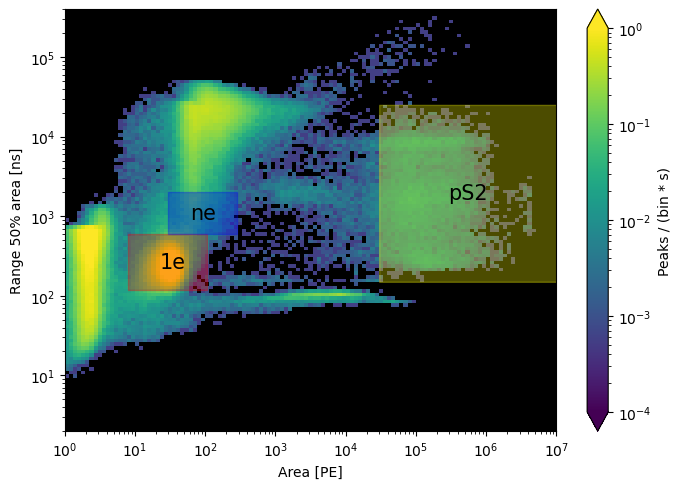

In [ ]:
#Box selections
# fig, ax = plot_area_width_histogram(DEs, run_duration)

def plot_selection(xrange, yrange, axes, col, label):
    """Draws the selection as a filled in box on any plot
    
    xrange = tuple of min and max x-axis values from plot from which data is selected
    yrange = tuple of min and max y-axis values from plot from which data is selected
    axes = plot on which selection is to be visualized
    col = color of the filled in box
    """
    low_x, high_x = xrange
    low_y, high_y = yrange
    x = np.arange(low_x, high_x, 50)
    y = np.full(len(x), low_y)
    y2 = np.full(len(x), high_y)
    axes.fill_between(x, y, y2, alpha = 0.3, color = col)

    mid_x = np.sqrt(low_x * high_x)
    mid_y = np.sqrt(low_y * high_y)

    axes.text(mid_x, mid_y, label, ha = 'center', 
              va = 'center', fontsize = 15, color = 'black')
    return axes

fig, ax = plot_area_width_histogram(peaks, run_duration)

plt.gca()

plot_selection((3e4, 1e7), (1.5e2, 2.5e4), ax, "yellow", label = "pS2")
plot_selection((8e0, 1.5e2), (1.2e2, 6e2), ax, "red", label = "1e")
plot_selection((3e1, 3e2), (6e2, 2e3), ax, "blue", label = "ne")

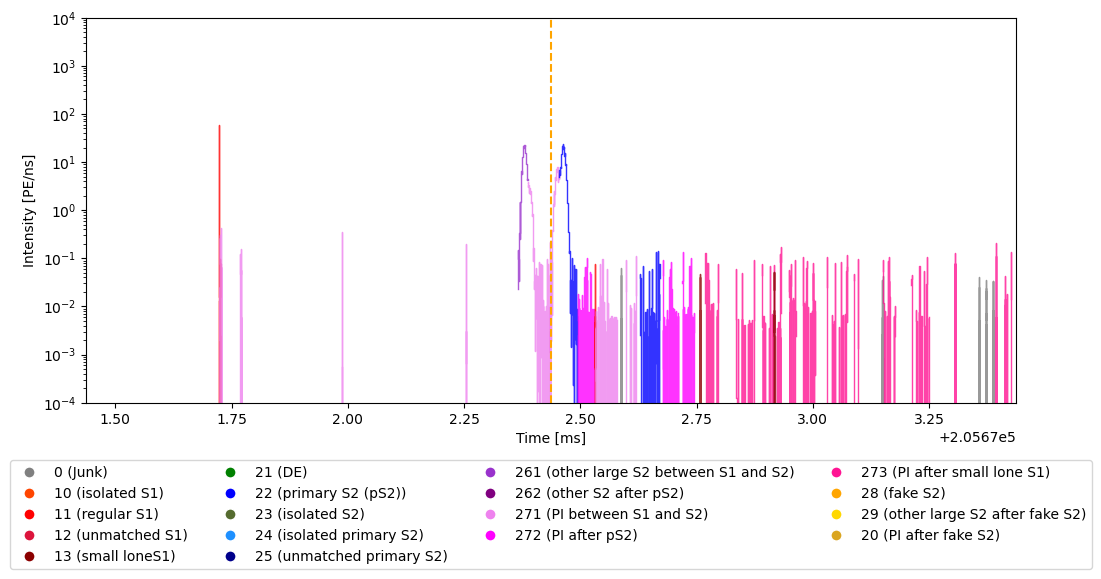

In [ ]:
nul = peaks[(peaks['n_electron_rec'] == 0) & (peaks['area'] > 50000)]
fig, ax = plot_peaks(run_id, peaks, t_reference = nul['time'][9], vetos=DAQ_vetos, window_ms = 1, log=True)


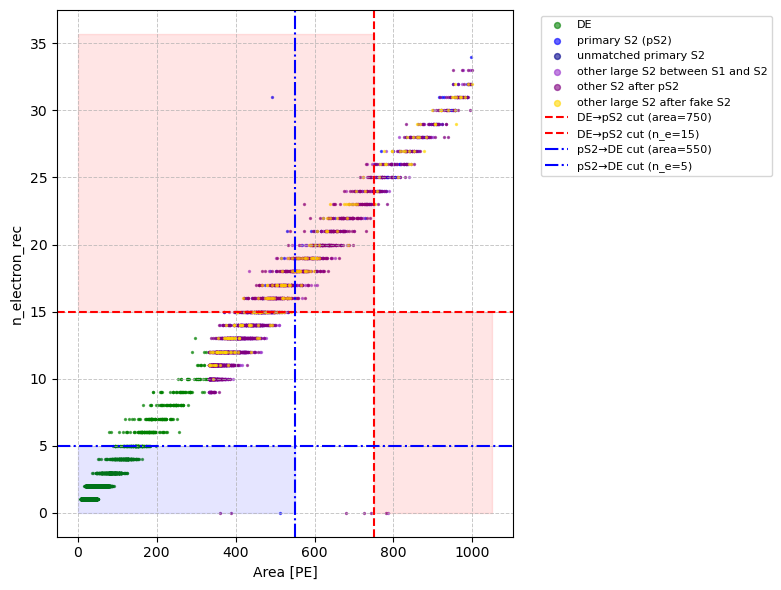

In [59]:
pS2s_select = pS2s_new[pS2s_new['area'] < 1e3]
des_and_ps2s = np.concatenate((pS2s_select, DEs_new))

# des_and_ps2s = np.concatenate((pS2s_original[pS2s_original['area'] < 1e3], DEs_original))

# des_and_ps2s = peaks[(peaks['area'] < 1e3) & (peaks['type'] == 2)]
fig, ax = plt.subplots(figsize=(8,6))

# Scatter
for subtype, colour in subtype_colours.items():
    mask = des_and_ps2s['subtype'] == subtype
    if not np.any(mask):
        continue
    ax.scatter(des_and_ps2s['area'][mask],
               des_and_ps2s['n_electron_rec'][mask],
               s=2, alpha=0.6, label=subtype_names.get(subtype, f"Subtype {subtype}"),
               color=colour)

# Cuts for DE->pS2
ax.axvline(750, color='red', linestyle='--', label='DE→pS2 cut (area=750)')
ax.axhline(15, color='red', linestyle='--', label='DE→pS2 cut (n_e=15)')

# Cuts for pS2->DE
ax.axvline(550, color='blue', linestyle='-.', label='pS2→DE cut (area=550)')
ax.axhline(5, color='blue', linestyle='-.', label='pS2→DE cut (n_e=5)')

# (Optional) shade the swapped region
ax.fill_between([0, 550], 0, 5, color='blue', alpha=0.1)
ax.fill_betweenx([0, 15], 750, ax.get_xlim()[1], color='red', alpha=0.1)
ax.fill_between([0, 750], 15, ax.get_ylim()[1], color='red', alpha=0.1)

ax.set_xlabel('Area [PE]')
ax.set_ylabel('n_electron_rec')
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# # --- Define regions (x_cut, y_cut) ---
# cuts = [
#     (550, 5, 'red'),   # first region
#     (750, 15, 'blue'),  # second region
# ]

# # Draw L-shaped lines
# for x_cut, y_cut, col in cuts:
#     # vertical part: from y=0 up to y_cut
#     ax.plot([x_cut, x_cut], [0, y_cut], color=col, linestyle='--')
#     # horizontal part: from x=0 up to x_cut
#     ax.plot([0, x_cut], [y_cut, y_cut], color=col, linestyle='--')
#     # optional: mark corner point
#     ax.plot(x_cut, y_cut, 'o', color=col)

ax.legend(markerscale=3, fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


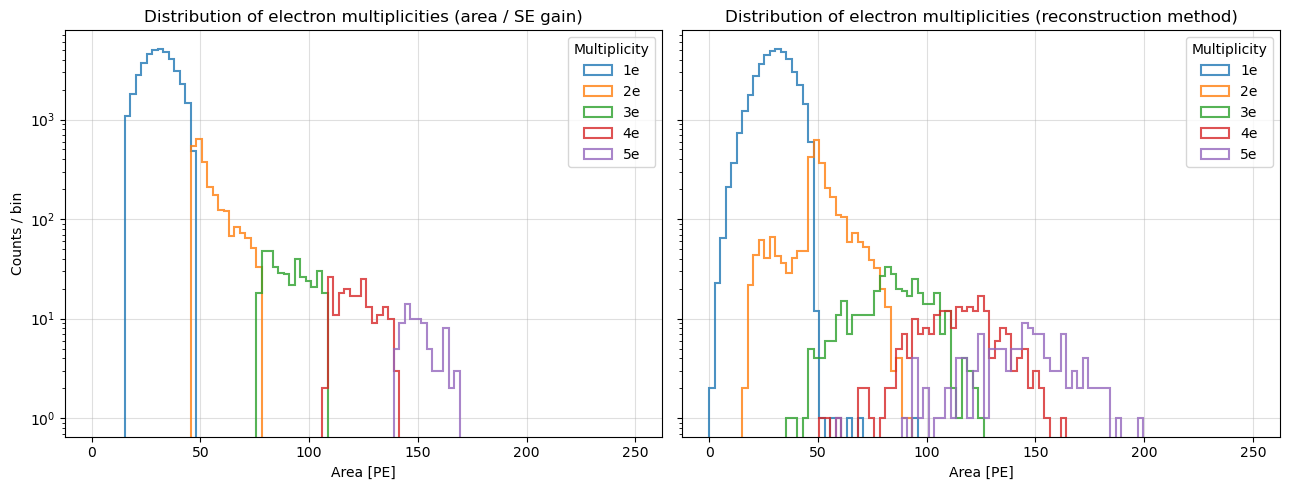

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

SE_GAIN = 31  # PE per electron
bins = np.linspace(0, 250, 100)

fig, axs = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

ax = axs[0]
area_per_gain = DEs_new['area'] / SE_GAIN

for n in range(1, 6):
    mask = (np.round(area_per_gain) == n)
    if np.sum(mask) == 0:
        continue
    ax.hist(
        DEs_new['area'][mask],
        bins=bins,
        histtype='step',
        linewidth=1.5,
        label=f'{n}e',
        alpha=0.8,
        density=False
    )

ax.set_xlabel("Area [PE]")
ax.set_yscale("log")
ax.set_ylabel("Counts / bin")
ax.set_title("Distribution of electron multiplicities (area / SE gain)")
ax.grid(alpha=0.4)
ax.legend(title="Multiplicity")

ax = axs[1]
for n in range(1, 6):
    mask = (DEs_new['n_electron_rec'] == n)
    if np.sum(mask) == 0:
        continue
    ax.hist(
        DEs_new['area'][mask],
        bins=bins,
        histtype='step',
        linewidth=1.5,
        label=f'{n}e',
        alpha=0.8,
        density=False
    )

ax.set_xlabel("Area [PE]")
ax.set_yscale("log")
ax.set_title("Distribution of electron multiplicities (reconstruction method)")
ax.grid(alpha=0.4)
ax.legend(title="Multiplicity")


plt.tight_layout()
plt.show()


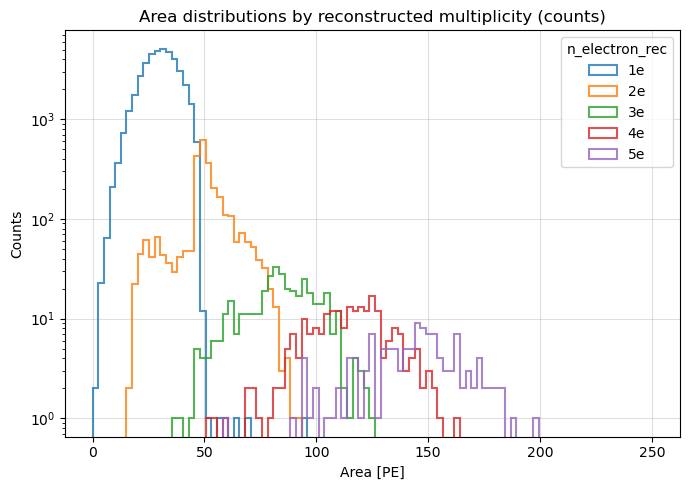

In [372]:
fig, ax = plt.subplots(figsize=(7,5))
bins = np.linspace(0, 250, 100)

for n in range(1, 6):
    mask = (DEs_new['n_electron_rec'] == n)
    if np.sum(mask) == 0:
        continue
    ax.hist(
        DEs_new['area'][mask],
        bins=bins, histtype='step', linewidth=1.5,
        label=f'{n}e', alpha=0.8, density=False
    )

ax.set_xlabel("Area [PE]")
ax.set_ylabel("Counts")
ax.set_yscale('log')
ax.set_title("Area distributions by reconstructed multiplicity (counts)")
ax.legend(title="n_electron_rec")
ax.grid(alpha=0.4)
plt.tight_layout()
plt.show()


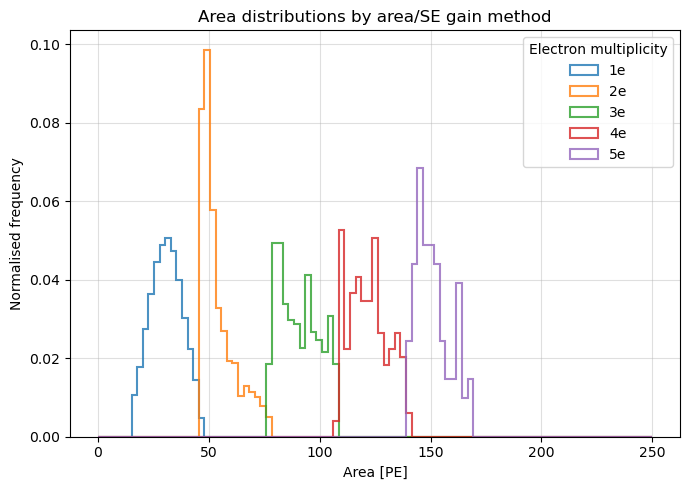

In [368]:
se_gain = 31  # PE per electron (for SR0)

fig, ax = plt.subplots(figsize=(7,5))
bins = np.linspace(0, 250, 100)

# Define integer multiplicities 1–5 electrons (rounded)
n_electron_area = np.round(DEs_new['area'] / se_gain)

for n in range(1, 6):
    mask = (n_electron_area == n)
    if np.sum(mask) == 0:
        continue
    ax.hist(
        DEs_new['area'][mask],
        bins=bins, histtype='step', linewidth=1.5,
        label=f'{n}e', density=True, alpha=0.8
    )

ax.set_xlabel("Area [PE]")
ax.set_ylabel("Normalised frequency")
ax.set_title("Area distributions by area/SE gain method")
ax.legend(title="Electron multiplicity")
ax.grid(alpha=0.4)

plt.tight_layout()
plt.show()


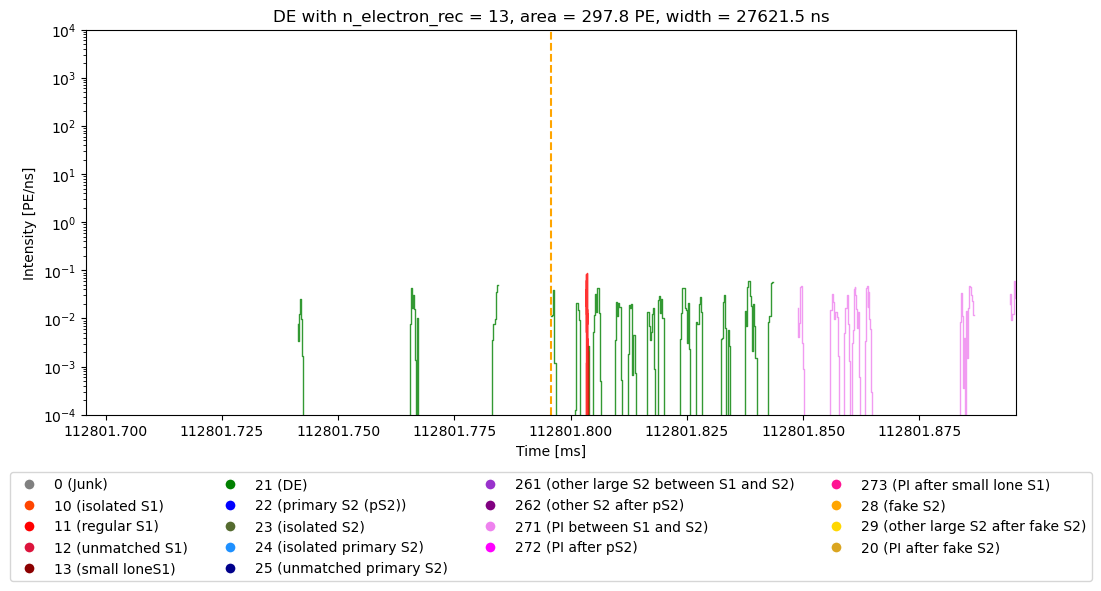

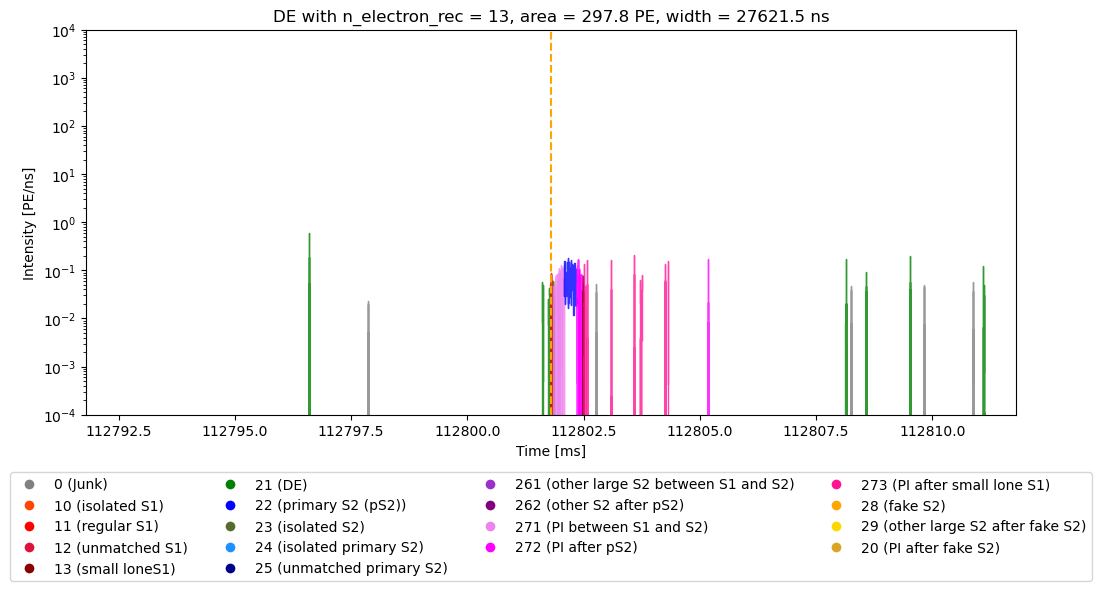


------------------------------------------------------------------------------------------------------------------------



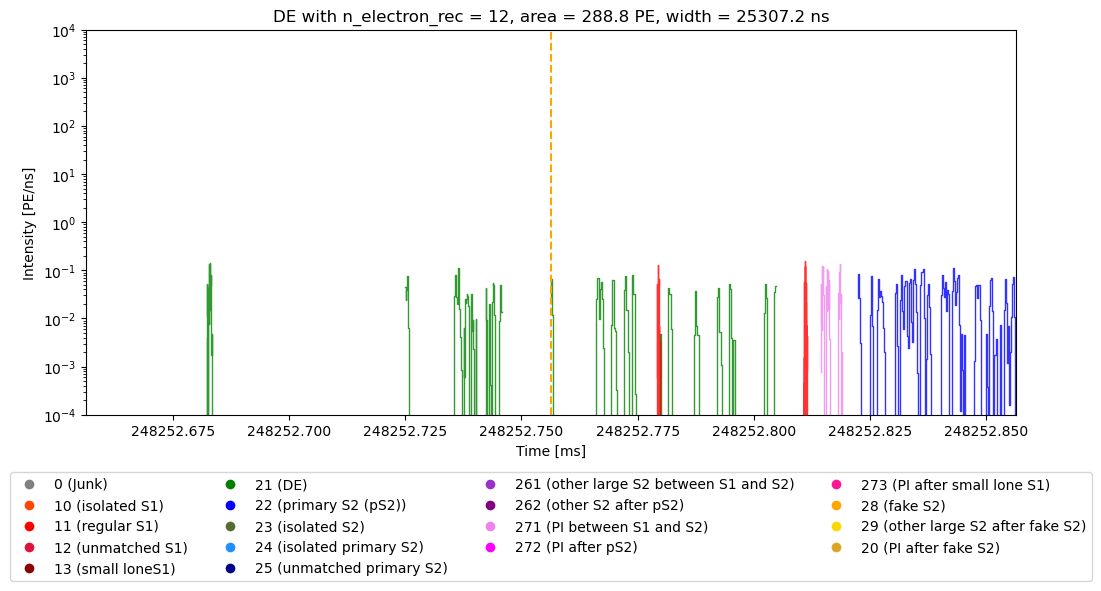

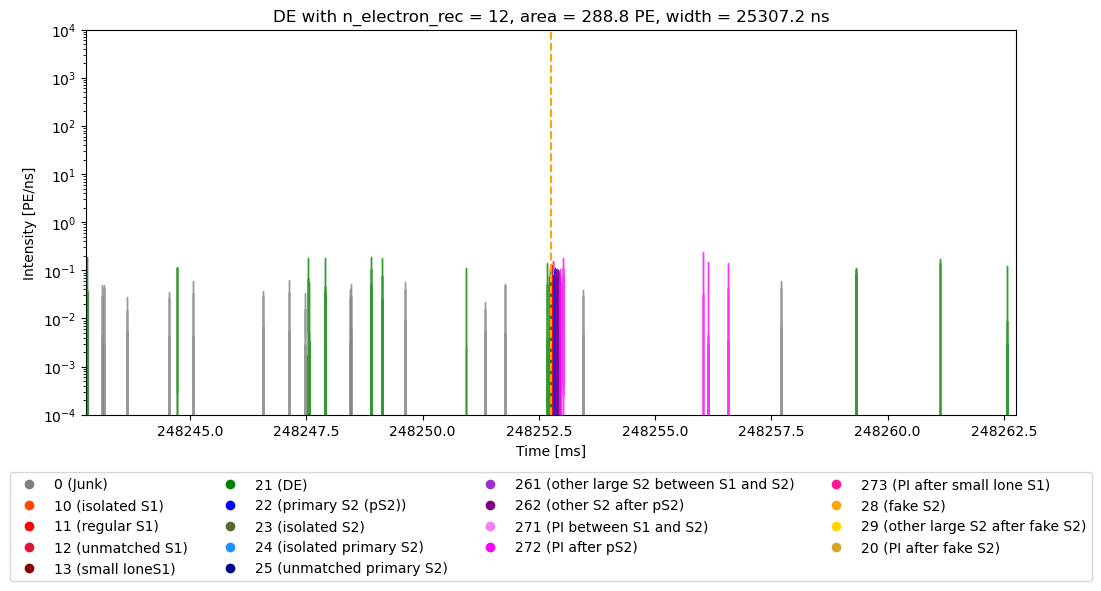


------------------------------------------------------------------------------------------------------------------------



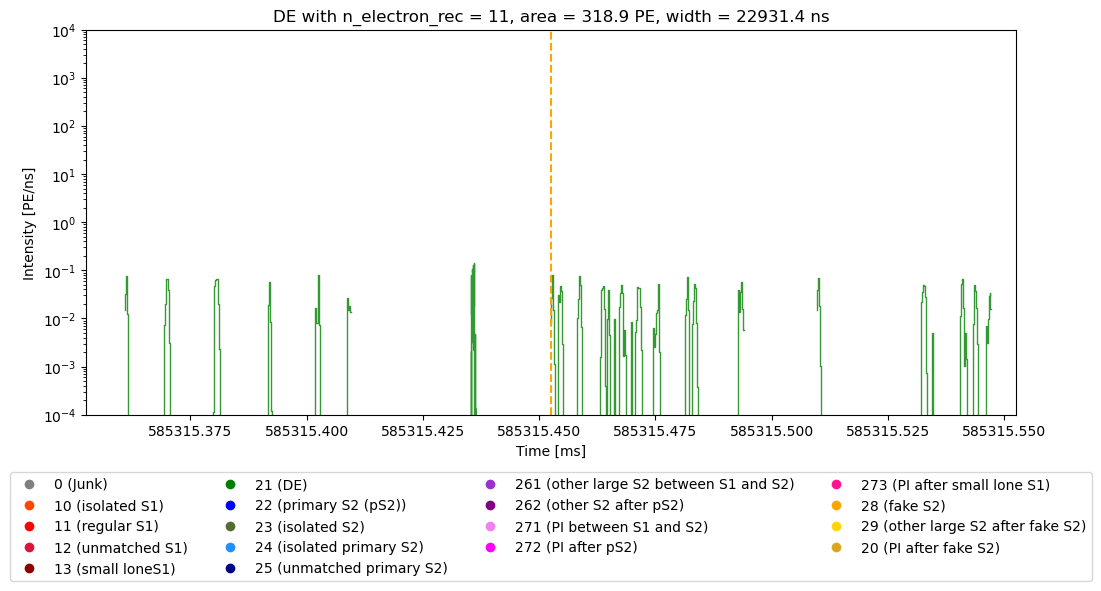

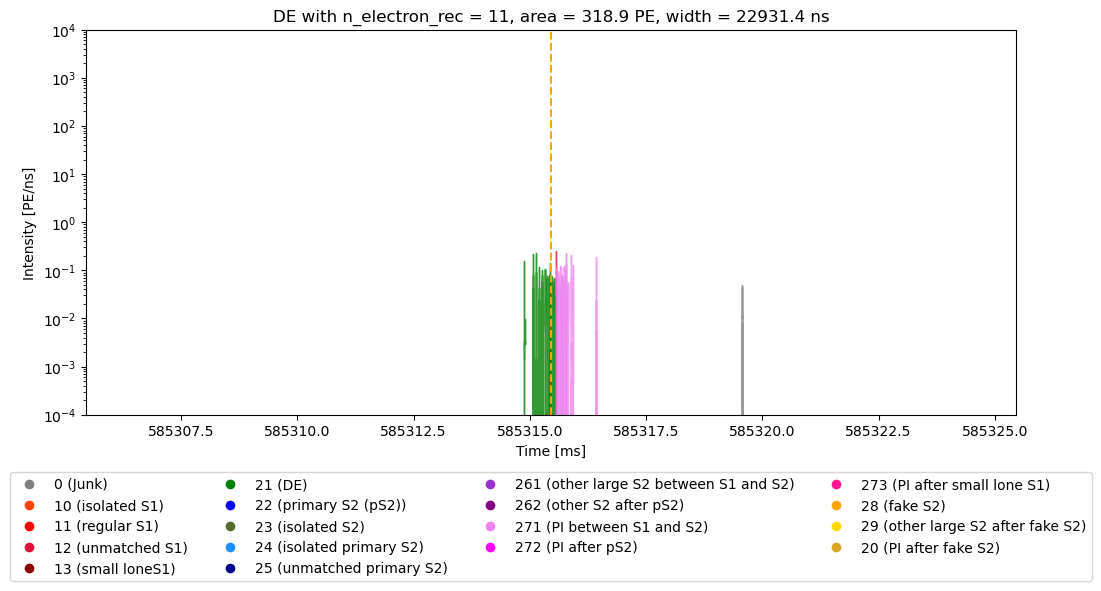


------------------------------------------------------------------------------------------------------------------------



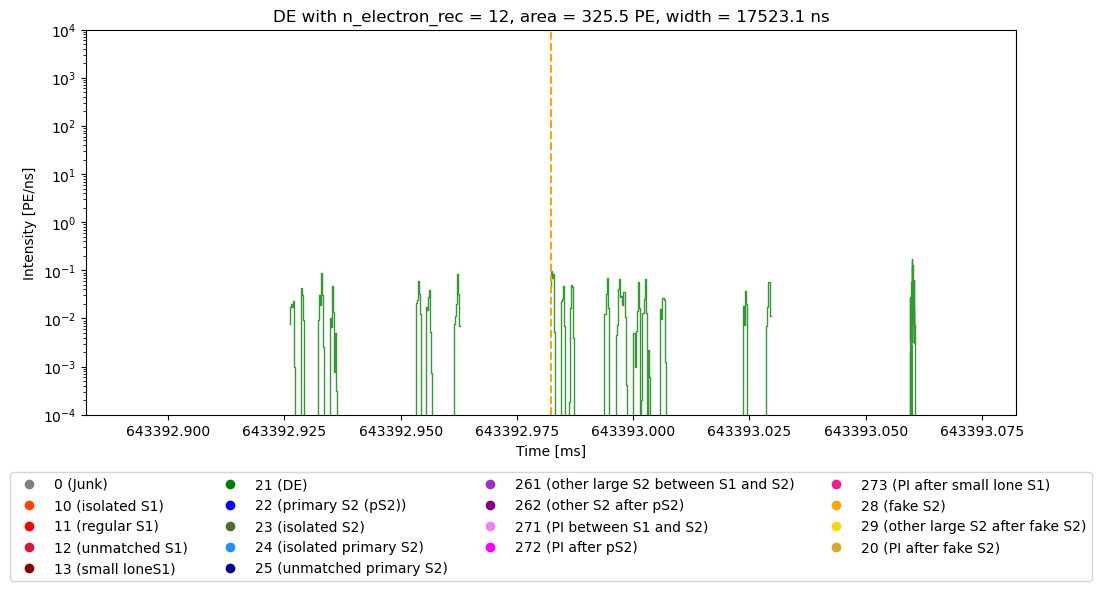

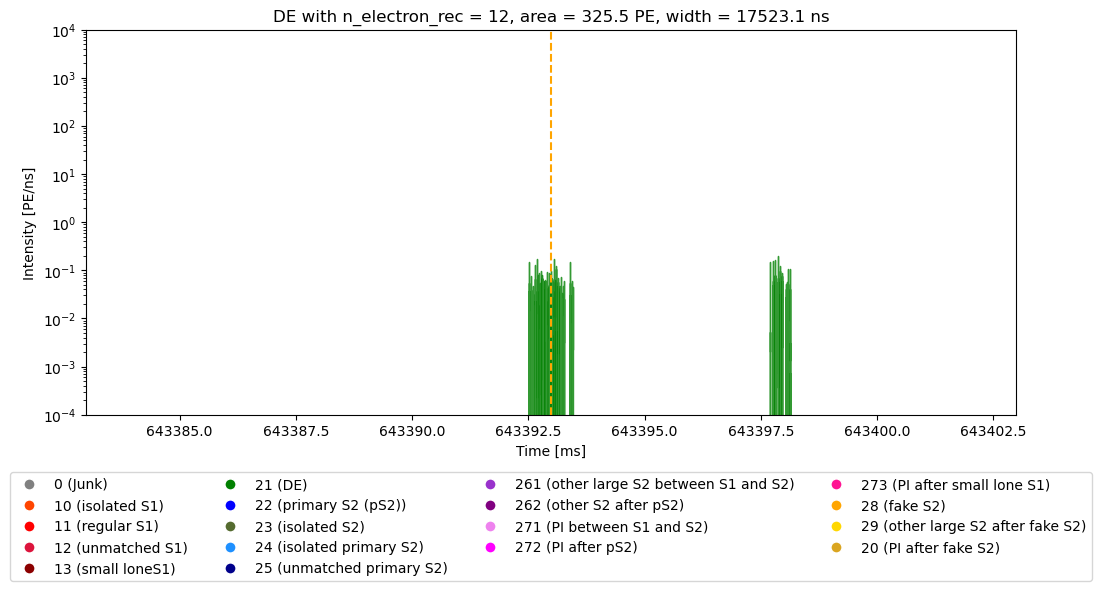


------------------------------------------------------------------------------------------------------------------------



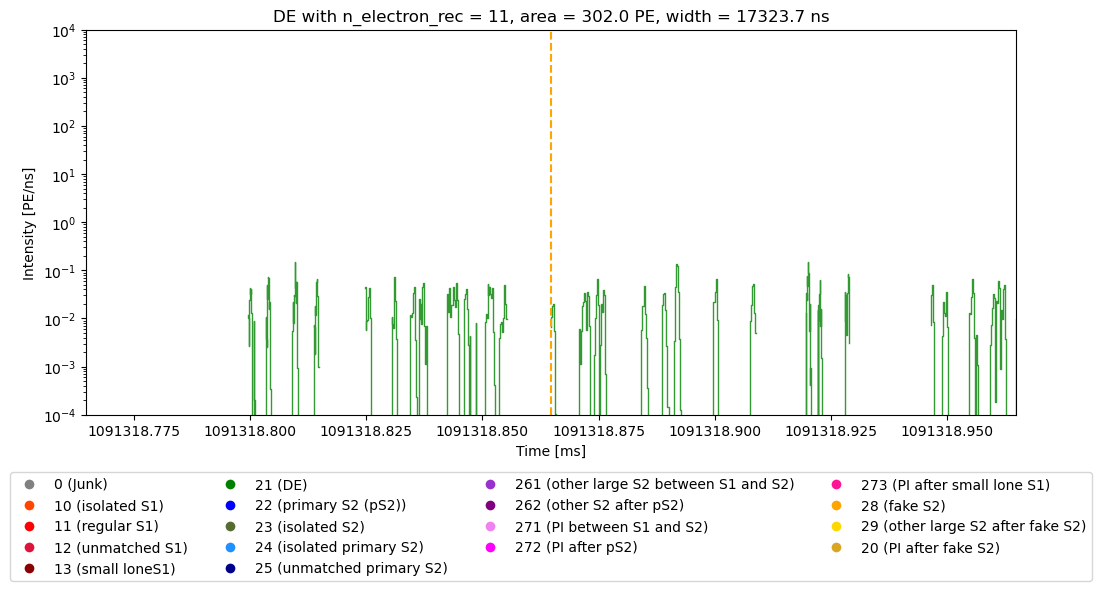

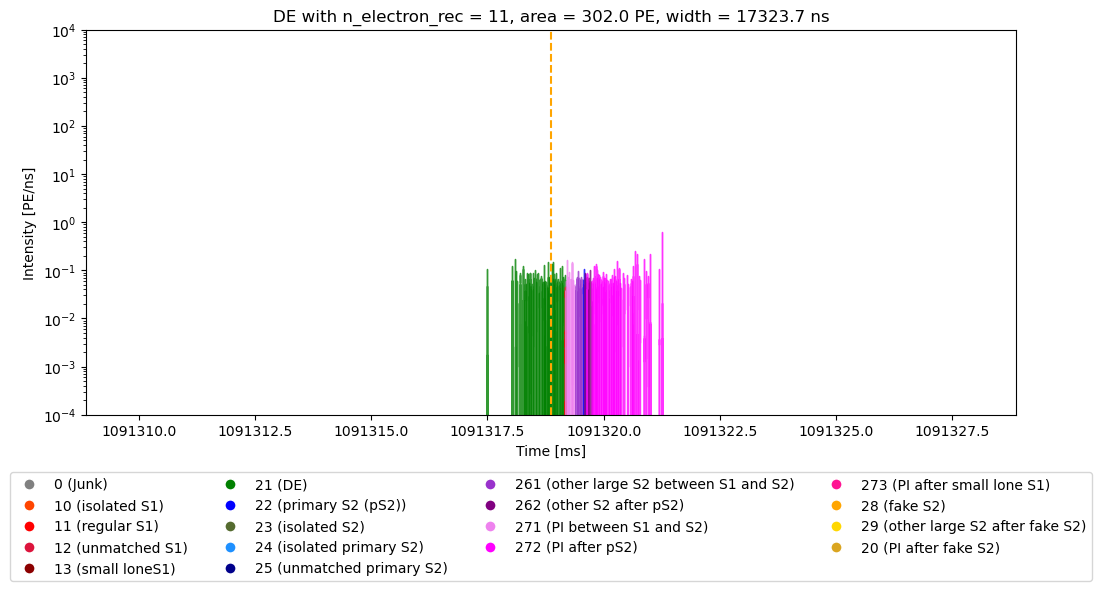


------------------------------------------------------------------------------------------------------------------------



In [84]:
high_DEs = DEs_new[DEs_new['n_electron_rec'] > 10]

len(high_DEs)

for i in range(5):
    fig, ax = plot_peaks(run_id, peaks, t_reference=high_DEs['time'][i],
                         vetos=DAQ_vetos, window_ms=0.1, log=True)
    ax.set_title(f"DE with n_electron_rec = {high_DEs['n_electron_rec'][i]}, "
                 f"area = {high_DEs['area'][i]:.1f} PE, "
                 f"width = {high_DEs['range_50p_area'][i]:.1f} ns")
    plt.show()

    fig1, ax1 = plot_peaks(run_id, peaks, t_reference=high_DEs['time'][i],
                           vetos=DAQ_vetos, window_ms=10, log=True)
    ax1.set_title(f"DE with n_electron_rec = {high_DEs['n_electron_rec'][i]}, "
                  f"area = {high_DEs['area'][i]:.1f} PE, "
                  f"width = {high_DEs['range_50p_area'][i]:.1f} ns")
    plt.show()

    # separator
    print('\n' + '-' * 120 + '\n')


Text(0, 0.5, 'Range 50% area [ns]')

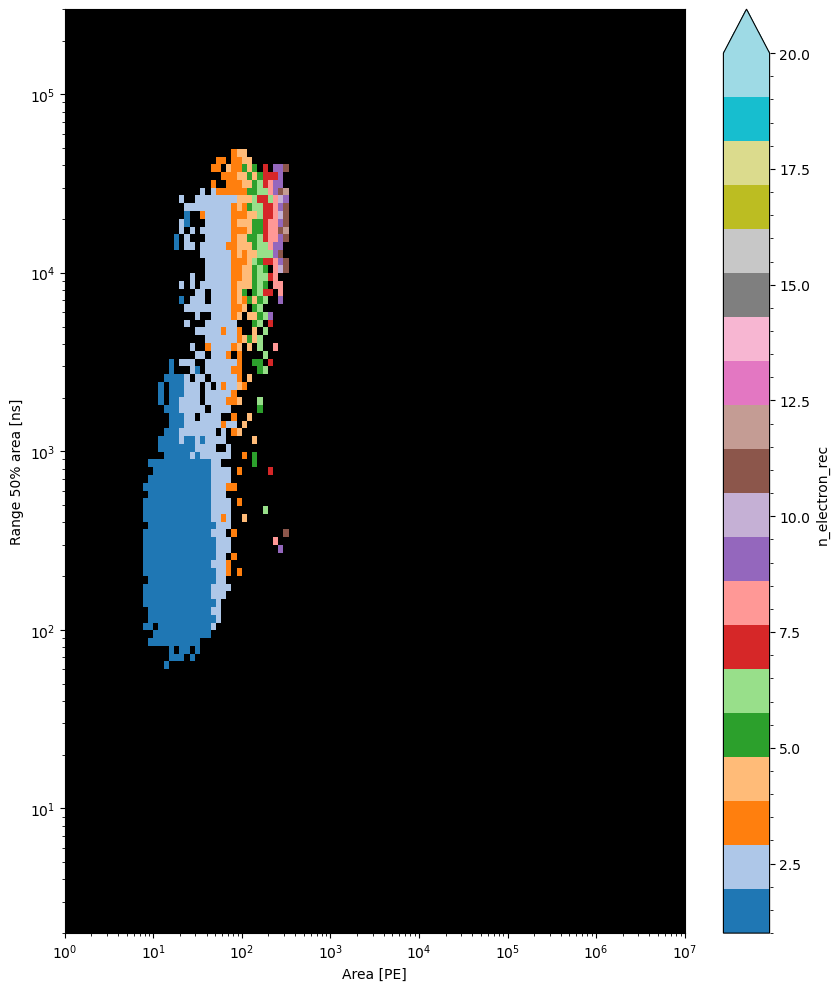

In [63]:
area_bins = np.logspace(0, 7, 120)
width_bins = np.geomspace(2, 3e5, 120) 

# colour_range = (1, des_and_ps2s['n_electron_rec'].max())
colour_range = (1, 20)
mh = Histdd(DEs_new, dimensions = (("area", area_bins), 
                                 ("range_50p_area", width_bins), 
                                 ("n_electron_rec", np.arange(colour_range[0], colour_range[1], 1))))

fig, ax = plt.subplots(figsize = (10, 12))

mh.average(axis = 2).plot(vmin = colour_range[0],
                            vmax = colour_range[1],
                            cmap = 'tab20',
                            colorbar_kwargs = dict(extend = "max"),
                            cblabel = "n_electron_rec")

ax.set_facecolor("k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Area [PE]")
ax.set_ylabel("Range 50% area [ns]")



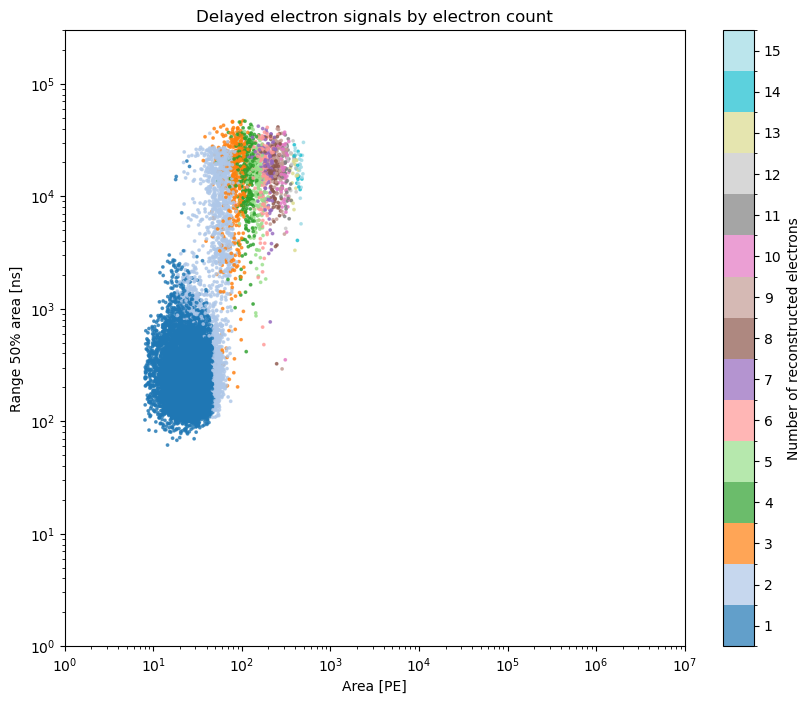

In [316]:
import matplotlib.colors as mcolors

# Select only values 1–15
mask = (DEs_final['n_electron_rec'] >= 1) & (DEs_final['n_electron_rec'] <= 15)
subset = DEs_final[mask]

fig, ax = plt.subplots(figsize=(10, 8))

# Define a ListedColormap with exactly 15 colours
cmap = plt.get_cmap("tab20", 15)   # or "tab15" if you have a custom one
norm = mcolors.BoundaryNorm(boundaries=np.arange(0.5, 15.5+1), ncolors=15)

sc = ax.scatter(subset['area'], subset['range_50p_area'],
                c=subset['n_electron_rec'],
                cmap=cmap, norm=norm,
                s=3, alpha=0.7)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Area [PE]")
ax.set_ylabel("Range 50% area [ns]")
ax.set_xlim(1, 1e7)
ax.set_ylim(1, 3e5)
ax.set_title("Delayed electron signals by electron count")

cbar = plt.colorbar(sc, ax=ax, ticks=np.arange(1, 16))
cbar.set_label("Number of reconstructed electrons")

plt.show()


13


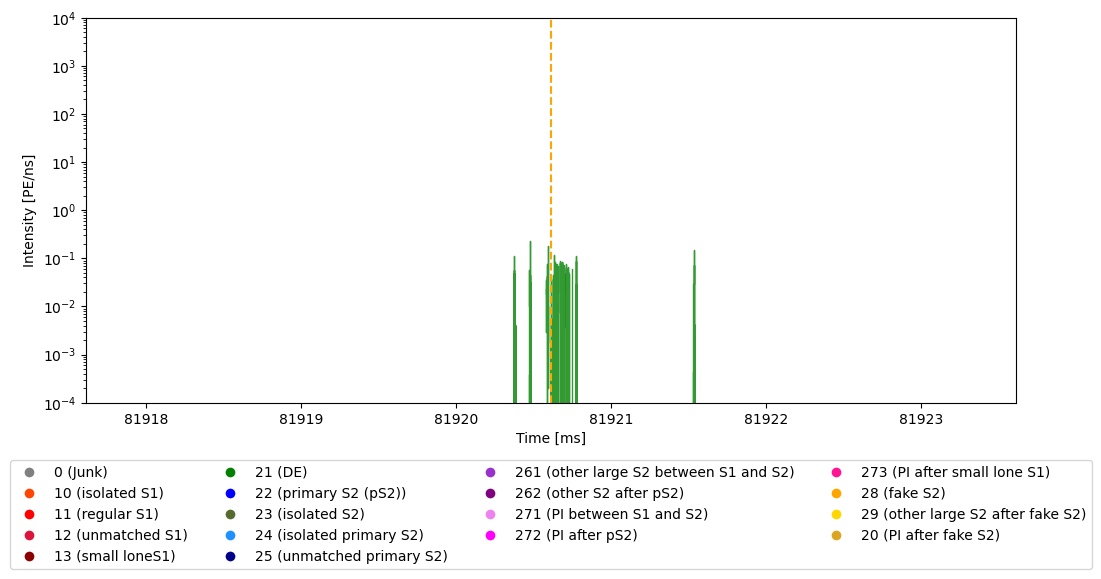

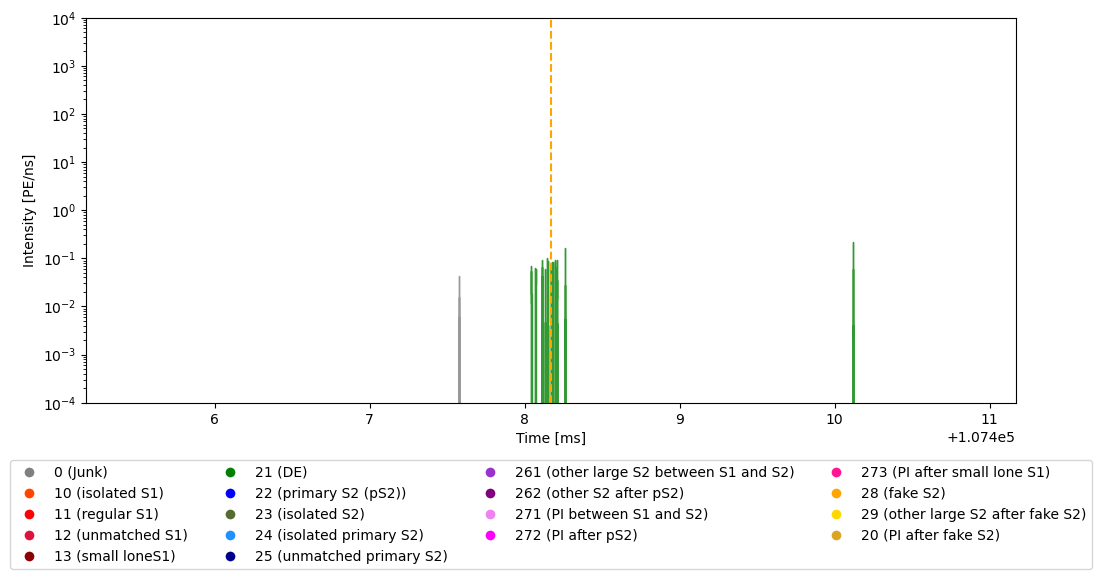

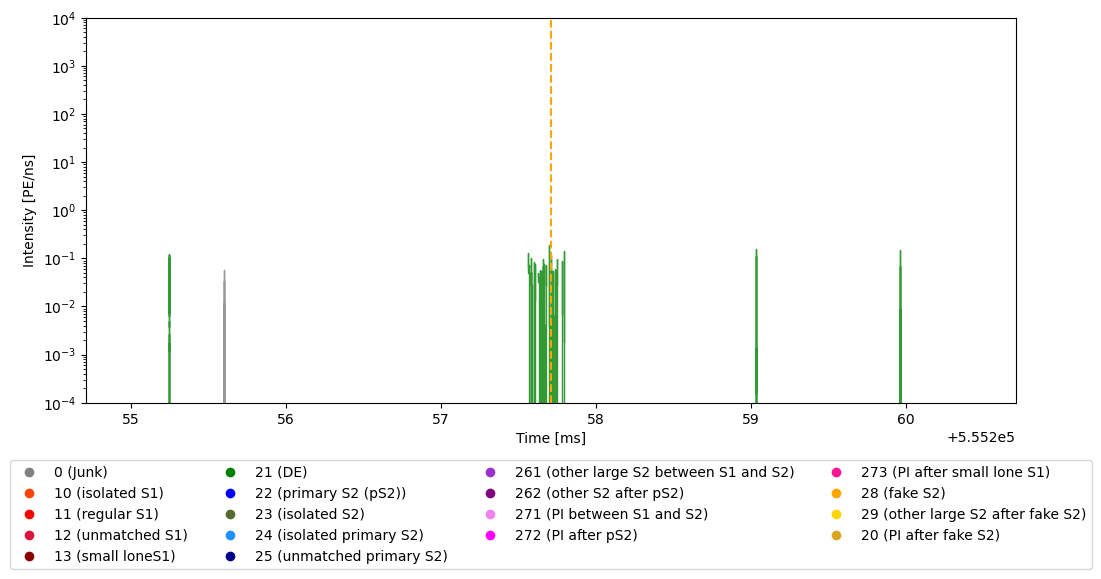

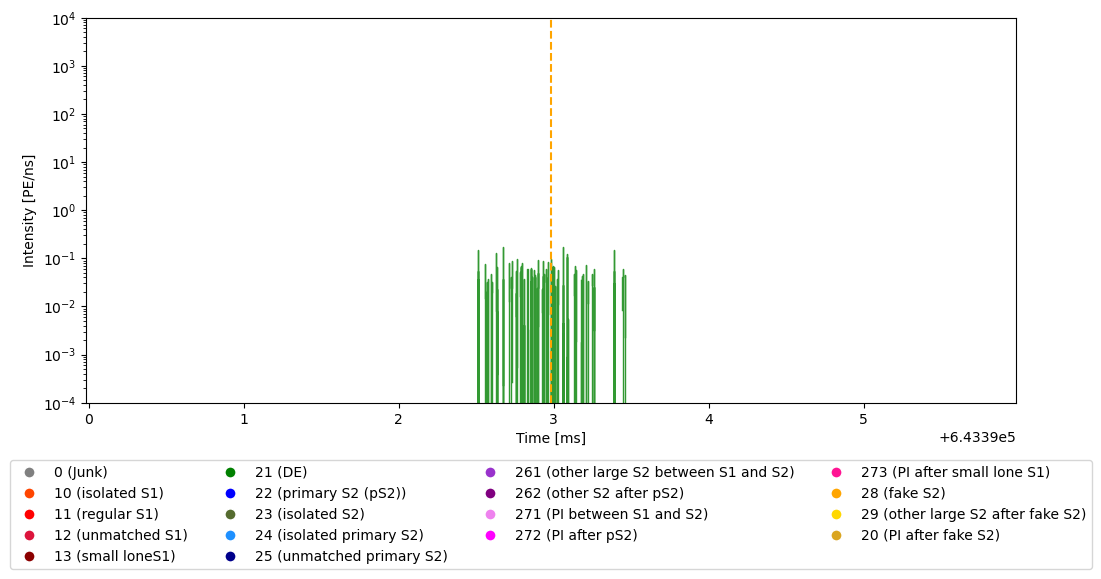

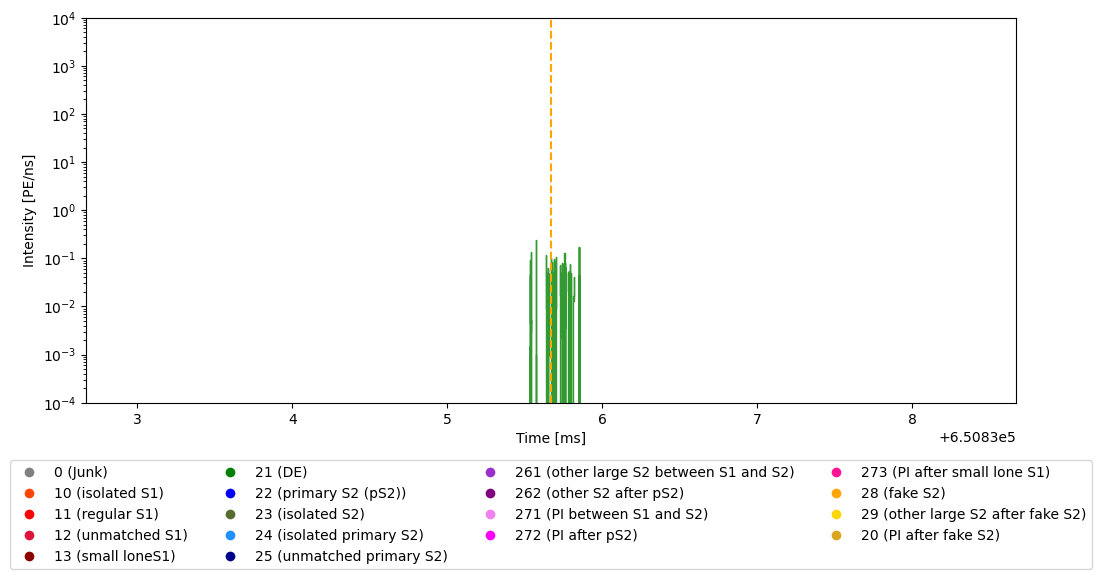

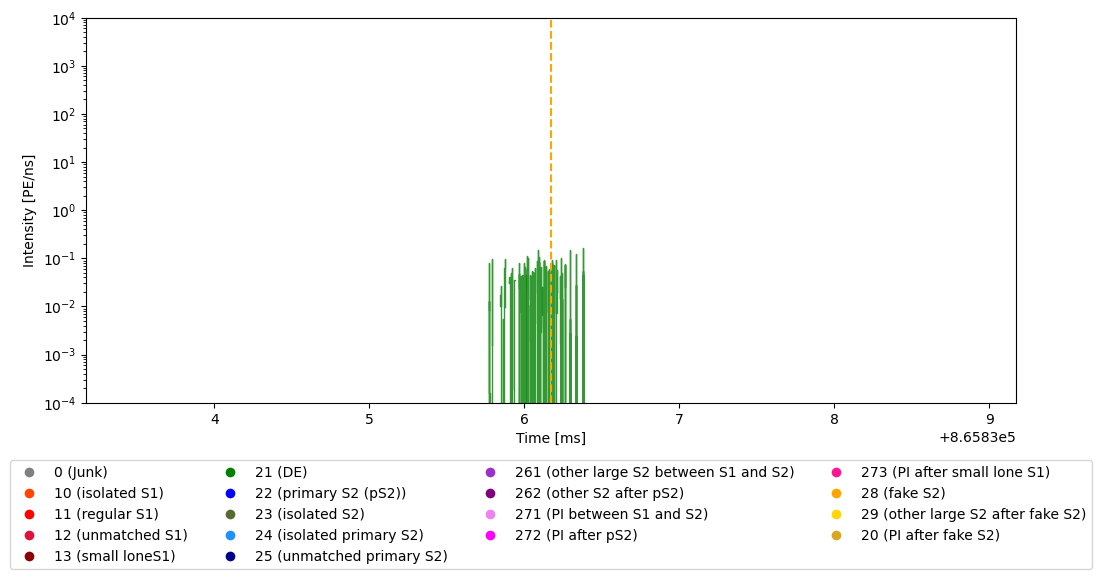

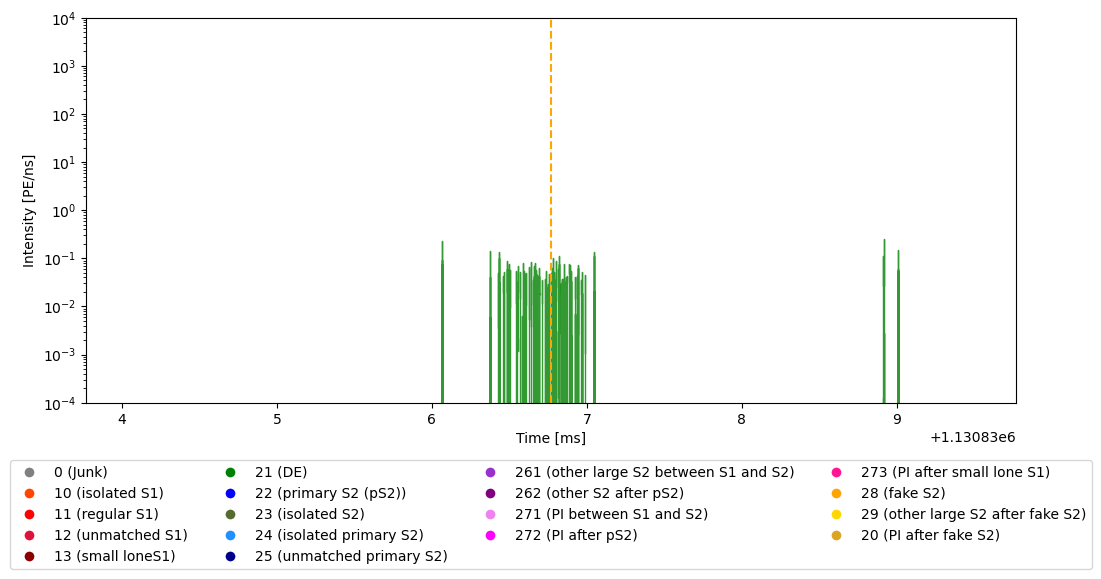

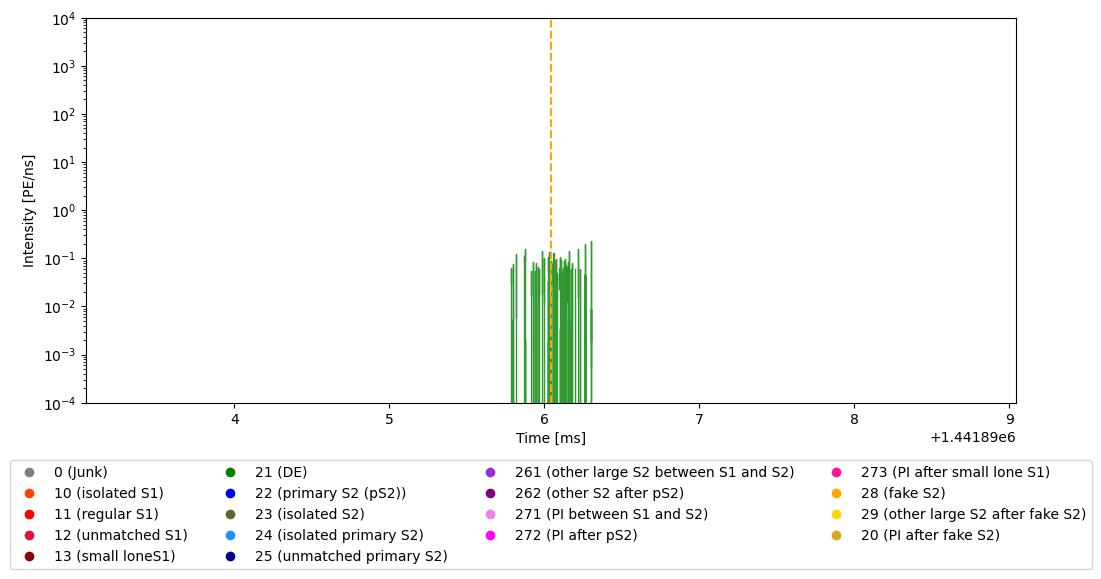

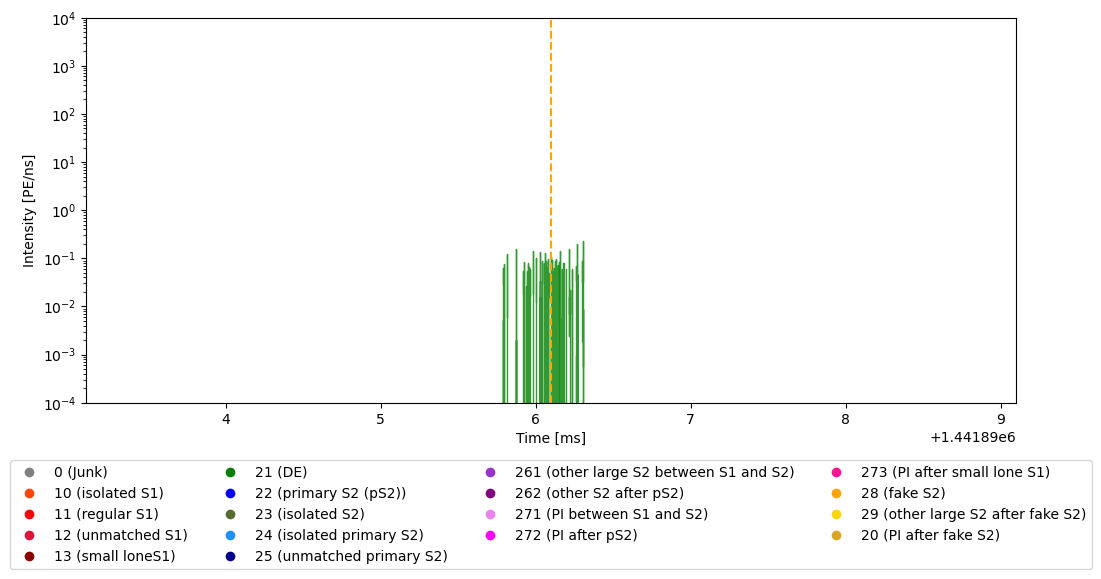

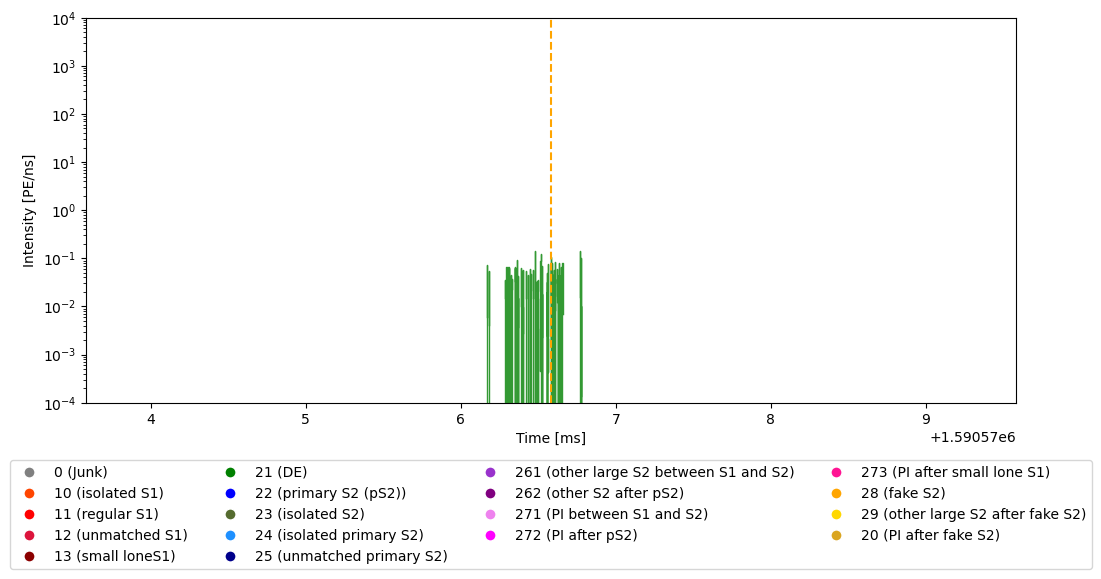

In [364]:
high_area_DEs = DEs_neww[DEs_neww['area'] > 3e2]

print(len(high_area_DEs))

for i in range(10):
    fig, ax = plot_peaks(run_id, peaks, t_reference = high_area_DEs['time'][i], vetos=DAQ_vetos, window_ms = 3, log=True)

23


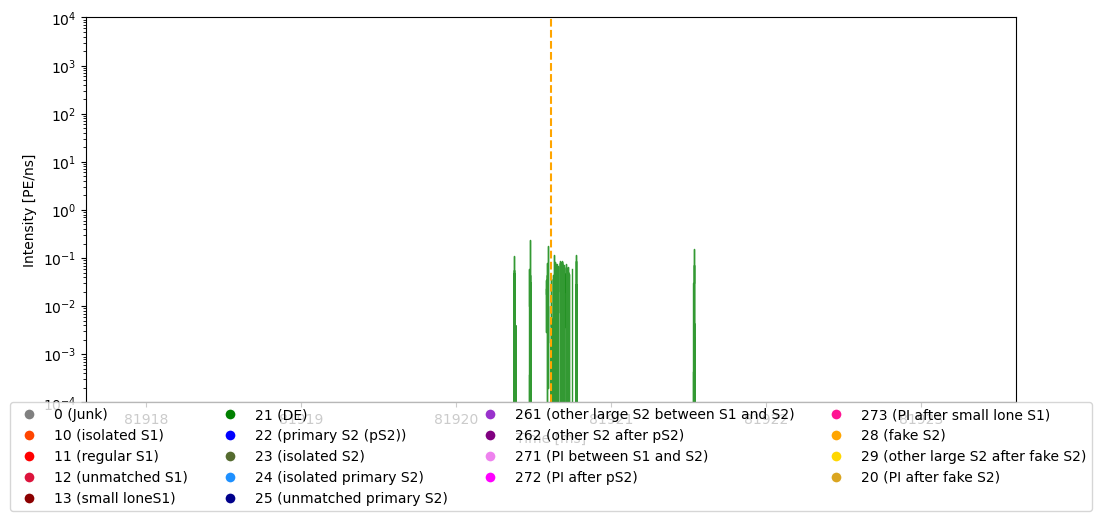

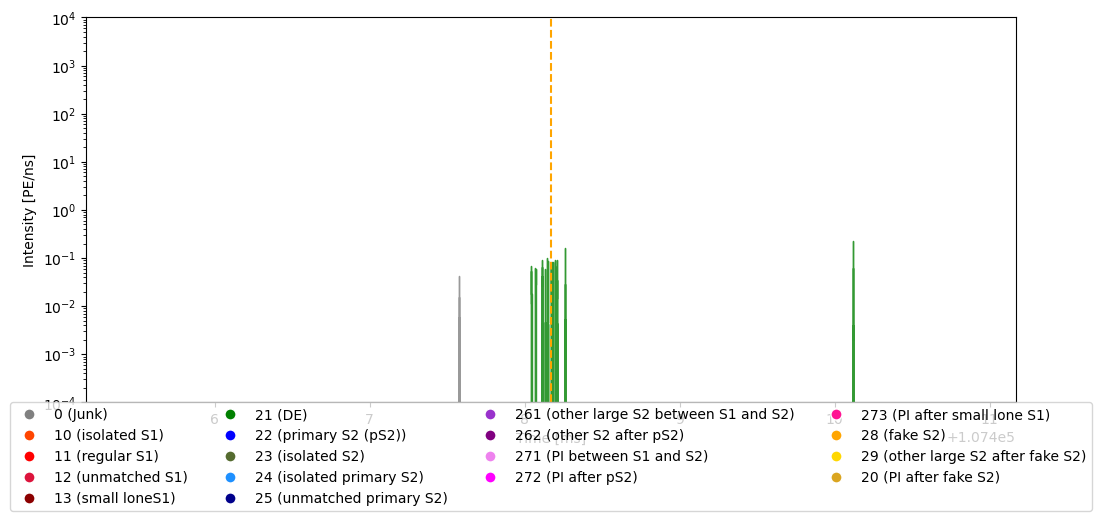

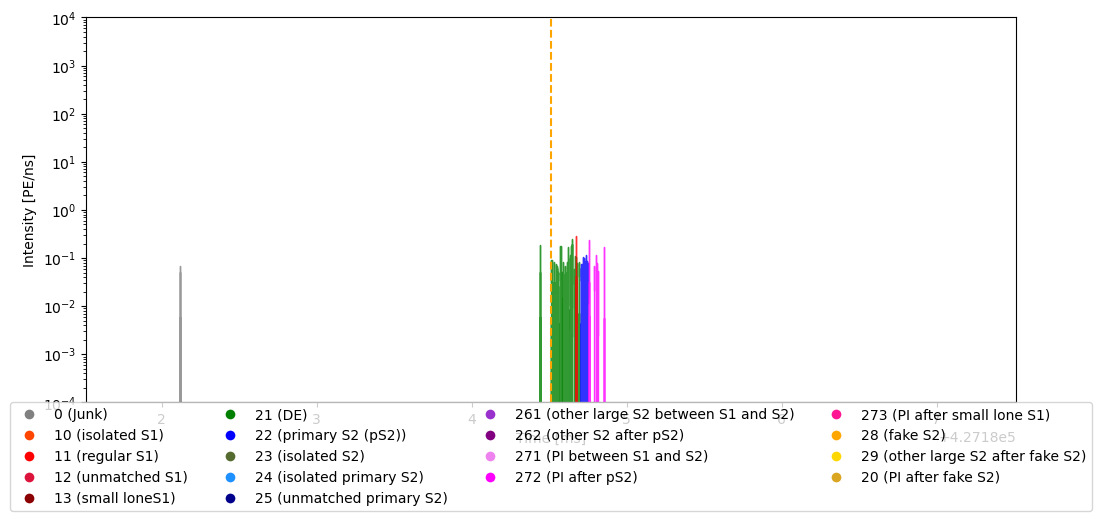

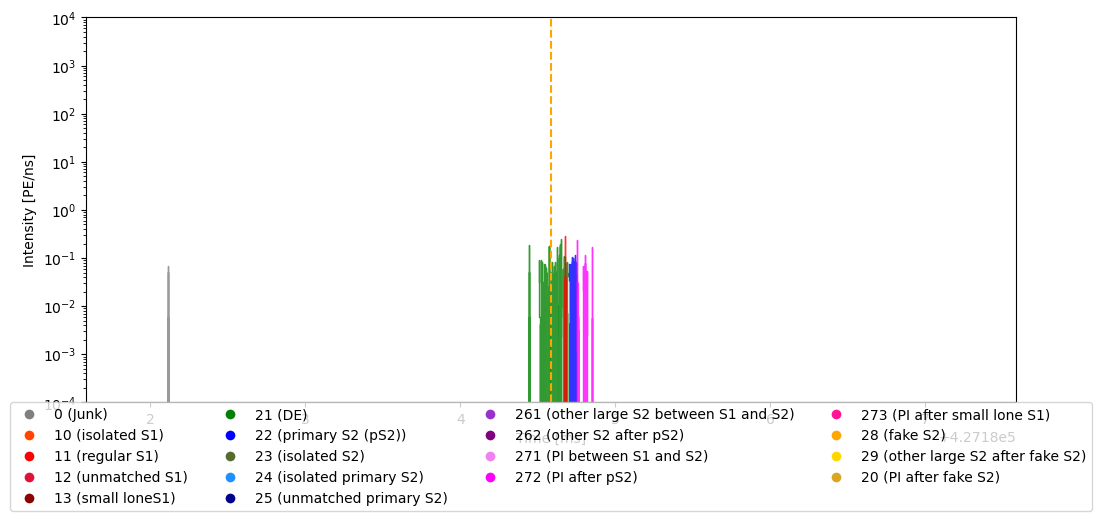

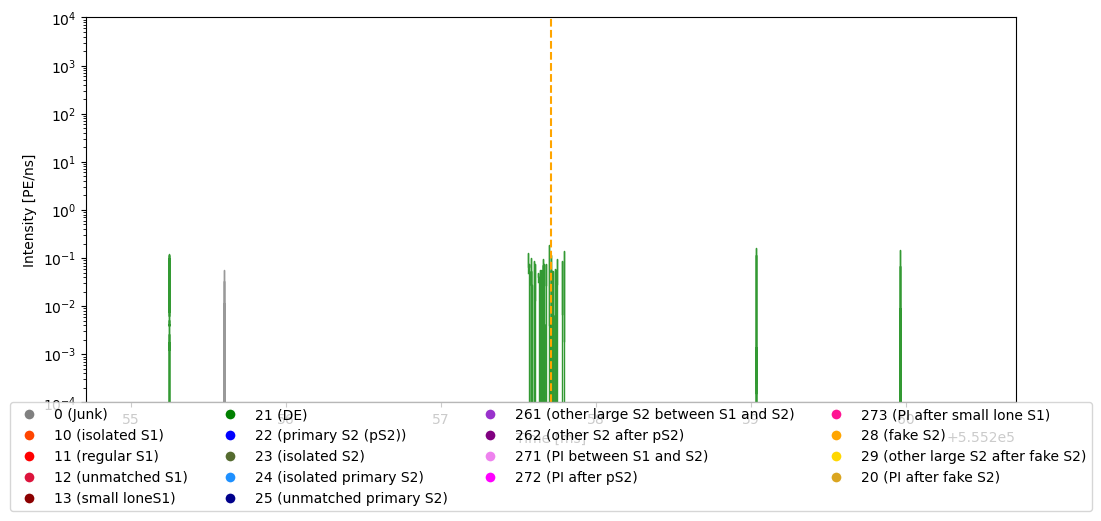

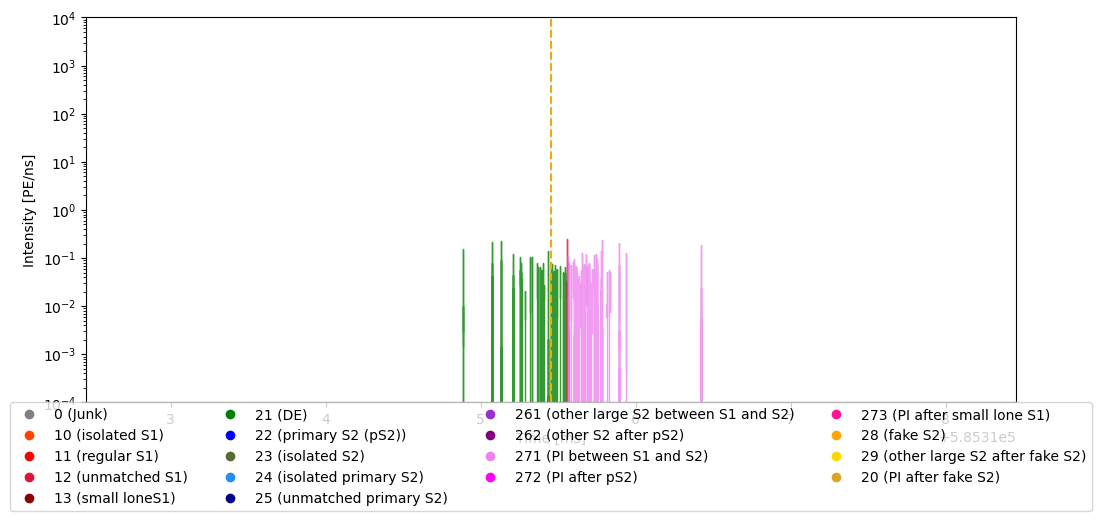

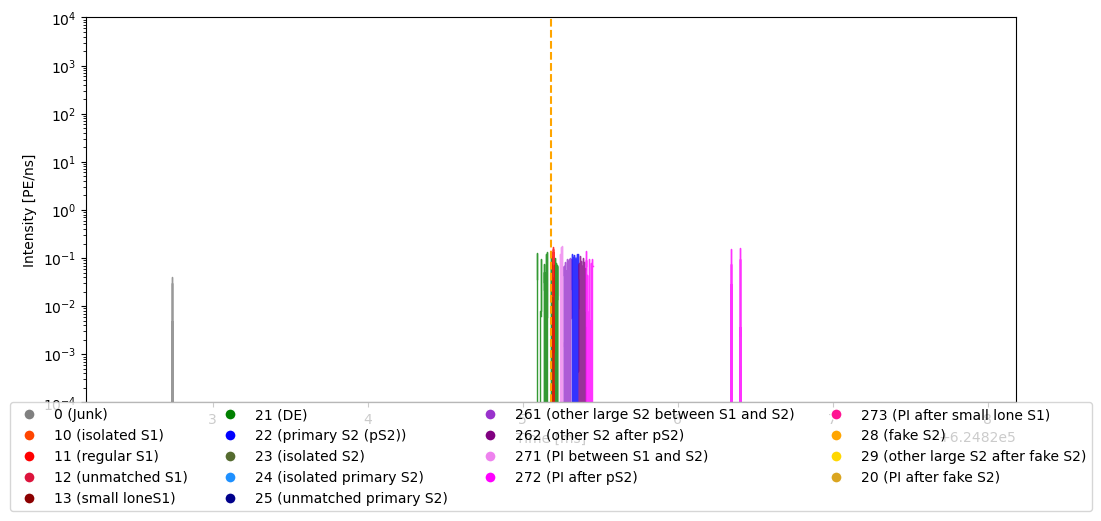

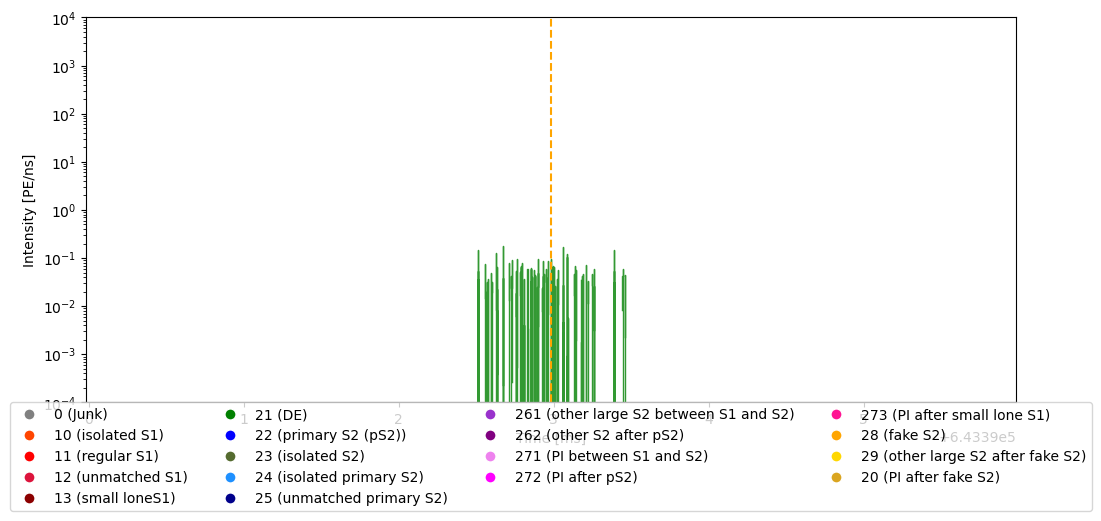

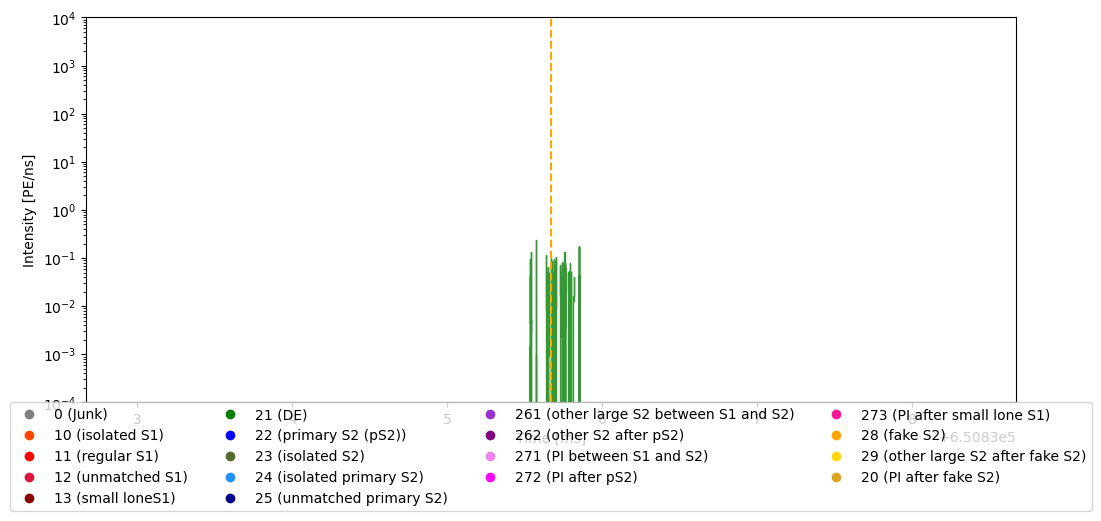

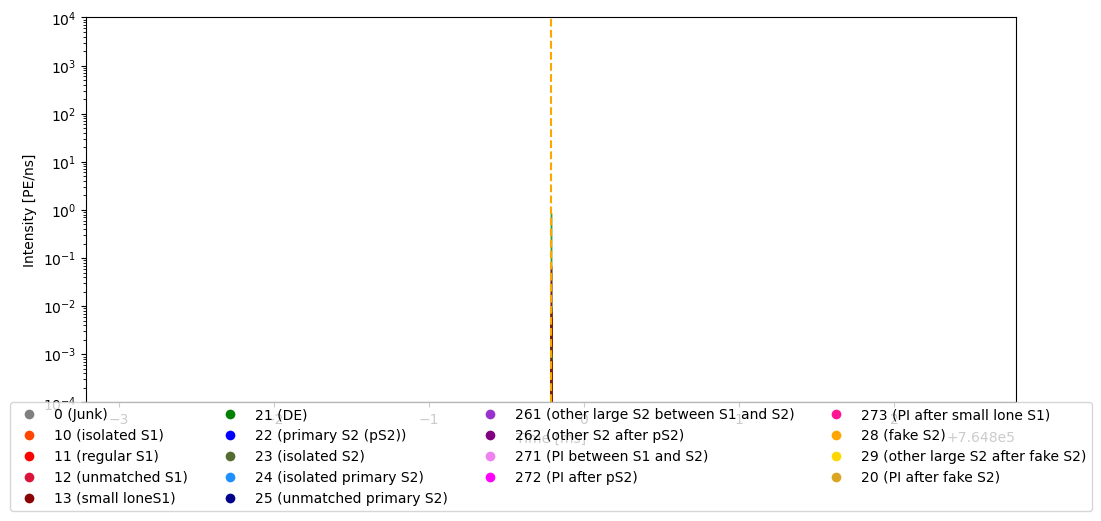

In [119]:
high_area_DEs = DEs_new[DEs_new['area'] > 3e2]

print(len(high_area_DEs))

for i in range(10):
    fig, ax = hf.plot_peaks(run_id, peaks, t_reference = high_area_DEs['time'][i], vetos=DAQ_vetos, window_ms = 3, log=True)

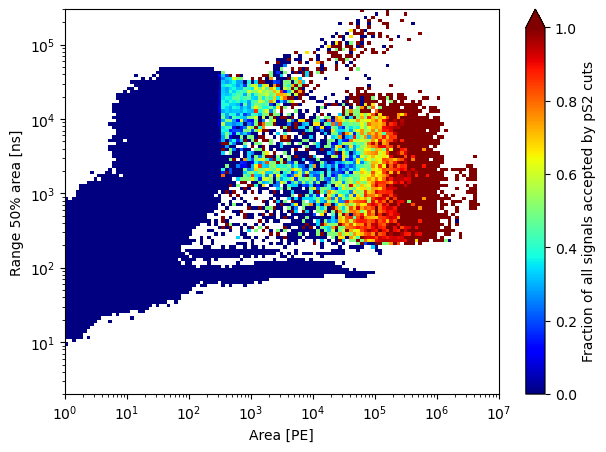

In [ ]:


# from matplotlib.colors import Normalize
# fig, ax = plot_acceptance_fraction(peaks, pS2s_neww, label = 'Fraction of all signals accepted by pS2 cuts')

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (2,).

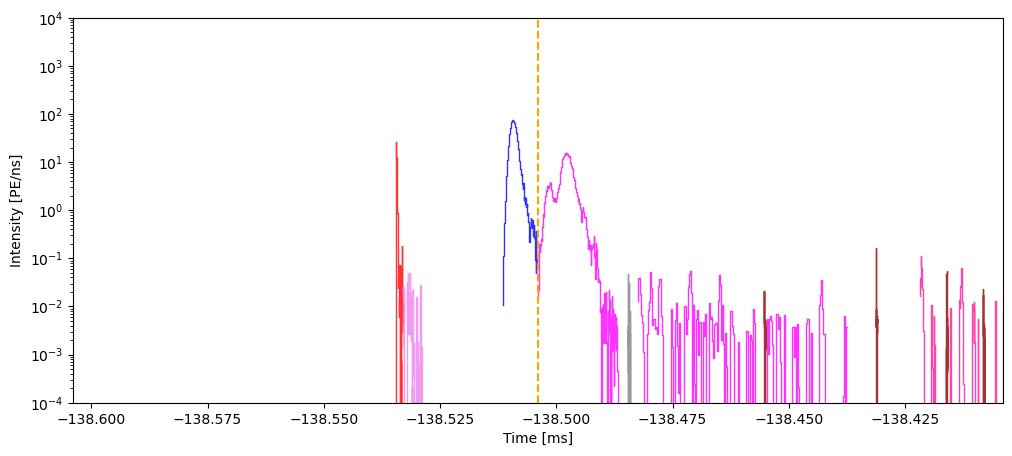

In [110]:
# import matplotlib.ticker as mticker

# # def plot_peaks(run_id, peaks, t_reference=None, vetos=None, seconds_range=None, time_range=None,
# #                window_ms=5, figsize=(12,5), ax=None, log=True):
# #     """
# #     Plot peak waveforms from a structured NumPy array, coloring by subtype.

# #     Parameters:
# #     - run_id: dict or object with 'start' attribute, giving run start in ns
# #     - peaks: structured NumPy array with at least ['time', 'length', 'dt', 'data'], optionally 'subtype'
# #     - t_reference: reference time in ns since epoch
# #     - seconds_range: (start, stop) in seconds since run start
# #     - time_range: (start, stop) in ns since epoch
# #     - window_ms: window around t_reference to plot (ms)
# #     - ax: Matplotlib axis, or None to create a new figure
# #     - log: whether to use log scale on y-axis
# #     """
# #     run_start = int(run_id['start'].value)  # ns since epoch

# #     # Determine which peaks to plot
# #     if seconds_range is not None:
# #         t_min_ns = int(seconds_range[0] * 1e9) + run_start
# #         t_max_ns = int(seconds_range[1] * 1e9) + run_start
# #     elif time_range is not None:
# #         t_min_ns, t_max_ns = time_range
# #     elif t_reference is not None:
# #         window_ns = int(window_ms * 1e6)  # convert ms to ns
# #         t_min_ns = t_reference - window_ns
# #         t_max_ns = t_reference + window_ns
# #     else:
# #         raise ValueError("Must provide t_reference, seconds_range, or time_range")

# def plot_peaks(run_id, peaks, t_reference=None, vetos=None, seconds_range=None, time_range=None,
#                window_ms=5, figsize=(12,5), ax=None, log=True, before_plot=False):
#     """
#     ...
#     - before_plot: if True, plot [t_reference - window, t_reference];
#                    if False, plot [t_reference - window/2, t_reference + window/2].
#     """
#     run_start = int(run_id['start'].value)  # ns since epoch

#     # Determine which peaks to plot
#     if seconds_range is not None:
#         t_min_ns = int(seconds_range[0] * 1e9) + run_start
#         t_max_ns = int(seconds_range[1] * 1e9) + run_start
#     elif time_range is not None:
#         t_min_ns, t_max_ns = time_range
#     elif t_reference is not None:
#         window_ns = int(window_ms * 1e6)  # ms → ns
#         if before_plot:
#             t_min_ns = t_reference - window_ns
#             t_max_ns = t_reference
#         else:
#             t_min_ns = t_reference - window_ns // 2
#             t_max_ns = t_reference + window_ns // 2
#     else:
#         raise ValueError("Must provide t_reference, seconds_range, or time_range")

#     peak_selection = peaks[(peaks['time'] >= t_min_ns) & (peaks['time'] <= t_max_ns)]
#     if len(peak_selection) == 0:
#         print("No peaks in selected range.")
#         return None, None

#     # Convert times to ms relative to run start for plotting
#     t_min_plot = (t_min_ns - run_start) / 1e6
#     t_max_plot = (t_max_ns - run_start) / 1e6

#     # Create figure if needed
#     if ax is None:
#         fig, ax = plt.subplots(figsize=figsize)
#     else:
#         fig = ax.figure

#     has_subtype = 'subtype' in peaks.dtype.names

#     # Plot each peak
#     for p in peak_selection:
#         subtype = p['subtype'] if has_subtype else 'unknown'
#         colour = subtype_colours.get(subtype, "gray")
#         plot_peak(p, ax=ax, t0=run_start, colour=colour)

#     ax.set_xlabel("Time [ms]")
#     ax.set_ylabel("Intensity [PE/ns]")

#     if log:
#         ax.set_yscale('log')
#         ax.set_ylim(1e-4, 1e4)

#     ax.set_xlim(t_min_plot, t_max_plot)

#     # Plot vetos
#     if vetos is not None:
#         for veto in vetos:
#             start_ms = veto['start(ms)']
#             end_ms = veto['end(ms)']
#             if (end_ms > t_min_plot) and (start_ms < t_max_plot):
#                 ax.axvspan(start_ms, end_ms, color='red', alpha=0.2)

#     # Optional vertical line at reference
#     # if t_reference is not None:
#     #     ax.axvline((t_reference - run_start)/1e6, color='orange', linestyle='--')

#     # Legend
#     legend_elements = []
#     for subtype, colour in subtype_colours.items():
#         label = f"{subtype} ({subtype_names.get(subtype, 'Unknown')})"
#         legend_elements.append(Line2D([0], [0], marker='o', color='w',
#                                       label=label, markerfacecolor=colour,
#                                       markersize=8, linestyle='None'))
#     ax.legend(handles=legend_elements, loc='lower center', fontsize=10,
#               bbox_to_anchor=(0.5, -0.45), ncol=4, frameon=True)
    
#     ax.ticklabel_format(style='plain', useOffset=False, axis='x')

#     return fig, ax


# def plot_peak(p, ax, t0=None, colour='gray'):
#     """
#     Plot a single peak waveform from a structured NumPy array.

#     Parameters:
#     - p: a single peak structured array element
#     - ax: Matplotlib axis
#     - t0: reference time in ns
#     - colour: color for plotting
#     """
#     n = p['length']
#     dt = p['dt']
#     times_ns = p['time']  # start time in ns

#     # x-axis in ms relative to t0
#     x = ((times_ns - t0) + np.arange(n) * dt) / 1e6
#     y = p['data'][:n] / dt

#     ax.plot(x, y, drawstyle='steps-pre', color=colour, linewidth=1, alpha=0.8)

two72_high = peaks[(peaks['subtype'] == 272) & (peaks['area'] > 1e4)]

for i in range(10):
    fig, ax = plot_peaks(run_id, peaks, t_reference = two72_high['time'][i], vetos=DAQ_vetos, window_ms = 0.1, log=True)

fig, ax = plot_peaks(run_id, peaks, t_reference = two72_high['time'][9], vetos=DAQ_vetos, window_ms = 0.1, log=False)    

In [453]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

# subtype_colours = {...}
# subtype_names = {...}

def plot_peaks(run_id, peaks,
               t_reference=None,
               reference_position='center',
               vetos=None,
               seconds_range=None, time_range=None,
               window_ms=5,
               figsize=(12, 5),
               ax=None, log=True,
               disable_axis_offset=True):
    """
    Plot peak waveforms from a structured NumPy array, coloring by subtype.

    Parameters
    ----------
    run_id : mapping-like with ['start'].value (ns since epoch)
    peaks : structured numpy array with at least ['time','length','dt','data']; optionally 'subtype'
    t_reference : int (ns), absolute ns since epoch
    reference_position : {'center','right','left'} or float in [0,1]
        Position of t_reference inside the plotted window:
          - 'center' (default): t_reference in the middle
          - 'right' : t_reference at the right edge (plot window before it)
          - 'left'  : t_reference at the left edge (plot window after it)
          - float f : t_reference at fraction f across the window (0 = left edge, 1 = right edge)
    vetos : iterable of dicts with ['start(ms)'], ['end(ms)'] (ms since run start)
    seconds_range : (start, stop) in seconds relative to run start
    time_range : (start, stop) in ns absolute
    window_ms : total width of the plotting window (ms)
    figsize : tuple, size of figure
    ax : Matplotlib axis (optional)
    log : bool, use log y scale
    disable_axis_offset : bool, turn off Matplotlib tick offset notation
    """

    run_start = int(run_id['start'].value)  # ns since epoch

    # Determine window boundaries in ns
    if seconds_range is not None:
        t_min_ns = int(seconds_range[0] * 1e9) + run_start
        t_max_ns = int(seconds_range[1] * 1e9) + run_start
    elif time_range is not None:
        t_min_ns, t_max_ns = map(int, time_range)
    elif t_reference is not None:
        window_ns = int(window_ms * 1e6)  # ms → ns
        if reference_position == 'center':
            half = window_ns // 2
            t_min_ns = t_reference - half
            t_max_ns = t_reference + (window_ns - half)
        elif reference_position == 'right':
            t_min_ns = t_reference - window_ns
            t_max_ns = t_reference
        elif reference_position == 'left':
            t_min_ns = t_reference
            t_max_ns = t_reference + window_ns
        elif isinstance(reference_position, float):
            f = float(reference_position)
            if not (0 <= f <= 1):
                raise ValueError("reference_position float must be in [0,1]")
            t_min_ns = t_reference - int(f * window_ns)
            t_max_ns = t_min_ns + window_ns
        else:
            raise ValueError("Invalid reference_position")
    else:
        raise ValueError("Must provide t_reference, seconds_range, or time_range")

    if t_min_ns >= t_max_ns:
        raise ValueError("Bad time range: t_min >= t_max")

    # Select peaks
    peak_selection = peaks[(peaks['time'] >= t_min_ns) & (peaks['time'] <= t_max_ns)]
    if len(peak_selection) == 0:
        print("No peaks in selected range.")
        return None, None

    # Create axis if needed
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.figure

    # Plot peaks
    has_subtype = 'subtype' in peaks.dtype.names
    for p in peak_selection:
        subtype = p['subtype'] if has_subtype else 'unknown'
        colour = subtype_colours.get(subtype, "gray")
        plot_peak(p, ax=ax, t0=run_start, colour=colour)

    # Convert ns → ms relative to run start for axis limits
    t_min_plot = (t_min_ns - run_start) / 1e6
    t_max_plot = (t_max_ns - run_start) / 1e6
    ax.set_xlim(t_min_plot, t_max_plot)

    # Labels
    ax.set_xlabel("Time [ms since run start]")
    ax.set_ylabel("Intensity [PE/ns]")

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1e-4, 1e4)

    if disable_axis_offset:
        ax.xaxis.get_major_formatter().set_useOffset(False)
        ax.ticklabel_format(style='plain', useOffset=False, axis='x')

    # Vetos
    if vetos is not None:
        for veto in vetos:
            start_ms = veto['start(ms)']
            end_ms = veto['end(ms)']
            if (end_ms > t_min_plot) and (start_ms < t_max_plot):
                ax.axvspan(start_ms, end_ms, color='red', alpha=0.2)

    # Vertical line at reference
    if t_reference is not None:
        ax.axvline((t_reference - run_start) / 1e6, color='orange', linestyle='--')

    # Legend
    legend_elements = []
    for subtype, colour in subtype_colours.items():
        label = f"{subtype} ({subtype_names.get(subtype, 'Unknown')})"
        legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                      label=label, markerfacecolor=colour,
                                      markersize=8, linestyle='None'))
    if legend_elements:
        ax.legend(handles=legend_elements, loc='lower center', fontsize=10,
                  bbox_to_anchor=(0.5, -0.45), ncol=4, frameon=True)

    return fig, ax


def plot_peak(p, ax, t0=None, colour='gray'):
    """Plot a single peak waveform."""
    n = int(p['length'])
    dt = float(p['dt'])
    times_ns = int(p['time'])
    if t0 is None:
        t0 = 0

    x = ((times_ns - t0) + np.arange(n) * dt) / 1e6  # ms since run start
    y = p['data'][:n] / dt
    ax.plot(x, y, drawstyle='steps-pre', color=colour, linewidth=1, alpha=0.8)


In [2]:
def plot_peaks_new(run_id, peaks,
               t_reference=None,
               reference_position='center',
               vetos=None,
               seconds_range=None, time_range=None,
               window_ms=5,
               figsize=(12, 5),
               ax=None, log=True,
               disable_axis_offset=True):
    """
    Plot peak waveforms from a structured NumPy array, coloring by simplified subtype groups.
    """

    run_start = int(run_id['start'].value)  # ns since epoch

    # Determine window boundaries in ns
    if seconds_range is not None:
        t_min_ns = int(seconds_range[0] * 1e9) + run_start
        t_max_ns = int(seconds_range[1] * 1e9) + run_start
    elif time_range is not None:
        t_min_ns, t_max_ns = map(int, time_range)
    elif t_reference is not None:
        window_ns = int(window_ms * 1e6)  # ms → ns
        if reference_position == 'center':
            half = window_ns // 2
            t_min_ns = t_reference - half
            t_max_ns = t_reference + (window_ns - half)
        elif reference_position == 'right':
            t_min_ns = t_reference - window_ns
            t_max_ns = t_reference
        elif reference_position == 'left':
            t_min_ns = t_reference
            t_max_ns = t_reference + window_ns
        elif isinstance(reference_position, float):
            f = float(reference_position)
            if not (0 <= f <= 1):
                raise ValueError("reference_position float must be in [0,1]")
            t_min_ns = t_reference - int(f * window_ns)
            t_max_ns = t_min_ns + window_ns
        else:
            raise ValueError("Invalid reference_position")
    else:
        raise ValueError("Must provide t_reference, seconds_range, or time_range")

    if t_min_ns >= t_max_ns:
        raise ValueError("Bad time range: t_min >= t_max")

    # Select peaks
    peak_selection = peaks[(peaks['time'] >= t_min_ns) & (peaks['time'] <= t_max_ns)]
    if len(peak_selection) == 0:
        print("No peaks in selected range.")
        return None, None

    # Create axis if needed
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.figure

    # Group definitions
    de_codes = {20, 21, 23, 271, 272, 273}
    s1_codes = {10, 11, 12, 13, 28}
    ps2_codes = {22, 24, 25, 261, 262, 29}

    # Plot peaks
    has_subtype = 'subtype' in peaks.dtype.names
    for p in peak_selection:
        subtype = p['subtype'] if has_subtype else 'unknown'
        if subtype in de_codes:
            colour = "green"
        elif subtype in s1_codes:
            colour = "red"
        elif subtype in ps2_codes:
            colour = "blue"
        else:
            colour = "grey"
        plot_peak(p, ax=ax, t0=run_start, colour=colour)

    # Convert ns → ms relative to run start for axis limits
    t_min_plot = (t_min_ns - run_start) / 1e6
    t_max_plot = (t_max_ns - run_start) / 1e6
    ax.set_xlim(t_min_plot, t_max_plot)

    # Labels
    ax.set_xlabel("Time [ms since run start]")
    ax.set_ylabel("Intensity [PE/ns]")

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1e-4, 1e4)

    if disable_axis_offset:
        ax.xaxis.get_major_formatter().set_useOffset(False)
        ax.ticklabel_format(style='plain', useOffset=False, axis='x')

    # Vetos
    if vetos is not None:
        for veto in vetos:
            start_ms = veto['start(ms)']
            end_ms = veto['end(ms)']
            if (end_ms > t_min_plot) and (start_ms < t_max_plot):
                ax.axvspan(start_ms, end_ms, color='red', alpha=0.2)

    # Vertical line at reference
    if t_reference is not None:
        ax.axvline((t_reference - run_start) / 1e6, color='orange', linestyle='--')

    # Simplified legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='S1', markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='DE', markerfacecolor='green', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='pS2', markerfacecolor='blue', markersize=8)
    ]
    ax.legend(handles=legend_elements, loc='lower center', fontsize=10,
              bbox_to_anchor=(0.5, -0.35), ncol=3, frameon=True)

    return fig, ax


291


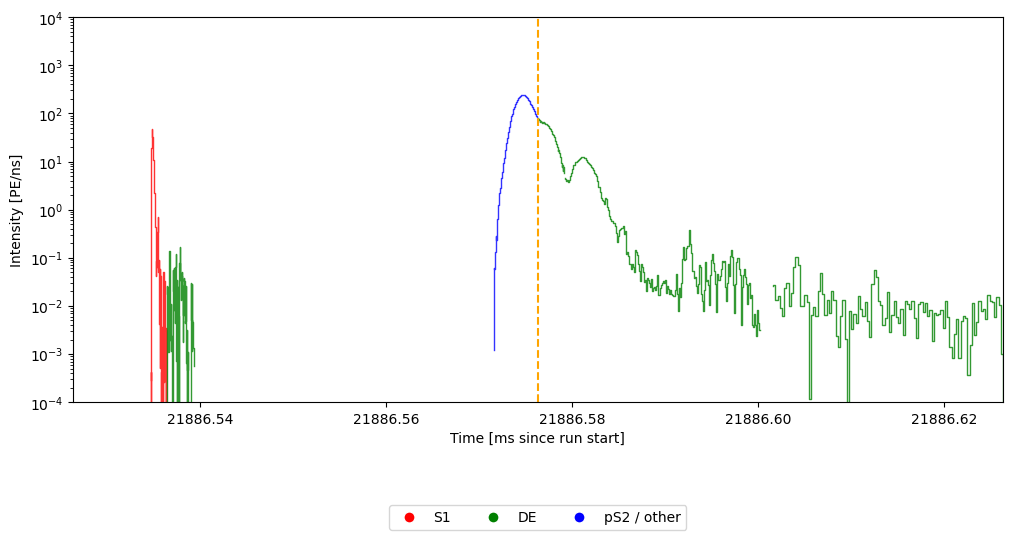

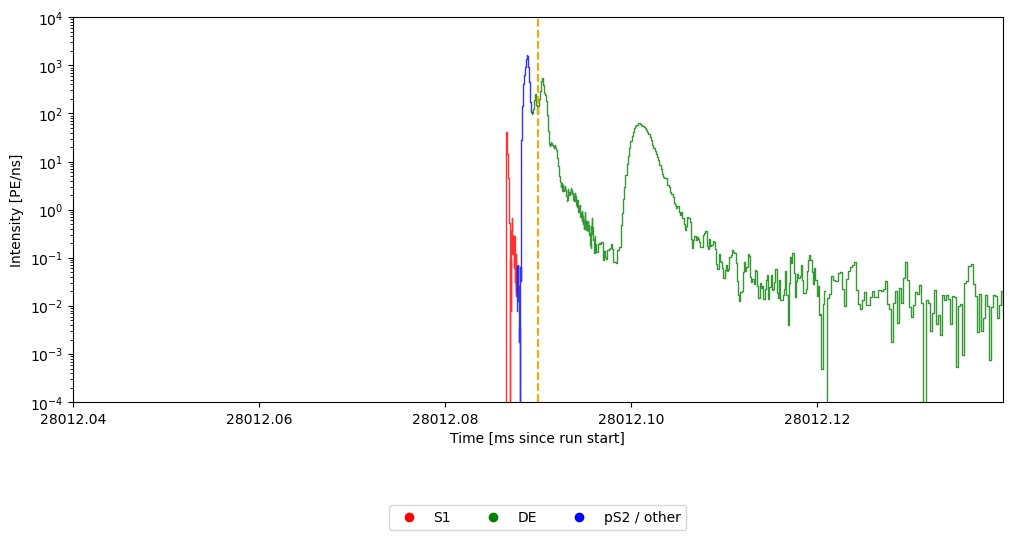

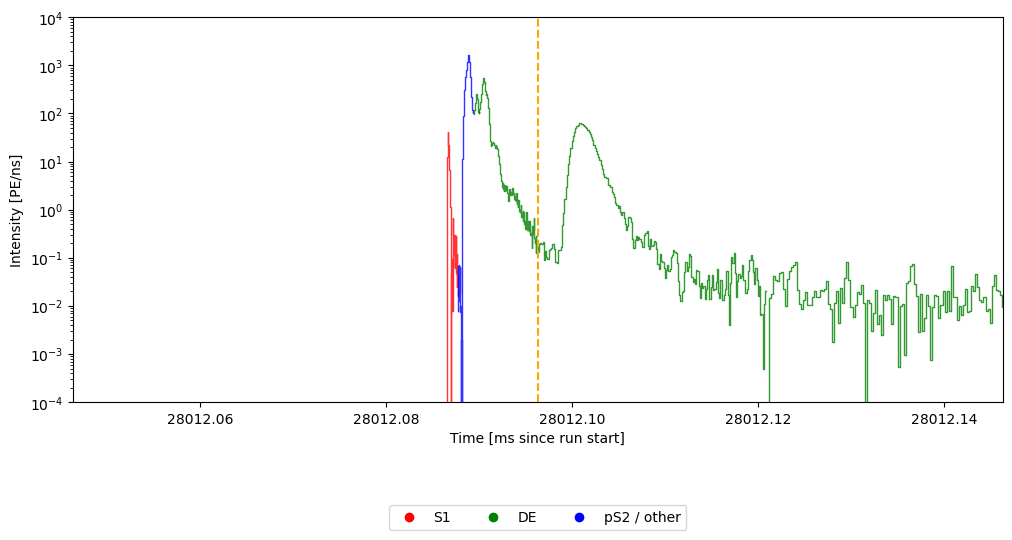

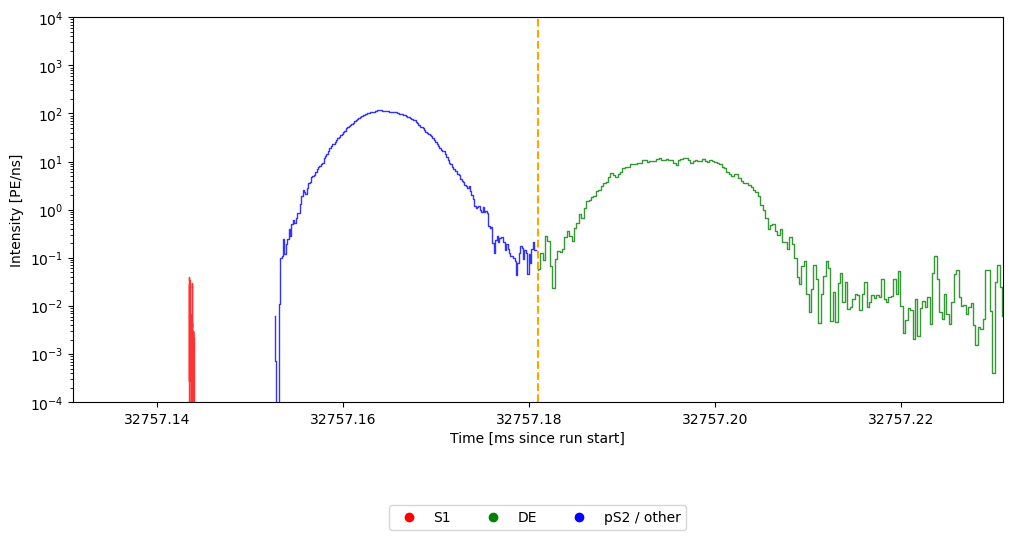

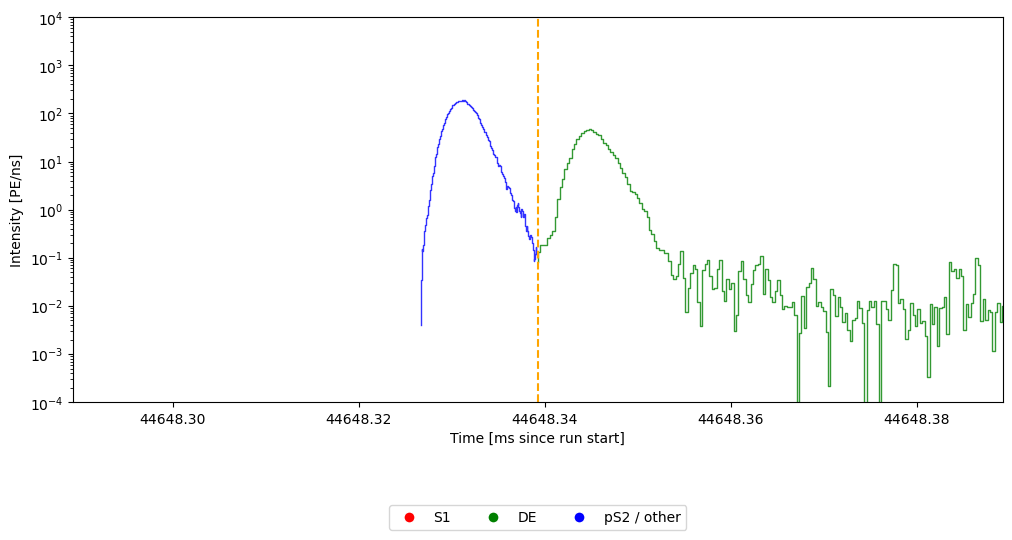

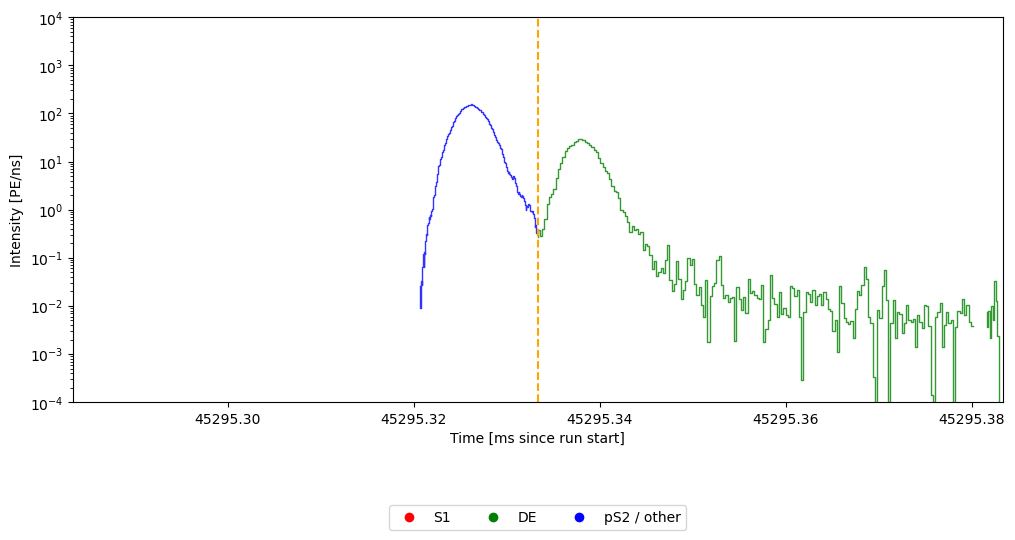

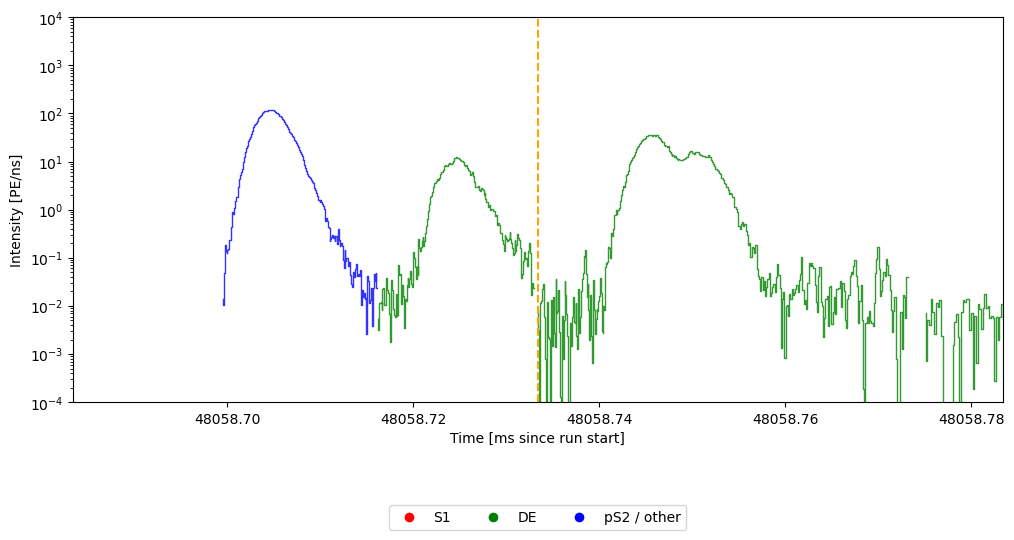

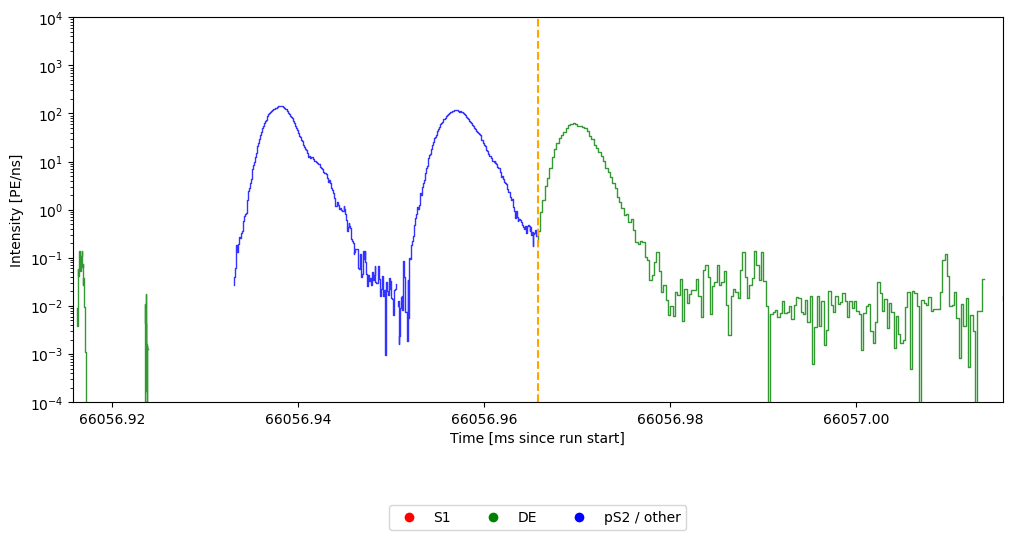

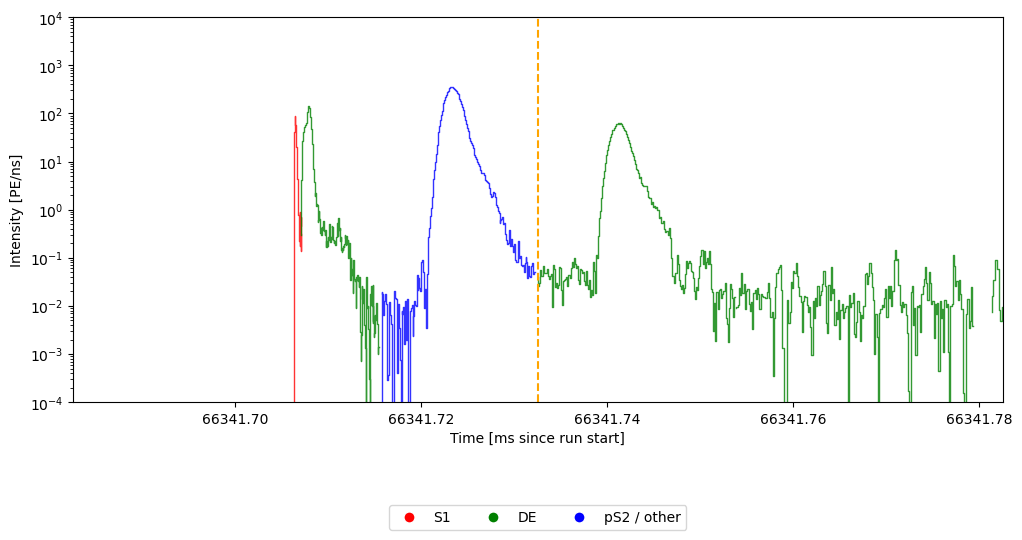

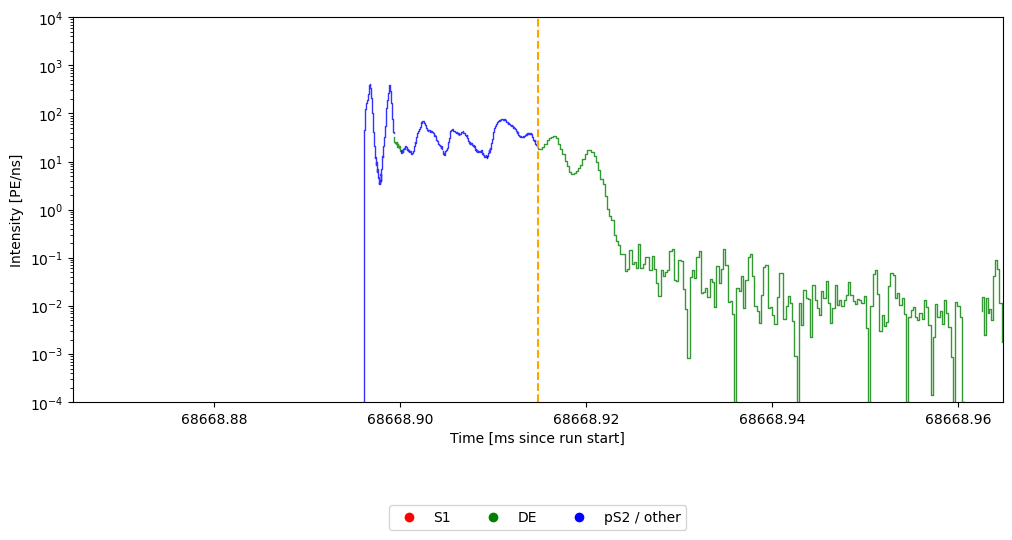

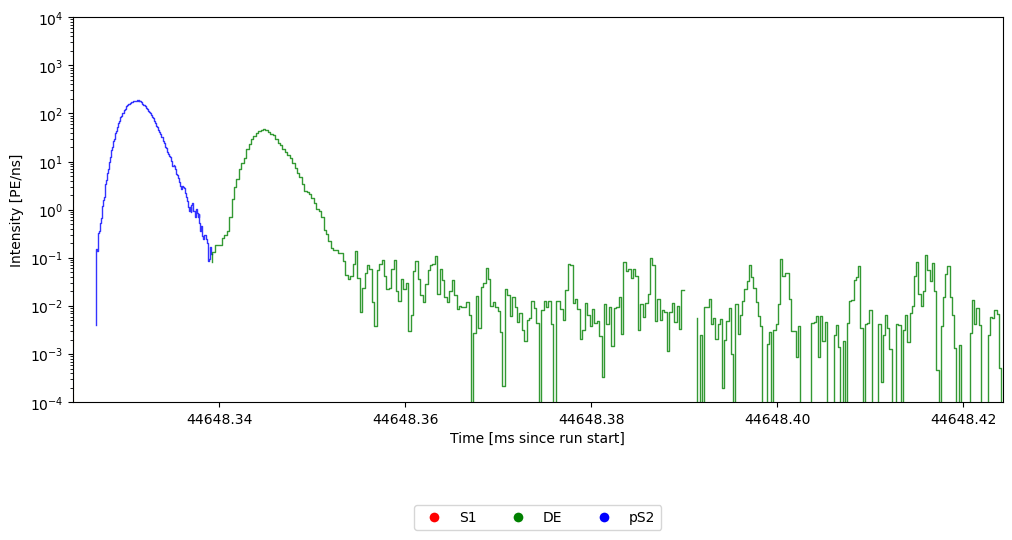

In [263]:
two72 = peaks[(peaks['subtype'] == 272) & (peaks['area'] > 1e5)]

print(len(two72))

for i in range(10):
    fig, ax = plot_peaks(run_id, peaks, t_reference=two72['time'][i], window_ms=0.1, log=True)


fig, ax = plot_peaks_new(run_id, peaks, t_reference=two72['time'][4] - 15000, reference_position='left', vetos=DAQ_vetos, window_ms=0.1, log=True)
# fig1, ax1 = plot_peaks_new(run_id, peaks, t_reference=two72['time'][4] - 15000, reference_position='left', vetos=DAQ_vetos, window_ms=0.1, log=False)
# ax1.axvline((two72['center_time'][4] - run_id['start'].value) / 1e6, color='orange', linestyle='--', label = f'Photoionisation S2 of size {two72["area"][4]:.1f} PE')
# ax1.legend()

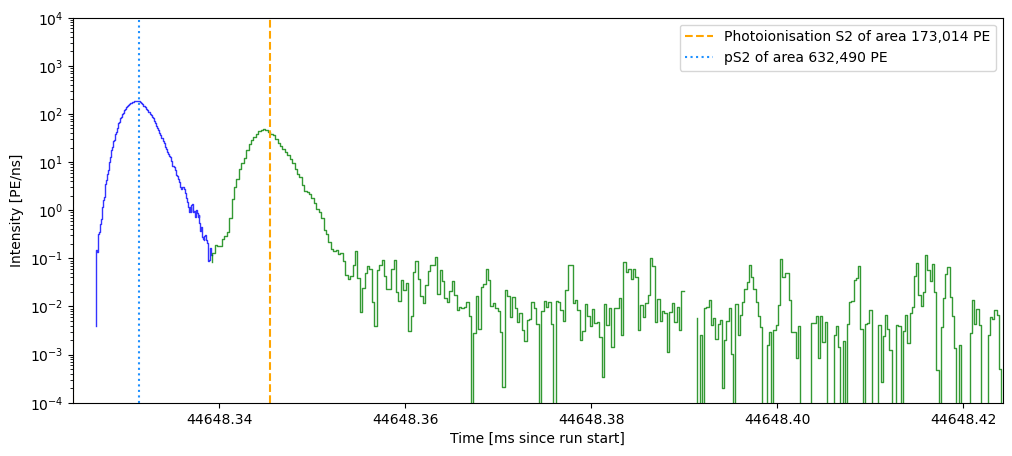

In [208]:
# Plot PI event window
fig1, ax1 = plot_peaks_new(
    run_id, peaks,
    t_reference=two72['time'][4] - 15000,
    reference_position='left',
    vetos=DAQ_vetos,
    window_ms=0.1,
    log=True
)

# Draw vertical line for the PI (current event)
pi_time_ms = (two72['center_time'][4] - run_id['start'].value) / 1e6
pi_area_str = f"{two72['area'][4]:,.0f}"  # adds thousands separator, no decimals
ax1.axvline(pi_time_ms, color='orange', linestyle='--',
            label=f"Photoionisation S2 of area {pi_area_str} PE")

# ---- Add the previous pS2 ----
# Assuming you have an array `pS2` or similar that matches PI ordering.
# If not, you can find the nearest earlier pS2 in `peaks` like this:
prev_ps2 = peaks[(peaks['subtype'] == 22) & (peaks['time'] < two72['time'][4])]
if len(prev_ps2) > 0:
    # Take the last pS2 before this PI
    pS2_prev = prev_ps2[-1]
    ps2_time_ms = (pS2_prev['center_time'] - run_id['start'].value) / 1e6
    ps2_area_str = f"{pS2_prev['area']:,.0f}"
    ax1.axvline(ps2_time_ms, color='dodgerblue', linestyle=':',
                label=f"pS2 of area {ps2_area_str} PE")

# Update legend
ax1.legend()


In [3]:
# Plot PI event window
fig1, ax1 = plot_peaks_new(
    run_id, peaks,
    t_reference=two72['time'][4] - 15000,
    reference_position='left',
    vetos=DAQ_vetos,
    window_ms=0.03,
    log=False
)

# ---- Add the previous pS2 FIRST ----
prev_ps2 = peaks[(peaks['subtype'] == 22) & (peaks['time'] < two72['time'][4])]
if len(prev_ps2) > 0:
    pS2_prev = prev_ps2[-1]
    ps2_time_ms = (pS2_prev['center_time'] - run_id['start'].value) / 1e6
    ps2_area_str = f"{pS2_prev['area']:,.0f}"
    ax1.axvline(
        ps2_time_ms, color='dodgerblue', linestyle=':',
        label=f"pS2 of area {ps2_area_str} PE"
    )

# ---- Then add the current PI line ----
pi_time_ms = (two72['center_time'][4] - run_id['start'].value - 500) / 1e6
pi_area_str = f"{two72['area'][4]:,.0f}"  # comma separator, no decimals
ax1.axvline(
    pi_time_ms, color='orange', linestyle='--',
    label=f"Secondary-scatter S2 of area {pi_area_str} PE"
)

# Legend
ax1.legend()


NameError: name 'run_id' is not defined

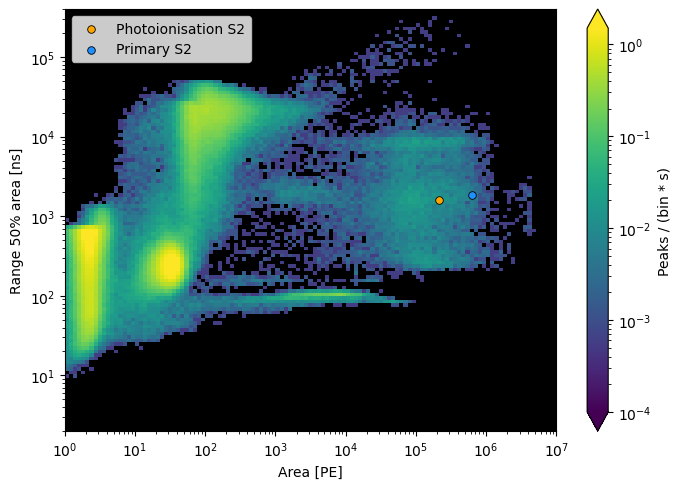

In [ ]:
# Ensure both are 1-element arrays before concatenation


# Then plot
fig2, ax2 = plot_area_width_histogram(peaks, run_duration)
ax2.scatter(
    two72['area'][4], two72['range_50p_area'][4],
    color='orange', edgecolors='black', linewidths=0.6,
    s=30, label='Photoionisation S2', zorder=3
)

ax2.scatter(
    pS2_prev['area'], pS2_prev['range_50p_area'],
    color='dodgerblue', edgecolors='black', linewidths=0.6,
    s=30, label='Primary S2', zorder=3
)

ax2.legend(loc='upper left')



37.50015
39.747772


2.4708105197792243

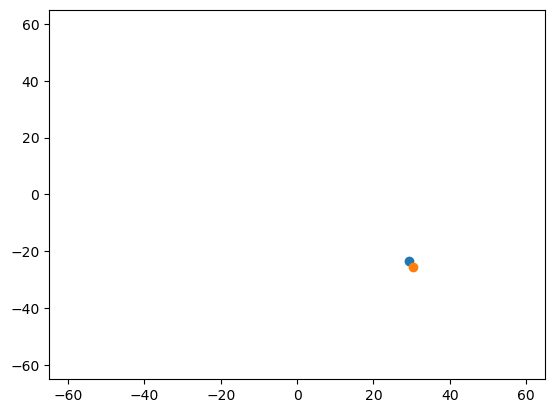

In [210]:
plt.scatter(two72['x'][4], two72['y'][4])
print(two72['r'][4])
plt.scatter(pS2_prev['x'], pS2_prev['y'])
print(pS2_prev['r'])
plt.xlim(-65, 65)
plt.ylim(-65, 65)

#calculate distance between two points:
import numpy as np
def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

distance(two72['x'][4], two72['y'][4], pS2_prev['x'], pS2_prev['y'])

In [ ]:
good = peaks[(peaks['subtype'] == 21) & (peaks['max_pmt'] < 253)]
dark = peaks[(peaks['subtype'] == 21) & (peaks['max_pmt'] >= 253)]
print(len(peaks[peaks['subtype'] == 21]), len(good), len(dark))

for i in range(5):
    fig, ax = plot_peaks_new(run_id, peaks, t_reference=dark['time'][i], reference_position='center', vetos=DAQ_vetos, window_ms=3, log=True)
for i in range(5):
    fig, ax = plot_peaks_new(run_id, peaks, t_reference=good['time'][i], reference_position='center', vetos=DAQ_vetos, window_ms=3, log=True)

463


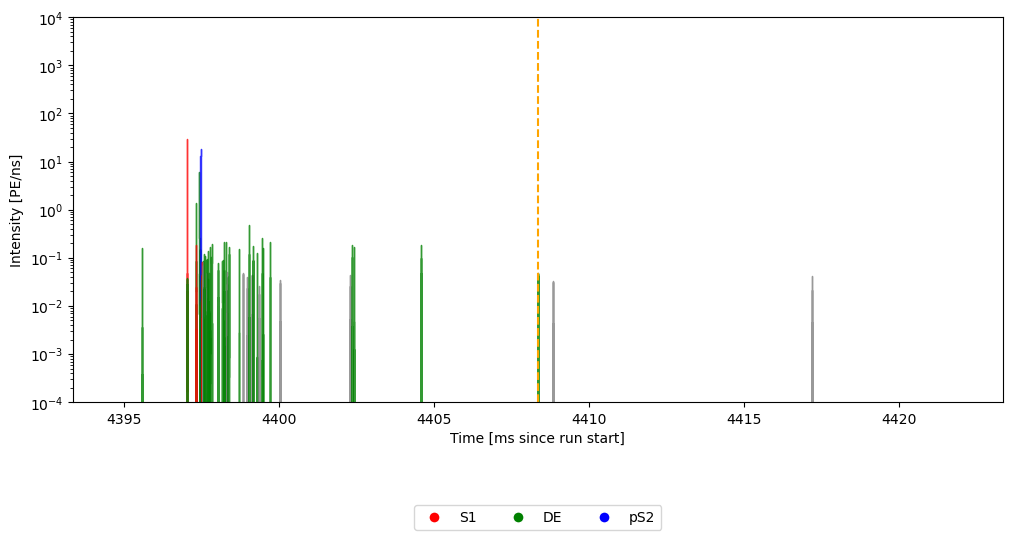

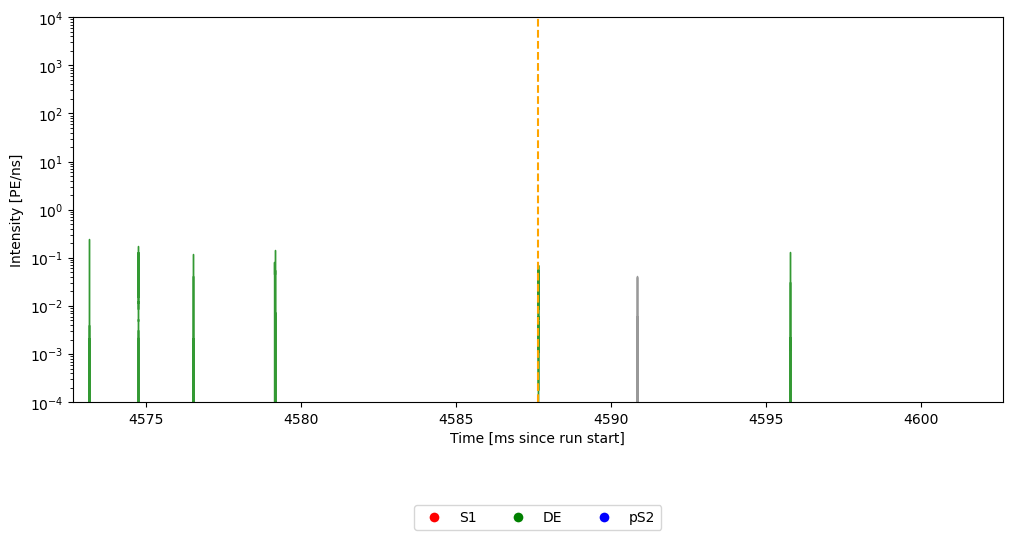

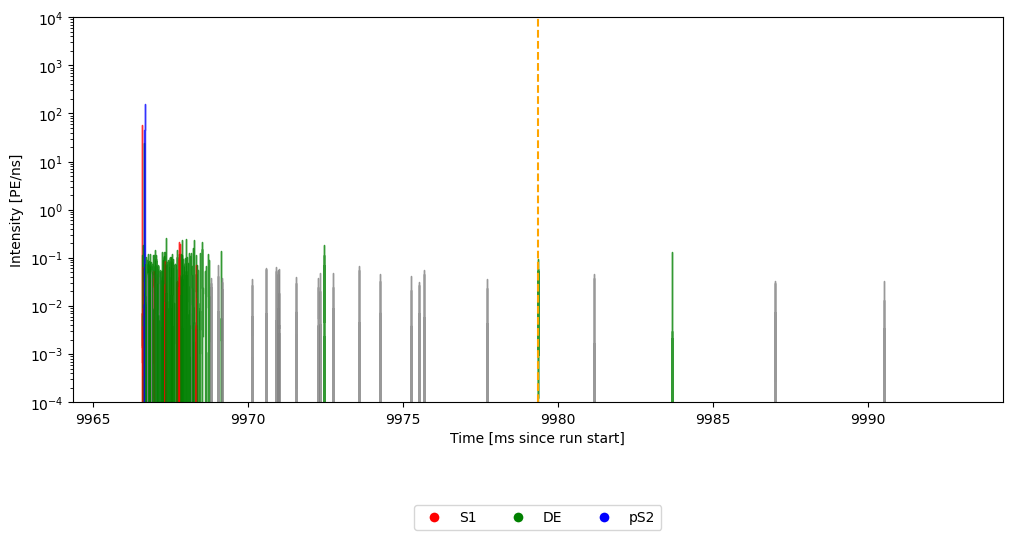

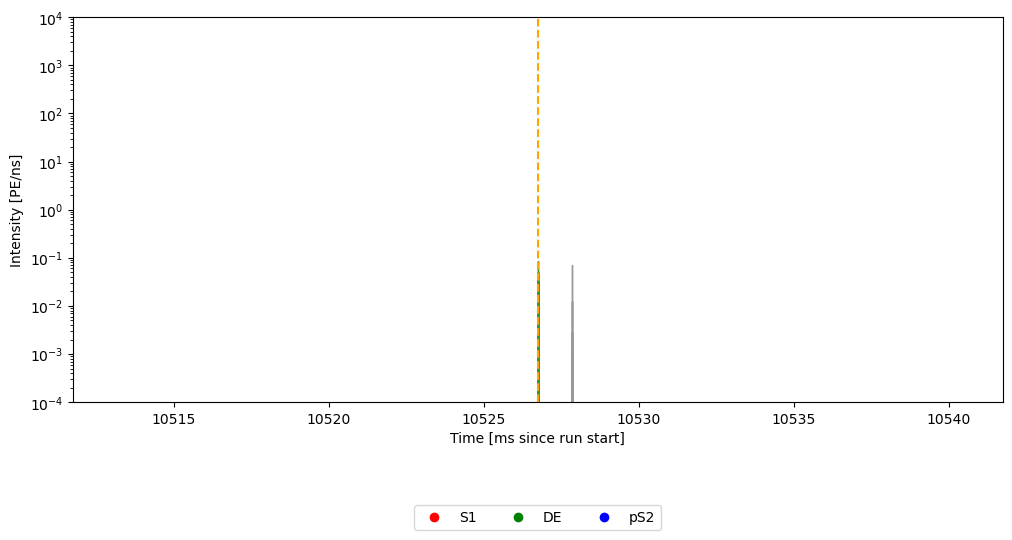

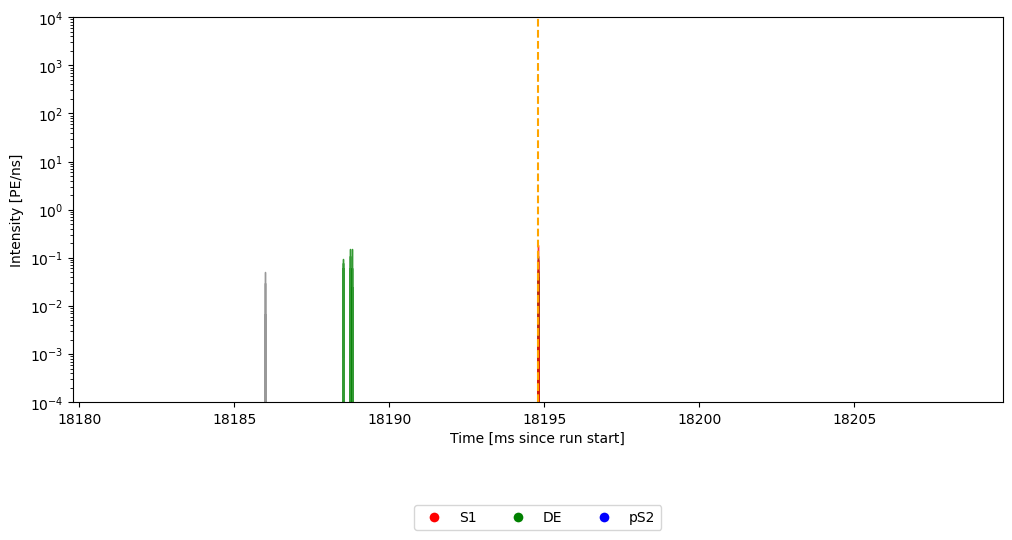

In [265]:
zeros = peaks[(peaks['subtype'] == 21) & (peaks['n_electron_rec'] == 0)]

print(len(zeros))

# for i in range(5):
#     fig, ax = hf.plot_peaks(run_id, peaks, t_reference=zeros['time'][i], vetos=DAQ_vetos, window_ms=30, log=True)

for i in range(5):
    fig, ax = plot_peaks_new(run_id, peaks, t_reference=zeros['time'][i], reference_position='center', vetos=DAQ_vetos, window_ms=30, log=True)

38322 265 38057


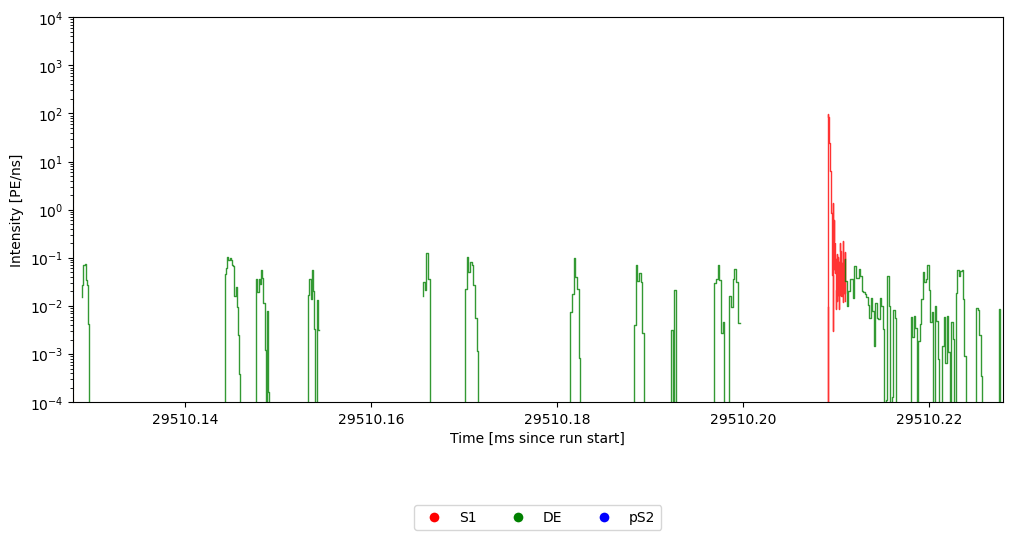

In [255]:
large_DEs = DEs_new[DEs_new['n_electron_rec'] > 5]
small_DEs = DEs_new[DEs_new['n_electron_rec'] <= 5]

print(len(DEs_new), len(large_DEs), len(small_DEs))

# for i in range(5):
fig, ax = plot_peaks_new(run_id, peaks, t_reference=large_DEs['time'][5]-1000, reference_position='left', vetos=DAQ_vetos, window_ms= 0.1, log=True)

In [ ]:
peaks_80 = np.load("C:/Users/Conor/Documents/Github/Project/processed_data/peaks_031680.npy", allow_pickle=True)
pS2s_80 = peaks_80[np.isin(peaks_80['subtype'], [22, 24, 25, 261, 262, 29])]
low = pS2s_80[pS2s_80['area_fraction_top'] < 0.5]
print(len(low))

for i in range(1):
    fig, ax = plot_peaks_new(run_id, peaks, t_reference = low['time'][i] - 900, reference_position='left', vetos=DAQ_vetos, window_ms = 0.01, log=True)

116


NameError: name 'plot_peaks' is not defined

In [508]:
len(pS2s_neww)
len(DEs_neww)

np.save("C:/Users/conor/Downloads/Project (offline)/downloaded_data/pS2s_new.npy", pS2s_neww)
np.save("C:/Users/conor/Downloads/Project (offline)/downloaded_data/DEs_new.npy", DEs_neww)

13


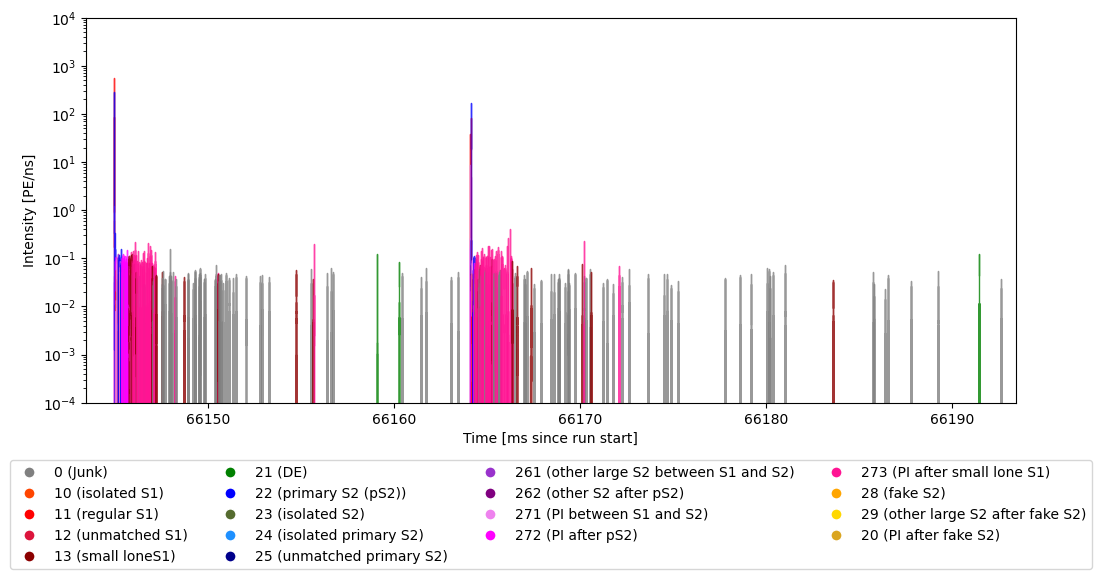

In [529]:
high_pS2s = pS2s_neww[pS2s_neww['area'] > 1e6]
high_S1s = S1s[S1s['area'] > 1e5]

print(len(high_S1s))

# fig, ax = plot_peaks(run_id, peaks, t_reference = high_pS2s['time'][0] - 2500000, reference_position='left', vetos=DAQ_vetos, window_ms = 500, log = True)

fig1, ax1 = plot_peaks(run_id, peaks, t_reference = high_S1s['time'][0] - 1500000, reference_position='left', vetos=DAQ_vetos, window_ms = 50, log = True)